# Preamble - run this

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install voxelmorph 
import numpy as np
from matplotlib import pyplot as plt
import neurite as ne
import nibabel as nb
import os, sys, glob
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import gc
import skimage.transform as skt
from random import randint, seed
seed(1)
import time

Mounted at /content/drive
     |████████████████████████████████| 75 kB 3.6 MB/s 
     |████████████████████████████████| 86 kB 6.1 MB/s 


In [ ]:
import os
import numpy as np 

import torch
import torch.nn as nn

import skimage.io
import matplotlib.pyplot as plt

from PIL import Image
from torchvision import transforms

from sklearn.metrics import normalized_mutual_info_score


In [ ]:
print(torch.__version__)

1.9.0+cu111


In [ ]:
import tensorflow as tf
import math


In [ ]:
!pip install voxelmorph 
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-cluster -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-geometric

     |████████████████████████████████| 8.0 MB 10.9 MB/s 
     |████████████████████████████████| 2.9 MB 6.8 MB/s 
     |████████████████████████████████| 1.4 MB 318 kB/s 
     |████████████████████████████████| 325 kB 12.2 MB/s 
     |████████████████████████████████| 407 kB 34.5 MB/s 
     |████████████████████████████████| 45 kB 4.0 MB/s 


In [ ]:
!pip install wandb --upgrade
import wandb
os.environ["WANDB_API_KEY"] = "4d55d2ea028525eadeb537494a02bf9ce8ead8f3"
wandb.login()

     |████████████████████████████████| 1.7 MB 13.8 MB/s 
     |████████████████████████████████| 180 kB 48.3 MB/s 
     |████████████████████████████████| 97 kB 6.8 MB/s 
     |████████████████████████████████| 139 kB 65.7 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=58c2d702b17c6593158f098280885f480e65805fe4d49ab18502fc2a62987368
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=7f4dad672d69e87c1a336e62f1965ca4a935b39833188a809e607680aa8032c0
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


wandb: Currently logged in as: suraj110693 (use `wandb login --relogin` to force relogin)


True

In [ ]:
from torch_geometric.nn import global_max_pool
from torch_geometric.nn import GCNConv
from mpl_toolkits.mplot3d import Axes3D
from torch_geometric.transforms import SamplePoints
from torch_cluster import knn_graph
import voxelmorph as vxm
from torch_geometric.data import DataLoader
from torch_geometric.transforms import Compose, RandomRotate
from torch_geometric import utils
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree


OSError: ignored

In [ ]:
import neurite as ne

In [ ]:
# test set pairwise reg
#data_path_t1 = "/content/drive/MyDrive/Idl/DATASET_FINAL/Test/intramodal/T1/pairwise_registered/Batch_1/"
#data_path_t2 = "/content/drive/MyDrive/Idl/DATASET_FINAL/Test/intramodal/T1/pairwise_registered/Batch_1_F_Batch_2_M/"
# test set template reg
#data_path_t1 = "/content/drive/MyDrive/Idl/DATASET_FINAL/Train/intramodal/template_registered/T1/"
#data_path_t2 = "/content/drive/MyDrive/Idl/DATASET_FINAL/Train/intramodal/template_registered/T1/"


# data_path_t1 = "/content/drive/MyDrive/DATASET_FINAL/eval/Batch_1_bet_subset/"
# data_path_t2 = "/content/drive/MyDrive/DATASET_FINAL/eval/Batch_2_bet_subset_affine/"

data_path_t1 = "/content/drive/MyDrive/DATASET_FINAL/Test/intermodal/Batch_2/T1_F_T2_M/T1/"
data_path_t2 = "/content/drive/MyDrive/DATASET_FINAL/Test/intermodal/Batch_2/T1_F_T2_M/T2_affine/"
file_names_t1 = sorted(glob.glob(os.path.join(data_path_t1, "*.nii.gz")))
file_names_t2 = sorted(glob.glob(os.path.join(data_path_t2, "*.nii.gz")))

In [ ]:
print(len(file_names_t1))

63


In [ ]:
!ls -ltr data_path_t1

ls: cannot access 'data_path_t1': No such file or directory


In [ ]:
def load_4D(name):
    # (256, 256, 256)
    model_np = np.zeros(shape=(128, 128, 128))
    X_nb = nb.load(name)
    
    X_np = X_nb.dataobj
    #print("Oreintation: {}".format(nb.aff2axcodes(X_nb.affine)))
    #model_np[:, :, 0:X_np.shape[2]] = X_np[0:128, 0:128, :]
    #model_np = np.reshape(model_np, (1,)+ model_np.shape)
    model_np = np.reshape(X_np, (1,)+ X_np.shape)
    return model_np

def load_4D_200(name):
        resamplng_shape = (128, 128, 128)
        X_nb = nb.load(name)
        X_np = X_nb.dataobj
       
        min_pixel_value = np.min(X_np)   # getting minimum pixel value which is -1 in my case.
        model_np = np.full(shape=(128, 128, 128),fill_value=min_pixel_value)
        x_dim, y_dim, z_dim = X_np.shape
        x_ltail = (resamplng_shape[0] - x_dim)//2 
        y_ltail = (resamplng_shape[1] - y_dim)//2
        z_ltail = (resamplng_shape[2] - z_dim)//2

        x_rtail = resamplng_shape[0] - x_ltail 
        y_rtail = resamplng_shape[1] - y_ltail 
        z_rtail = resamplng_shape[2] - z_ltail 
        model_np[x_ltail:x_rtail, y_ltail:y_rtail, z_ltail:z_rtail] = X_np[:, :, :]
        model_np = np.reshape(model_np, (1,)+ model_np.shape)
        return model_np

def load_5D_200(name):
        resamplng_shape = (128, 128, 128)
        X_nb = nb.load(name)
        X_np = X_nb.dataobj
       
        min_pixel_value = np.min(X_np)   # getting minimum pixel value which is -1 in my case.
        model_np = np.full(shape=(128, 128, 128),fill_value=min_pixel_value)
        model_np_5d = np.full(shape=(1,1,128, 128, 128),fill_value=min_pixel_value)
        x_dim, y_dim, z_dim = X_np.shape
        x_ltail = (resamplng_shape[0] - x_dim)//2 
        y_ltail = (resamplng_shape[1] - y_dim)//2
        z_ltail = (resamplng_shape[2] - z_dim)//2

        x_rtail = resamplng_shape[0] - x_ltail 
        y_rtail = resamplng_shape[1] - y_ltail 
        z_rtail = resamplng_shape[2] - z_ltail 
        model_np[x_ltail:x_rtail, y_ltail:y_rtail, z_ltail:z_rtail] = X_np[:, :, :]
        model_np = np.reshape(model_np, (1,)+ model_np.shape)
        model_np_5d[0,:,:,:,:] = model_np
        return model_np_5d

def imgnorm(N_I,index1=0.0001,index2=0.0001):
    I_sort = np.sort(N_I.flatten())
    I_min = I_sort[int(index1*len(I_sort))]
    I_max = I_sort[-int(index2*len(I_sort))]
    N_I =1.0*(N_I-I_min)/(I_max-I_min)
    N_I[N_I>1.0]=1.0
    N_I[N_I<0.0]=0.0
    N_I2 = N_I.astype(np.float32)
    return N_I2

def Norm_Zscore(img):
    img= (img-np.mean(img))/np.std(img) 
    return img

def downsample(img):
    #dimg = skt.resize(img, (1, 64, 64, 64), 3)
    dimg = skt.resize(img, (128, 128, 128))
    return dimg

In [ ]:
class Dataset(Data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, t1_filenames, t2_filenames, iterations=1,norm=True):
        'Initialization'
        self.t1_filenames = t1_filenames
        self.t2_filenames = t2_filenames
        self.norm = norm
        self.iterations = iterations
  def __len__(self):
        'Denotes the total number of samples'
        return len(self.t1_filenames) * self.iterations

  def __getitem__(self, idx):
        'Generates one sample of data'
        # A_idx = randint(0, len(self.t1_filenames)-1)
        # B_idx = randint(0, len(self.t2_filenames)-1)
        # if (A_idx == B_idx):
        #   B_idx = (B_idx + 1) % (len(self.t1_filenames)-1)

        img_A = load_4D(self.t1_filenames[idx])
        img_B = load_4D(self.t2_filenames[idx])
        #img_B = load_4D(self.t2_filenames[(idx + 1) % len(self.t2_filenames)])

        # img_A = load_4D_200(self.t1_filenames[A_idx])
        # img_B = load_4D_200(self.t2_filenames[B_idx])

        # print(A_idx, B_idx)
                       
        if self.norm:
            #return  Norm_Zscore(imgnorm(img_A)) , Norm_Zscore(imgnorm(img_B))
            full_img_A = imgnorm(img_A) 
            full_img_B = imgnorm(img_B)
            return  full_img_A , full_img_B
        else:
            return img_A, img_B

In [ ]:
class ValidationDataset(Data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, t1_filenames, t2_filenames, iterations=1,norm=True):
        'Initialization'
        self.t1_filenames = t1_filenames
        self.t2_filenames = t2_filenames
        self.norm = norm
        self.iterations = iterations
  def __len__(self):
        'Denotes the total number of samples'
        return len(self.t1_filenames) * self.iterations

  def __getitem__(self, idx):
        """
        A_idx = randint(0, len(self.t1_filenames)-1)
        B_idx = randint(0, len(self.t1_filenames)-1)
        if (A_idx == B_idx):
          B_idx = (B_idx + 1) % (len(self.t1_filenames)-1)
        
        """

        img_A = load_4D_200(self.t1_filenames[idx])
        img_B = load_4D_200(self.t2_filenames[idx])
        #img_B = load_4D_200(self.t2_filenames[(idx + 1) % len(self.t2_filenames)])
        print(self.t1_filenames[idx])
        print(self.t2_filenames[idx])
        # print(self.t2_filenames[(idx + 1) % len(self.t2_filenames)])
                       
        if self.norm:
            #return  Norm_Zscore(imgnorm(img_A)) , Norm_Zscore(imgnorm(img_B))
            full_img_A = imgnorm(img_A) 
            full_img_B = imgnorm(img_B)
            return  full_img_A , full_img_B
        else:
            return img_A, img_B

In [ ]:
training_generator = Data.DataLoader(Dataset(file_names_t1, file_names_t2, norm=True), batch_size=2, shuffle=False)
validation_generator = Data.DataLoader(ValidationDataset(file_names_t1, file_names_t2, norm=True), batch_size=1, shuffle=False)

In [ ]:
counter = 0
for X, Y in training_generator:
 print(X.shape, Y.shape)
 print(torch.max(X), torch.min(X), torch.mean(X))
 print(torch.max(Y), torch.min(Y), torch.mean(Y))

 counter = counter + 1
 if(counter > 4):
   break;

torch.Size([2, 1, 128, 128, 128]) torch.Size([2, 1, 128, 128, 128])
tensor(1.) tensor(0.) tensor(0.0592)
tensor(1.) tensor(0.) tensor(0.0443)
torch.Size([2, 1, 128, 128, 128]) torch.Size([2, 1, 128, 128, 128])
tensor(1.) tensor(0.) tensor(0.0619)
tensor(1.) tensor(0.) tensor(0.0516)
torch.Size([2, 1, 128, 128, 128]) torch.Size([2, 1, 128, 128, 128])
tensor(1.) tensor(0.) tensor(0.0668)
tensor(1.) tensor(0.) tensor(0.0408)
torch.Size([2, 1, 128, 128, 128]) torch.Size([2, 1, 128, 128, 128])
tensor(1.) tensor(0.) tensor(0.0708)
tensor(1.) tensor(0.) tensor(0.0506)
torch.Size([2, 1, 128, 128, 128]) torch.Size([2, 1, 128, 128, 128])
tensor(1.) tensor(0.) tensor(0.0684)
tensor(1.) tensor(0.) tensor(0.0577)


In [ ]:
counter = 0
for X, Y in validation_generator:
 print(X.shape, Y.shape)
 print(torch.max(X), torch.min(X), torch.mean(X))
 print(torch.max(Y), torch.min(Y), torch.mean(Y))

 counter = counter + 1
 if(counter > 4):
   break;

/content/drive/MyDrive/DATASET_FINAL/Test/intermodal/Batch_2/T1_F_T2_M/T1/IXI042-Guys-0725-T1.nii.gz
/content/drive/MyDrive/DATASET_FINAL/Test/intermodal/Batch_2/T1_F_T2_M/T2_affine/IXI042-Guys-0725-T2.nii.gz
torch.Size([1, 1, 128, 128, 128]) torch.Size([1, 1, 128, 128, 128])
tensor(1.) tensor(0.) tensor(0.0594)
tensor(1.) tensor(0.) tensor(0.0406)
/content/drive/MyDrive/DATASET_FINAL/Test/intermodal/Batch_2/T1_F_T2_M/T1/IXI046-Guys-0824-T1.nii.gz
/content/drive/MyDrive/DATASET_FINAL/Test/intermodal/Batch_2/T1_F_T2_M/T2_affine/IXI046-Guys-0824-T2.nii.gz
torch.Size([1, 1, 128, 128, 128]) torch.Size([1, 1, 128, 128, 128])
tensor(1.) tensor(0.) tensor(0.0590)
tensor(1.) tensor(0.) tensor(0.0480)
/content/drive/MyDrive/DATASET_FINAL/Test/intermodal/Batch_2/T1_F_T2_M/T1/IXI071-Guys-0770-T1.nii.gz
/content/drive/MyDrive/DATASET_FINAL/Test/intermodal/Batch_2/T1_F_T2_M/T2_affine/IXI071-Guys-0770-T2.nii.gz
torch.Size([1, 1, 128, 128, 128]) torch.Size([1, 1, 128, 128, 128])
tensor(1.) tensor(0.)

In [ ]:
Adj_matrix = torch.randn(size=(5, 4096, 4096))
print(Adj_matrix.min(), Adj_matrix.mean(), Adj_matrix.max())

In [ ]:
topk_mat, topk_ind = torch.topk(Adj_matrix, k = 10, dim = -1)

In [ ]:
topk_ind[0, 1, :]

In [ ]:
topk_ind[0, 3871, :]

In [ ]:
edge_index = torch.repeat_interleave(topk_ind[0, :, :], 2, dim=1)

In [ ]:
mytnsr = torch.unsqueeze(torch.from_numpy(np.arange(start=0, stop=4096)), 1)

In [ ]:
mytnsr = torch.repeat_interleave(mytnsr[0:4], 10, dim=1)

In [ ]:
edge_index[0:4, [1, 3, 5, 7, 9, 11, 13, 15, 17, 19] ].shape

In [ ]:
edge_index[0:4, [1, 3, 5, 7, 9, 11, 13, 15, 17, 19] ] = mytnsr

In [ ]:
edge_index[0:7, ]

In [ ]:
edge_index[0:2, 0:20]

In [ ]:
torch.from_numpy(np.arange(start=0, stop=4096))

In [ ]:
edge_index = torch.repeat_interleave(topk_ind[0, :, :], torch.from_numpy(np.arange(start=0, stop=4096)), dim=0)

In [ ]:
edge_index[0:5, :]

In [ ]:
Adj_matrix = torch.randn(size=(5, 4096, 4096))
print(Adj_matrix.min(), Adj_matrix.mean(), Adj_matrix.max())

In [ ]:
topk_mat, topk_ind = torch.topk(Adj_matrix, k = 10, dim = -1)

In [ ]:
interim1 = torch.repeat_interleave(topk_ind, 2, dim=2)
interim2 = torch.repeat_interleave(topk_ind, 2, dim=2)
nodetnsr = torch.unsqueeze(torch.from_numpy(np.arange(start=0, stop=4096)), 1)
nodetnsr_interim = torch.repeat_interleave(nodetnsr, 10, dim=1)

In [ ]:
interim1[:, :, [1, 3, 5, 7, 9, 11, 13, 15, 17, 19] ] = nodetnsr_interim
interim2[:, :, [0, 2, 4, 6, 8, 10, 12, 14, 16, 18] ] = nodetnsr_interim

In [ ]:
interim1[0:2, 0:4, :]

In [ ]:
interim2[0:2, 0:4, :]

In [ ]:
interim3 = torch.unsqueeze( torch.flatten(interim1, start_dim=1, end_dim=-1), 1)
interim4 = torch.unsqueeze( torch.flatten(interim2, start_dim=1, end_dim=-1), 1)

edge_index = torch.cat([interim3, interim4], dim=1)

In [ ]:
edge_index[0:2, :, 0:10]

# Pearson Correlation

In [ ]:
t1_img = imgnorm(load_4D(file_names_t1[0]))
t2_img = imgnorm(load_4D(file_names_t2[0]))
t1_2d_img = t1_img[0,:,50,:]
t2_2d_img = t2_img[0,:,50,:]

In [ ]:
np.corrcoef(t1_img[0,:,:,:].flat, t2_img[0,:,:,:].flat)

array([[1.       , 0.7938033],
       [0.7938033, 1.       ]])

In [ ]:
np.corrcoef(t1_2d_img.flat, t2_2d_img.flat)

In [ ]:
def evaluate_pearson_correlation(img_1, img_2, img_1_name='x', img_2_name='y'):
  pearson_correlation = 0.0
  pearson_correlation_matrix = np.corrcoef(img_1.flat, img_2.flat)
  r = pearson_correlation_matrix[0, 1]

  if not math.isnan(r):
    pearson_correlation = r
  else:
    print(' Unable to calculate pearson correlation for images {}, {}'.format(img_1_name, img_2_name))
    pass

  return pearson_correlation




In [ ]:
start_time = time.time()
print(" ============ =============== ============== ")
print()
counter = 0
for t1_x, t1_y in zip(file_names_t1, file_names_t2):
  img_1 = load_4D(t1_x)[0,:,:,:]
  img_2 = load_4D(t1_y)[0,:,:,:]
  print("Pearson corelation for image pair {} is {}".format(counter, evaluate_pearson_correlation(img_1, img_2)))
  counter = counter + 1

print()
print(" ============ =============== ============== ")
end_time = time.time()

total_time_taken = (end_time - start_time)/60.0
print(" Total Time Taken : {}".format(total_time_taken))

 ============ =============== ============== 

Pearson corelation for image pair 0 is 0.7937229349722404
Pearson corelation for image pair 1 is 0.8619956399234754
Pearson corelation for image pair 2 is 0.8692262743745488
Pearson corelation for image pair 3 is 0.8316912983625473
Pearson corelation for image pair 4 is 0.7036941584063464
Pearson corelation for image pair 5 is 0.8333171053864319
Pearson corelation for image pair 6 is 0.8304677690408218
Pearson corelation for image pair 7 is 0.8615426433857661
Pearson corelation for image pair 8 is 0.8670707065556981
Pearson corelation for image pair 9 is 0.832780070163898
Pearson corelation for image pair 10 is 0.7764486961785162
Pearson corelation for image pair 11 is 0.7865556307378047
Pearson corelation for image pair 12 is 0.8434698092763355
Pearson corelation for image pair 13 is 0.8354877835225963
Pearson corelation for image pair 14 is 0.8474903161220263
Pearson corelation for image pair 15 is 0.8022168617687073
Pearson corelation f

# Histogram Matching

In [ ]:

def print_img(img, histo_new, histo_old, index=0, L=50):
    dpi = 80
    width = img.shape[0]
    height = img.shape[1]
    if height > width:
        figsize = (img.shape[0]*4) / float(dpi), (height)/ float(dpi)
        fig, axs = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3, 1,1]}, figsize=figsize)
    else:
        figsize = (width) / float(dpi), (height*4) / float(dpi)
        fig, axs = plt.subplots(3, 1, gridspec_kw={'height_ratios': [3, 1,1]}, figsize=figsize)

    fig.suptitle("Enhanced Image with L:" + str(L))
    axs[0].title.set_text("Enhanced Image")
    axs[0].imshow(img, vmin=np.amin(img), vmax=np.amax(img), cmap='gray')

    axs[1].title.set_text("Equalized histogram")
    axs[1].plot(histo_new, color='#f77f00')
    axs[1].bar(np.arange(len(histo_new)), histo_new, color='#003049')

    axs[2].title.set_text("Main histogram")
    axs[2].plot(histo_old, color='#ef476f')
    axs[2].bar(np.arange(len(histo_old)), histo_old, color='#b7b7a4')
    plt.tight_layout()
    plt.savefig("e" + index + str(L)+".pdf")
    plt.savefig("e" + index + str(L)+".png")


def print_histogram(_histrogram, name, title):
    plt.figure()
    plt.title(title)
    plt.plot(_histrogram, color='#ef476f')
    plt.bar(np.arange(len(_histrogram)), _histrogram, color='#b7b7a4')
    plt.ylabel('Number of Pixels')
    plt.xlabel('Pixel Value')
    plt.savefig("hist_" + name)


def generate_histogram(img, print, index):
    if len(img.shape) == 3: # img is colorful
        gr_img = np.mean(img, axis=-1)
    else:
        gr_img = img
    '''now we calc grayscale histogram'''
    gr_hist = np.zeros([256])

    for x_pixel in range(gr_img.shape[0]):
        for y_pixel in range(gr_img.shape[1]):
            pixel_value = int(gr_img[x_pixel, y_pixel])
            gr_hist[pixel_value] += 1
    '''normalize Histogram'''
    gr_hist /= (gr_img.shape[0] * gr_img.shape[1])
    if print:
        print_histogram(gr_hist, name="neq_"+str(index), title="Normalized Histogram")
    return gr_hist, gr_img


def equalize_histogram(img, histo, index=0,L=50):
    eq_histo = np.zeros_like(histo)
    en_img = np.zeros_like(img)
    for i in range(len(histo)):
        eq_histo[i] = int((L - 1) * np.sum(histo[0:i]))
    print_histogram(eq_histo, name="eq_"+str(index), title="Equalized Histogram")
    '''enhance image as well:'''
    for x_pixel in range(img.shape[0]):
        for y_pixel in range(img.shape[1]):
            pixel_val = int(img[x_pixel, y_pixel])
            en_img[x_pixel, y_pixel] = eq_histo[pixel_val]
    '''creating new histogram'''
    hist_img, _ = generate_histogram(en_img, print=False, index=1)
    print_img(img=en_img, histo_new=hist_img, histo_old=histo, index='1', L=L)
    return eq_histo


def find_value_target(val, target_arr):
    key = np.where(target_arr == val)[0]

    if len(key) == 0:
        key = find_value_target(val+1, target_arr)
        if len(key) == 0:
            key = find_value_target(val-1, target_arr)
    vvv = key[0]
    return vvv


def match_histogram(inp_img, hist_input, e_hist_input, e_hist_target, _print=True):
    '''map from e_inp_hist to 'target_hist '''
    L=50
    en_img = np.zeros_like(inp_img)
    tran_hist = np.zeros_like(e_hist_input)
    for i in range(len(e_hist_input)):
        tran_hist[i] = find_value_target(val=e_hist_input[i], target_arr=e_hist_target)
    print_histogram(tran_hist, name="trans_hist_", title="Transferred Histogram")
    '''enhance image as well:'''
    for x_pixel in range(inp_img.shape[0]):
        for y_pixel in range(inp_img.shape[1]):
            pixel_val = int(inp_img[x_pixel, y_pixel])
            en_img[x_pixel, y_pixel] = tran_hist[pixel_val]
    '''creating new histogram'''
    hist_img, _ = generate_histogram(en_img, print=False, index=3)
    print_img(img=en_img, histo_new=hist_img, histo_old=hist_input, index=str(3), L=L)


In [ ]:
t1_img = imgnorm(load_4D(file_names_t1[0]))
t2_img = imgnorm(load_4D(file_names_t2[0]))
t1_2d_img = t1_img[0,:,50,:]
t2_2d_img = t2_img[0,:,50,:]

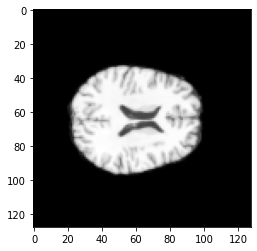

In [ ]:
plt.imshow(t1_img[0,:,50,:], cmap='Greys_r')

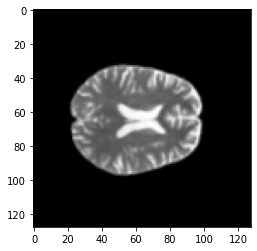

In [ ]:
plt.imshow(t2_img[0,:,50,:], cmap='Greys_r')

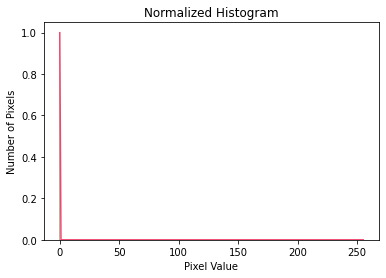

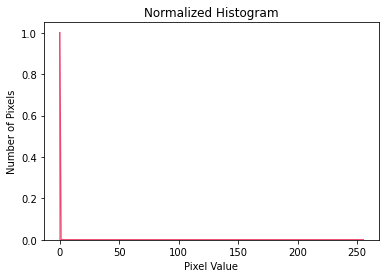

In [ ]:
t1_hist_img, t1_gr_img = generate_histogram(t1_2d_img, print=True, index=0)
t2_hist_img, t2_gr_img = generate_histogram(t2_2d_img, print=True, index=1)

In [ ]:
t1_gr_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

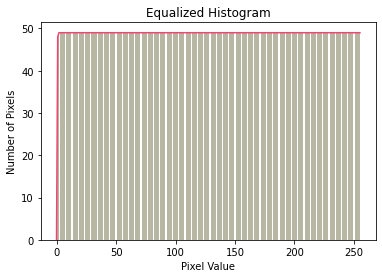

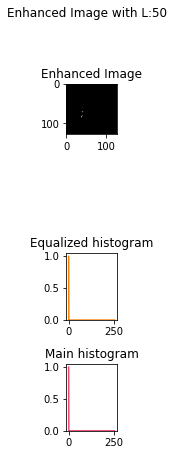

In [ ]:
t1_eq_hist_img = equalize_histogram(t1_gr_img, t1_hist_img, L=50)

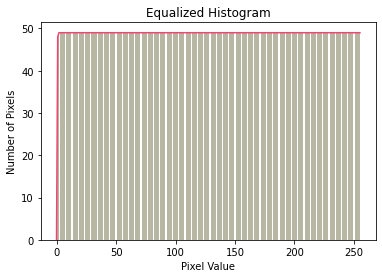

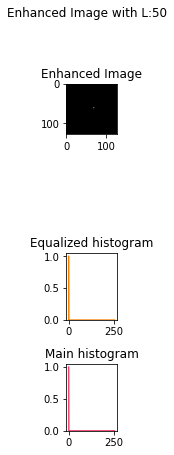

In [ ]:
t2_eq_hist_img = equalize_histogram(t2_gr_img, t2_hist_img, L=50)

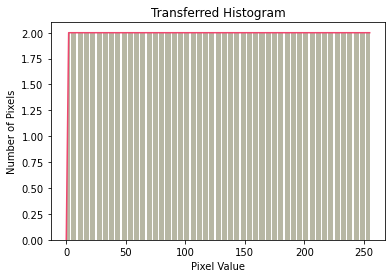

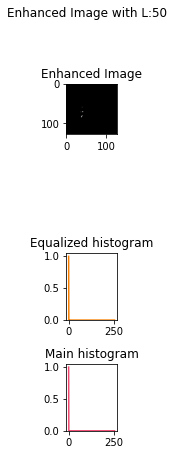

In [ ]:
match_histogram(inp_img=t1_gr_img, hist_input=t1_hist_img, e_hist_input=t1_eq_hist_img, e_hist_target=t2_eq_hist_img)

# SK IMAGE Histogram matching

In [ ]:
from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

In [ ]:
matched = match_histograms(t1_2d_img, t2_2d_img)

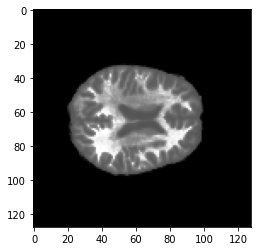

In [ ]:
plt.imshow(matched, cmap='Greys_r')

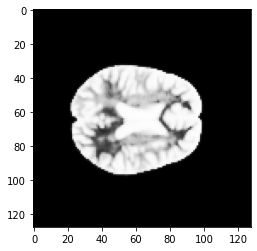

In [ ]:
matched = match_histograms(t2_2d_img, t1_2d_img)
plt.imshow(matched, cmap='Greys_r')

# Feature Extractor - run this

In [ ]:
class Feature_Extractor(nn.Module):
  def __init__(self,in_channel, n_classes, start_channel):
        self.in_channel = in_channel
        self.n_classes = n_classes
        self.start_channel = start_channel
        super(Feature_Extractor, self).__init__()
        self.en0 = self.encoder(self.in_channel, self.start_channel, bias=False)

        self.en1 = self.encoder(self.start_channel * 1, self.start_channel * 2, stride=2, bias=True)
        self.en2 = self.encoder(self.start_channel * 2, self.start_channel * 3, stride=2, bias=True)
        self.en3 = self.encoder(self.start_channel * 3, self.start_channel * 4, stride=2, bias=True)
        self.en4 = self.encoder(self.start_channel * 4, self.start_channel * 5, stride=2, bias=True)
        self.en5 = self.encoder(self.start_channel * 5, self.start_channel * 6, stride=2, bias=True)

  def encoder(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=True):
    layer = nn.Sequential(
                nn.Conv3d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, bias=bias),
                
                nn.LeakyReLU(0.2), nn.BatchNorm3d(out_channels))
    return layer

  def forward(self, x,y):
        # print("x,y", x.shape, "  ", y.shape)
        # 5, 2, 128, 128, 128 <--- 5,1,128,128,128 + 5,1,128,128,128 --> 10,1, 128,128,128
        x_in=torch.cat((x, y), 1)  
        enc_op_1 = self.en0(x_in)
        enc_op = self.en1(enc_op_1)
        enc_op_p = self.en2(enc_op)
        enc_op = self.en3(enc_op_p) # 16
        #enc_op = self.en4(enc_op) # 8

        # Last encoders latent space 1/32 times original dim , 4
        #enc_op = self.en5(enc_op)

        return enc_op, enc_op_p, enc_op_1

In [ ]:
class Feature_Extractor2(nn.Module):
  def __init__(self,in_channel, start_channel):
        self.in_channel = in_channel
        self.start_channel = start_channel
        super(Feature_Extractor2, self).__init__()
        self.en0 = self.encoder(self.in_channel, self.start_channel, bias=False)

        self.en1 = self.encoder(self.start_channel * 1, self.start_channel * 2, stride=2, bias=True)
        self.en2 = self.encoder(self.start_channel * 2, self.start_channel * 3, stride=2, bias=True)
        self.en3 = self.encoder(self.start_channel * 3, self.start_channel * 4, stride=2, bias=True)
        self.en4 = self.encoder(self.start_channel * 4, self.start_channel * 5, stride=2, bias=True)
        self.en5 = self.encoder(self.start_channel * 5, self.start_channel * 6, stride=2, bias=True)

  def encoder(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=True):
    layer = nn.Sequential(
                nn.Conv3d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, bias=bias),
                
                nn.LeakyReLU(0.2))
    return layer

  def forward(self, x):
        # print("x,y", x.shape, "  ", y.shape)
        x_in=x 
        enc_op = self.en0(x_in)
        enc_op = self.en1(enc_op)
        enc_op = self.en2(enc_op)
        enc_op = self.en3(enc_op) # 16
        #enc_op = self.en4(enc_op) # 8

        # Last encoders latent space 1/32 times original dim , 4
        #enc_op = self.en5(enc_op)

        return enc_op

In [ ]:
class Feature_Extractor3(nn.Module):
  def __init__(self,in_channel, n_classes, start_channel):
        self.in_channel = in_channel
        self.n_classes = n_classes
        self.start_channel = start_channel
        super(Feature_Extractor3, self).__init__()
        self.en1 = self.encoder(self.in_channel, self.start_channel, bias=False) #128, 16

        self.en2 = self.encoder(self.start_channel * 1, self.start_channel * 2, stride=2, bias=False) #64, 32
        self.en3 = self.encoder(self.start_channel * 2, self.start_channel * 2, stride=2, bias=False) #32, 32
        self.en4 = self.encoder(self.start_channel * 2, self.start_channel * 2, stride=2, bias=False) #16, 32
        self.en5 = self.encoder(self.start_channel * 2, self.start_channel * 2, stride=2, bias=False) #8, 32
        self.en6 = self.encoder(self.start_channel * 2, self.start_channel * 2, stride=2, bias=False) #4, 32

  def encoder(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False):
    layer = nn.Sequential(
                nn.Conv3d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding, bias=bias),
                nn.LeakyReLU(0.2)
                )
    return layer

  def forward(self, x,y):
        # print("x,y", x.shape, "  ", y.shape)
        x_in=torch.cat((x, y), 1)  
        enc_1 = self.en1(x_in)
        enc_2 = self.en2(enc_1)
        enc_3 = self.en3(enc_2)
        enc_4 = self.en4(enc_3) # 16
        enc_5 = self.en5(enc_4) # 8
        enc_6 = self.en6(enc_5) # 4

        # Last encoders latent space 1/32 times original dim , 4
        #enc_op = self.en5(enc_op)

        return enc_1, enc_2, enc_3, enc_4, enc_5, enc_6

In [ ]:
x1 = torch.randn(2,1,128,128,128)
x2 = torch.randn(2,1,128,128,128)

fem = Feature_Extractor3(2, 3, 16)

x31, x32, x33, x34, x35, x36 = fem(x1, x2)

# Upsampler Model creation - run this

In [ ]:
class Upsampler_net4(nn.Module):
  def __init__(self, in_channel, out_channel=3 ):
        
        self.in_channel = in_channel
        self.out_channel = out_channel
        super(Upsampler_net4, self).__init__()
        self.op = self.output(self.in_channel, self.out_channel)
       
  def output(self, in_channels, out_channels, kernel_size=3, padding=1, bias=False, batchnorm=True):
    layer = nn.Sequential(nn.Conv3d(in_channels, out_channels, kernel_size, bias=bias, padding=padding),
                          nn.LeakyReLU(0.2))
    return layer

  def conv1X1(self, in_channels, out_channels, kernel_size=1, padding=0, bias=False, batchnorm=False):
    layer = nn.Sequential(nn.Conv3d(in_channels, out_channels, kernel_size, bias=bias, padding=padding), nn.InstanceNorm3d(out_channels,affine=True), nn.LeakyReLU(0.2))
    return layer

  def forward(self, latent_feats):
        return self.op(latent_feats)

In [ ]:
class Upsampler_net5(nn.Module):
  def __init__(self, encoder_in_channel, factor, decoder_in_channel, out_channel=3 ):
         
        self.encoder_in_channel = encoder_in_channel
        self.decoder_in_channel = decoder_in_channel
        self.out_channel = out_channel
        self.factor = factor
        super(Upsampler_net5, self).__init__()
        # self.op = self.output(self.encoder_in_channel * self.factor + self.decoder_in_channel, self.out_channel)
        self.op = self.decoder(self.encoder_in_channel * self.factor + self.decoder_in_channel, self.out_channel)
        # self.conv = self.output(self.out_channel, self.out_channel)
        # self.deform_output = self.deformation_field_output(self.out_channel, self.out_channel)

  def decoder(self, in_channels, out_channels, kernel_size=2, stride=2, padding=0,
                output_padding=0, bias=True):
    layer = nn.Sequential(nn.Upsample(scale_factor=2, mode='nearest'))
    # layer = nn.Sequential(nn.ConvTranspose3d(in_channels, out_channels, kernel_size, stride=stride,
    #                       padding=padding, output_padding=output_padding, bias=bias),
    #                        nn.LeakyReLU(0.2),
    #                        nn.BatchNorm3d(out_channels))
    return layer
       
  def output(self, in_channels, out_channels, kernel_size=3, padding=1, bias=True, batchnorm=True):
    layer = nn.Sequential(nn.Conv3d(in_channels, out_channels, kernel_size, bias=bias, padding=padding),
                          nn.LeakyReLU(0.2))
    return layer

  def conv1X1(self, in_channels, out_channels, kernel_size=1, padding=0, bias=False, batchnorm=False):
    layer = nn.Sequential(nn.Conv3d(in_channels, out_channels, kernel_size, bias=bias, padding=padding),)
    return layer

  

  def forward(self, interpolation_feats, encoder_feats ):
        c11 = torch.cat((interpolation_feats, encoder_feats), 1)
        d0 = self.op(c11)
        return d0

In [ ]:
class Upsampler_net6(nn.Module):
  def __init__(self, encoder_in_channel, decoder_in_channel, out_channel=3 ):
         
        self.encoder_in_channel = encoder_in_channel
        self.decoder_in_channel = decoder_in_channel
        self.out_channel = out_channel
        super(Upsampler_net6, self).__init__()
        self.op = self.decoder(self.encoder_in_channel + self.decoder_in_channel, self.out_channel)

  def decoder(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False):
    layer = nn.Sequential(nn.Conv3d(in_channels, out_channels, kernel_size, bias=bias, padding=padding),
                          nn.LeakyReLU(0.2))
    return layer

  def forward(self, decoder_feats, encoder_feats ):

        B, C, H, W, D = encoder_feats.size()

        interpolation_feats = F.interpolate(decoder_feats, (H, W, D), mode='trilinear', align_corners=False)

        concatenated_feats = torch.cat((interpolation_feats, encoder_feats), 1)

        out_feats = self.op(concatenated_feats)

        return out_feats

In [ ]:
class DeformationField(nn.Module):
  def __init__(self, in_channel, out_channel=3 ):
        
        self.in_channel = in_channel
        self.out_channel = out_channel
        super(DeformationField, self).__init__()
        self.deform_output = self.deformation_field_output(self.in_channel, self.out_channel)
       
  def deformation_field_output(self, in_channels, out_channels, kernel_size=1, padding=0, bias=False, batchnorm=False):
    layer = nn.Sequential(nn.Conv3d(in_channels, out_channels, kernel_size, bias=bias, padding=padding), nn.Tanh())
    return layer

  def forward(self, latent_feats):
        return self.deform_output(latent_feats)

In [ ]:
class SimpleConvLayer(nn.Module):
  def __init__(self, in_channel, out_channel=3 ):
        
        self.in_channel = in_channel
        self.out_channel = out_channel
        super(SimpleConvLayer, self).__init__()
        self.op = self.output(self.in_channel, self.out_channel)
       
  def output(self, in_channels, out_channels, kernel_size=3, padding=1, bias=True, batchnorm=True):
    layer = nn.Sequential(nn.Conv3d(in_channels, out_channels, kernel_size, bias=bias, padding=padding), nn.LeakyReLU(0.2)  )
    return layer

  def forward(self, latent_feats):
        return self.op(latent_feats)

In [ ]:
x1 = torch.randn(2,32,4,4,4)
x2 = torch.randn(2,32,8,8,8)

upsmmodel = Upsampler_net6(32, 32, 32)

x37 = upsmmodel(x1, x2)

# SCG Model Creation - run this

In [ ]:
class SCG_block(nn.Module):
    def __init__(self, in_ch, hidden_ch=9, node_size=(8, 8, 8), add_diag=True, dropout=0.2):
        super(SCG_block, self).__init__()
        self.node_size = node_size
        self.hidden = hidden_ch
        self.nodes = node_size[0]*node_size[1]*node_size[2]
        self.add_diag = add_diag
        self.pool = nn.AdaptiveAvgPool3d(node_size)
        self.lkrelu = nn.LeakyReLU(0.2)

        self.mu = nn.Sequential(
            nn.Conv3d(in_ch, hidden_ch, 3, padding=1, bias=True),
            nn.Dropout(dropout),
        )

        self.logvar = nn.Sequential(
            nn.Conv3d(in_ch, hidden_ch, 1, 1, bias=True),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        B, C, H, W, D = x.size()
        gx = self.pool(x)  # mean matrix

        mu, log_var = self.mu(gx), self.logvar(gx)  #logvar is the standard dev matrix

        if self.training:
            std = torch.exp(log_var.reshape(B, self.nodes, self.hidden))
            eps = torch.randn_like(std)
            z = mu.reshape(B, self.nodes, self.hidden) + std*eps
            # print("inside training")
        else:
            z = mu.reshape(B, self.nodes, self.hidden)


#decoder block C: In the DEC-block, the graph adjacency matrix A is generated by an inner product between latent embeddings as A = ReLU(ZZT).
        A = torch.matmul(z, z.permute(0, 2, 1))
        #A = torch.relu(A)
        A = self.lkrelu(A)

        Ad = torch.diagonal(A, dim1=1, dim2=2)
        mean = torch.mean(Ad, dim=1)
        gama = torch.sqrt(1 + 1.0 / mean).unsqueeze(-1).unsqueeze(-1) # equation for finding gamma used in equation 10

        dl_loss = gama.mean() * torch.log(Ad[Ad<1]+ 1.e-7).sum() / (A.size(0) * A.size(1) * A.size(2)) # equation 10

        kl_loss = -0.5 / self.nodes * torch.mean(
            torch.sum(1 + 2 * log_var - mu.pow(2) - log_var.exp().pow(2), 1)  # equation 9
        )

        loss = kl_loss - dl_loss

        if self.add_diag:
            diag = []
            for i in range(Ad.shape[0]):
                diag.append(torch.diag(Ad[i, :]).unsqueeze(0))

            A = A + gama * torch.cat(diag, 0)
            # A = A + A * (gama * torch.eye(A.size(-1), device=A.device).unsqueeze(0))

        # A = laplacian_matrix(A, self_loop=True)
        A = self.laplacian_matrix(A, self_loop=True)
        # A = laplacian_batch(A.unsqueeze(3), True).squeeze()

        z_hat = gama.mean() * \
                mu.reshape(B, self.nodes, self.hidden) * \
                (1. - log_var.reshape(B, self.nodes, self.hidden))

        return A, gx, loss, z_hat

    @classmethod
    def laplacian_matrix(cls, A, self_loop=False):
        '''
        Computes normalized Laplacian matrix: A (B, N, N)
        '''
        if self_loop:
            A = A + torch.eye(A.size(1), device=A.device).unsqueeze(0)
        # deg_inv_sqrt = (A + 1e-5).sum(dim=1).clamp(min=0.001).pow(-0.5)
        deg_inv_sqrt = (torch.sum(A, 1) + 1e-5).pow(-0.5)

        LA = deg_inv_sqrt.unsqueeze(-1) * A * deg_inv_sqrt.unsqueeze(-2)

        return LA



In [ ]:
sample_ip = torch.randn(size=(5,32,16, 16, 16))
sb = SCG_block(in_ch=32, hidden_ch=9, node_size=(16, 16, 16))
#model = Feature_Extractor(2, 3, 8)
A, gx, scg_loss, z_hat = sb(sample_ip)

In [ ]:
class GCN_Layer(nn.Module):
    def __init__(self, in_features, out_features, bnorm=True, activation=nn.LeakyReLU(0.2), dropout=None):
        super(GCN_Layer, self).__init__()
        self.bnorm = bnorm
        fc = [nn.Linear(in_features, out_features)]
        if bnorm:
            fc.append(BatchNorm_GCN(out_features))
        if activation is not None:
            fc.append(activation)
        if dropout is not None:
            fc.append(nn.Dropout(dropout))
        self.fc = nn.Sequential(*fc)

    def forward(self, data):
        x, A = data
        tbmm = torch.bmm(A, x)
        
        y = self.fc(tbmm)

        return [y, A]


In [ ]:
def weight_xavier_init(*models):
    for model in models:
        for module in model.modules():
            if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
                # nn.init.xavier_normal_(module.weight)
                nn.init.orthogonal_(module.weight)
                # nn.init.kaiming_normal_(module.weight)
                if module.bias is not None:
                    module.bias.data.zero_()
            elif isinstance(module, nn.BatchNorm2d):
                module.weight.data.fill_(1)
                module.bias.data.zero_()


In [ ]:
class BatchNorm_GCN(nn.BatchNorm1d):
    '''Batch normalization over GCN features'''

    def __init__(self, num_features):
        super(BatchNorm_GCN, self).__init__(num_features)

    def forward(self, x):
        return super(BatchNorm_GCN, self).forward(x.permute(0, 2, 1)).permute(0, 2, 1)


# VSS Network

In [ ]:
class VSSNetwork(nn.Module):
  def __init__(self, in_channel, start_channel):
    self.in_channel = in_channel
    self.start_channel = start_channel
    super(VSSNetwork, self).__init__()
    self.en1 = self.encoder(self.in_channel, self.start_channel, bias=False) #128, 16
    self.en2 = self.encoder(self.start_channel * 1, self.start_channel * 2, stride=2, bias=False) #64, 32
    self.en3 = self.encoder(self.start_channel * 2, self.start_channel * 2, stride=2, bias=False) #32, 32
    self.en4 = self.encoder(self.start_channel * 2, self.start_channel * 2, stride=2, bias=False) #16, 32
    self.en5 = self.encoder(self.start_channel * 2, self.start_channel * 2, stride=2, bias=False) #8, 32
    self.en6 = self.encoder(self.start_channel * 2, self.start_channel * 2, stride=2, bias=False) #4, 32

    self.dec5 = self.decoder(self.start_channel * 4, self.start_channel * 2, bias=False) #8
    self.dec4 = self.decoder(self.start_channel * 4, self.start_channel * 2, bias=False) #16
    self.dec3 = self.decoder(self.start_channel * 4, self.start_channel * 2, bias=False) #32
    self.dec2 = self.decoder(self.start_channel * 4, self.start_channel * 2, bias=False) #64
    self.dec1 = self.decoder(self.start_channel * 3, self.start_channel * 1, bias=False) #128

    self.conv1_128 = self.simple_conv_layer( self.start_channel * 1 + 1, 8, bias=False)
    self.conv2_128 = self.simple_conv_layer( 8, 3, bias=False)
    self.conv3_128 = self.simple_conv_layer( 3, 3, bias=False, activation="tanh")

    self.conv1_64 = self.simple_conv_layer( self.start_channel * 2 + 1, 8, bias=False)
    self.conv2_64 = self.simple_conv_layer( 8, 3, bias=False)
    self.conv3_64 = self.simple_conv_layer( 3, 3, bias=False,activation="tanh")

    return;
  
  def encoder(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False):
    layer = nn.Sequential(nn.Conv3d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding, bias=bias), nn.LeakyReLU(0.2))
    return layer

  def decoder(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False):
    layer = nn.Sequential(nn.Conv3d(in_channels, out_channels, kernel_size, bias=bias, padding=padding), nn.LeakyReLU(0.2))
    return layer

  def simple_conv_layer(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False, activation="tanh"):
    if activation == "relu" :
      layer = nn.Sequential( nn.Conv3d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding, bias=bias), nn.LeakyReLU(0.2))
    else:
      layer = nn.Sequential( nn.Conv3d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding, bias=bias), nn.Tanh())
    return layer

  def concatenation_fnc(self, encoder_feats, decoder_feats):
    B, C, H, W, D = encoder_feats.size()
    interpolation_feats = F.interpolate(decoder_feats, (H, W, D), mode='trilinear', align_corners=False)
    concatenated_feats = torch.cat((interpolation_feats, encoder_feats), 1)
    return concatenated_feats

  def forward(self, x, y, x_64, y_64):
    x_in=torch.cat((x, y), 1)  
    enc_1 = self.en1(x_in)
    enc_2 = self.en2(enc_1)
    enc_3 = self.en3(enc_2)
    enc_4 = self.en4(enc_3) # 16
    enc_5 = self.en5(enc_4) # 8
    enc_6 = self.en6(enc_5) # 4

    dec_5 = self.dec5(self.concatenation_fnc(enc_5, enc_6))
    dec_4 = self.dec4(self.concatenation_fnc(enc_4, dec_5))
    dec_3 = self.dec3(self.concatenation_fnc(enc_3, dec_4))
    dec_2 = self.dec2(self.concatenation_fnc(enc_2, dec_3))
    dec_1 = self.dec1(self.concatenation_fnc(enc_1, dec_2))

    cat_128 = torch.cat((x, dec_1), 1) 
    conv_1_128 = self.conv1_128(cat_128)
    conv_2_128 = self.conv2_128(conv_1_128)
    dvf_128 = self.conv3_128(conv_2_128)

    cat_64 = torch.cat((x_64, dec_2), 1) 
    conv_1_64 = self.conv1_64(cat_64)
    conv_2_64 = self.conv2_64(conv_1_64)
    dvf_64 = self.conv3_64(conv_2_64)

    return dvf_128, dvf_64

In [ ]:
#vss_model = VSSNetwork(in_channel=2,start_channel=16)

In [ ]:
#output_warp_field_128, output_warp_field_64 = vss_model(torch.randn(3,1,128,128,128), torch.randn(3,1,128,128,128))

# Graph Neural nets - run this

In [ ]:
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)


In [ ]:
data

Data(x=[3, 1], edge_index=[2, 4])

In [ ]:
x0 = torch.randn(size=( 4096, 1))
x1 = torch.randn(size=( 4096, 1))
x2 = torch.randn(size=( 4096, 1))
x3 = torch.randn(size=( 4096, 1))
x4 = torch.randn(size=( 4096, 1))

In [ ]:
Adj_matrix = torch.randn(size=(5, 4096, 4096))
print(Adj_matrix.min(), Adj_matrix.mean(), Adj_matrix.max())

tensor(-5.5128) tensor(-2.0861e-05) tensor(5.6247)


In [ ]:
interim3 = torch.unsqueeze( torch.flatten(interim1, start_dim=1, end_dim=-1), 1)
interim4 = torch.unsqueeze( torch.flatten(interim2, start_dim=1, end_dim=-1), 1)
edge_index = torch.cat([interim3, interim4], dim=1)

In [ ]:

edge_index0 = edge_index[0, :, :]
edge_index1 = edge_index[1, :, :]
edge_index2 = edge_index[2, :, :]
edge_index3 = edge_index[3, :, :]
edge_index4 = edge_index[4, :, :]

In [ ]:
data0 = Data(x=x0, edge_index=edge_index0)
data1 = Data(x=x1, edge_index=edge_index1)
data2 = Data(x=x2, edge_index=edge_index2)
data3 = Data(x=x3, edge_index=edge_index3)
data4 = Data(x=x4, edge_index=edge_index4)

In [ ]:
data

Data(x=[3, 1], edge_index=[2, 4])

In [ ]:
print(data0)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data0.num_nodes}')
print(f'Number of edges: {data0.num_edges}')
print(f'Average node degree: {data0.num_edges / data0.num_nodes:.2f}')
# print(f'Number of training nodes: {data.train_mask.sum()}')
# print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data0.contains_isolated_nodes()}')
print(f'Contains self-loops: {data0.contains_self_loops()}')
print(f'Is undirected: {data0.is_undirected()}')
print(f'node feature dimension: {data0.num_features}')

Data(x=[4096, 1], edge_index=[2, 81920])
Number of nodes: 4096
Number of edges: 81920
Average node degree: 20.00
Contains isolated nodes: False
Contains self-loops: True
Is undirected: True
node feature dimension: 1


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)
/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'contains_self_loops' is deprecated, use 'has_self_loops' instead
  warnings.warn(out)


In [ ]:
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(1, 1)
        self.conv2 = GCNConv(1, 1)
        self.conv3 = GCNConv(1, 1)
        # self.classifier = Linear(1, 1)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = None

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(1, 1)
  (conv2): GCNConv(1, 1)
  (conv3): GCNConv(1, 1)
)


In [ ]:
model = GCN()

_, h = model(data0.x, data0.edge_index)
print(f'Embedding shape: {list(h.shape)}')

Embedding shape: [4096, 1]


In [ ]:
torch.arange(4096).unsqueeze(1)

tensor([[   0],
        [   1],
        [   2],
        ...,
        [4093],
        [4094],
        [4095]])

In [ ]:
# tb[(torch.arange(len(t)).unsqueeze(1), torch.topk(t,2).indices)] = 1
# tb
# tensor([[1., 0., 1., 0.],
#         [1., 0., 0., 1.]])

# Spatial Transformer - run this

In [ ]:
class SpatialTransformer(nn.Module):
    """
    N-D Spatial Transformer
    """

    def __init__(self, size, is_affine=False, theta = None, mode='bilinear', affine_image_size =  (2, 1, 128, 128, 128)):
        super().__init__()

        self.mode = mode
        self.isaffine = is_affine
        self.theta = theta
        self.affine_image_size =  affine_image_size
        # create sampling grid
        # registering the grid as a buffer cleanly moves it to the GPU, but it also
        # adds it to the state dict. this is annoying since everything in the state dict
        # is included when saving weights to disk, so the model files are way bigger
        # than they need to be. so far, there does not appear to be an elegant solution.
        # see: https://discuss.pytorch.org/t/how-to-register-buffer-without-polluting-state-dict

        if (self.isaffine):
          grid = F.affine_grid(self.theta, self.affine_image_size, align_corners=False)
          #grid = grid.permute(0, 4, 1, 2, 3)
          self.register_buffer('grid', grid)
        else:
          vectors = [torch.arange(0, s) for s in size]
          grids = torch.meshgrid(vectors)
          grid = torch.stack(grids)
          grid = torch.unsqueeze(grid, 0)
          grid = grid.type(torch.FloatTensor)
          self.register_buffer('grid', grid)

    def forward(self, src, flow=None):      
      if (self.isaffine):
        grid = F.affine_grid(self.theta, self.affine_image_size)        
        warped_image = F.grid_sample(src, grid)
        #warped_image = warped_image.permute(0, 4, 1, 2, 3)
        return warped_image
      else:
        # new locations
        new_locs = self.grid + flow
        shape = flow.shape[2:]

        # need to normalize grid values to [-1, 1] for resampler
        for i in range(len(shape)):
            new_locs[:, i, ...] = 2 * (new_locs[:, i, ...] / (shape[i] - 1) - 0.5)

        # move channels dim to last position
        # also not sure why, but the channels need to be reversed
        if len(shape) == 2:
            new_locs = new_locs.permute(0, 2, 3, 1)
            new_locs = new_locs[..., [1, 0]]
        elif len(shape) == 3:
            new_locs = new_locs.permute(0, 2, 3, 4, 1)
            new_locs = new_locs[..., [2, 1, 0]]

        return F.grid_sample(src, new_locs, align_corners=True, mode=self.mode)

In [ ]:
class VecInt(nn.Module):
    """
    Integrates a vector field via scaling and squaring.
    """

    def __init__(self, inshape, nsteps):
        super().__init__()
        
        assert nsteps >= 0, 'nsteps should be >= 0, found: %d' % nsteps
        self.nsteps = nsteps
        self.scale = 1.0 / (2 ** self.nsteps)
        self.transformer = SpatialTransformer(size = inshape)

    def forward(self, vec):
        vec = vec * self.scale
        for _ in range(self.nsteps):
            vec = vec + self.transformer(vec, vec)
        return vec


class ResizeTransform(nn.Module):
    """
    Resize a transform, which involves resizing the vector field *and* rescaling it.
    """

    def __init__(self, vel_resize, ndims):
        super().__init__()
        self.factor = 1.0 / vel_resize
        self.mode = 'linear'
        if ndims == 2:
            self.mode = 'bi' + self.mode
        elif ndims == 3:
            self.mode = 'tri' + self.mode

    def forward(self, x):
        if self.factor < 1:
            # resize first to save memory
            x = F.interpolate(x, align_corners=True, scale_factor=self.factor, mode=self.mode, recompute_scale_factor=True)
            x = self.factor * x

        elif self.factor > 1:
            # multiply first to save memory
            x = self.factor * x
            x = F.interpolate(x, align_corners=True, scale_factor=self.factor, mode=self.mode, recompute_scale_factor=True)

        # don't do anything if resize is 1
        return x

In [ ]:
resize = ResizeTransform(2, 3)
fullsize = ResizeTransform(0.5, 3)
sptrns = SpatialTransformer(size = (128, 128, 128))

In [ ]:
down_shape = [int(3 / 2) for dim in (128, 128, 128)]

In [ ]:
integrate = VecInt(down_shape, 7)

In [ ]:
flow_field = torch.randn((2, 3, 128, 128, 128))
img = torch.randn((2, 1, 128, 128, 128))
pos_flow = resize(flow_field)
integrated_pos_flow = integrate(pos_flow)
full_flow = fullsize(integrated_pos_flow)

In [ ]:
warped = sptrns(img, full_flow)

In [ ]:
fullsize.factor

2.0

In [ ]:
del flow_field, img, pos_flow, integrated_pos_flow, full_flow

# Losses - run this

In [ ]:
def normalized_cross_correlation(x, y, return_map, reduction='mean', eps=1e-8):
    """ N-dimensional normalized cross correlation (NCC)
    Args:
        x (~torch.Tensor): Input tensor.
        y (~torch.Tensor): Input tensor.
        return_map (bool): If True, also return the correlation map.
        reduction (str, optional): Specifies the reduction to apply to the output:
            ``'mean'`` | ``'sum'``. Defaults to ``'sum'``.
        eps (float, optional): Epsilon value for numerical stability. Defaults to 1e-8.
    Returns:
        ~torch.Tensor: Output scalar
        ~torch.Tensor: Output tensor
    """

    shape = x.shape
    b = shape[0]

    # reshape
    x = x.view(b, -1)
    y = y.view(b, -1)

    # mean
    x_mean = torch.mean(x, dim=1, keepdim=True)
    y_mean = torch.mean(y, dim=1, keepdim=True)

    # deviation
    x = x - x_mean
    y = y - y_mean

    dev_xy = torch.mul(x,y)
    dev_xx = torch.mul(x,x)
    dev_yy = torch.mul(y,y)

    dev_xx_sum = torch.sum(dev_xx, dim=1, keepdim=True)
    dev_yy_sum = torch.sum(dev_yy, dim=1, keepdim=True)

    ncc = torch.div(dev_xy + eps / dev_xy.shape[1],
                    torch.sqrt( torch.mul(dev_xx_sum, dev_yy_sum)) + eps)
    ncc_map = ncc.view(b, *shape[1:])

    # reduce
    if reduction == 'mean':
        ncc = torch.mean(torch.sum(ncc, dim=1))
    elif reduction == 'sum':
        ncc = torch.sum(ncc)
    else:
        raise KeyError('unsupported reduction type: %s' % reduction)

    if not return_map:
        return ncc
    
    if (torch.isclose(torch.tensor([-1.0]).to("cuda"), ncc).any()):
      ncc = ncc + torch.tensor([0.01]).to("cuda")

    elif (torch.isclose(torch.tensor([1.0]).to("cuda"), ncc).any()):
      ncc = ncc - torch.tensor([0.01]).to("cuda")

    return ncc, ncc_map


In [ ]:
class NormalizedCrossCorrelation(nn.Module):
    """ N-dimensional normalized cross correlation (NCC)
    Args:
        eps (float, optional): Epsilon value for numerical stability. Defaults to 1e-8.
        return_map (bool, optional): If True, also return the correlation map. Defaults to False.
        reduction (str, optional): Specifies the reduction to apply to the output:
            ``'mean'`` | ``'sum'``. Defaults to ``'mean'``.
    """
    def __init__(self,
                 eps=1e-8,
                 return_map=False,
                 reduction='mean'):

        super(NormalizedCrossCorrelation, self).__init__()

        self._eps = eps
        self._return_map = return_map
        self._reduction = reduction

    def forward(self, x, y):

        return normalized_cross_correlation(x, y,self._return_map, self._reduction, self._eps)

Regularizer

In [ ]:
def smoothness_regularizer( input_tensor=None):
  if(input_tensor == None):
    dvf_tensor = torch.randn(size=(4, 3, 128, 128, 128)).cuda()
  else:
    dvf_tensor = input_tensor
  
  dvf_x = dvf_tensor[:, 0:1, ...]
  dvf_y = dvf_tensor[:, 1:2, ...]
  dvf_z = dvf_tensor[:, 2:3, ...]

  sobel_z = torch.FloatTensor( [ [ [ [ [1,2,1], [2,4,2], [1,2,1] ], [ [0,0,0], [0,0,0], [0,0,0] ], [ [-1,-2,-1], [-2,-4,-2], [-1,-2,-1] ] ] ] ] ).cuda()
  sobel_y = torch.FloatTensor( [ [ [ [ [1,2,1], [0,0,0], [-1,-2,-1] ], [ [2,4,2], [0,0,0], [-2,-4,-2] ], [ [1,2,1], [0,0,0], [-1,-2,-1] ] ] ] ] ).cuda()
  sobel_x = torch.FloatTensor( [ [ [ [ [1,0,-1], [2,0,-2], [1,0,-1] ], [ [2,0,-2], [4,0,-4], [2,0,-2] ], [ [1,0,-1], [2,0,-2], [1,0,-1] ] ] ] ] ).cuda()

  edges_x = F.conv3d(input=dvf_x, weight=sobel_x , stride=1, padding=1)
  edges_y = F.conv3d(input=dvf_y, weight=sobel_y , stride=1, padding=1)
  edges_z = F.conv3d(input=dvf_z, weight=sobel_z , stride=1, padding=1)

  magnitude_of_edges_along_x = torch.norm(edges_x)
  magnitude_of_edges_along_y = torch.norm(edges_y)
  magnitude_of_edges_along_z = torch.norm(edges_z)
  #print("Magnitudes of gradients along x, y and z are {}, {} and {}".format(magnitude_of_edges_along_x, magnitude_of_edges_along_y, magnitude_of_edges_along_z))

  return magnitude_of_edges_along_x + magnitude_of_edges_along_y + magnitude_of_edges_along_z

In [ ]:
class Smoothnessloss(nn.Module):
    def __init__(self):

        super(Smoothnessloss, self).__init__()
        
    def forward(self, x):
        smth_loss = smoothness_regularizer( x)
        return torch.sqrt(smth_loss)

In [ ]:
class NCC:
    """
    Local (over window) normalized cross correlation loss.
    """

    def __init__(self, win=None):
        super(NCC, self).__init__()
        self.win = win

    def loss(self, y_true, y_pred):

        Ii = y_true
        Ji = y_pred

        # get dimension of volume
        # assumes Ii, Ji are sized [batch_size, *vol_shape, nb_feats]
        ndims = len(list(Ii.size())) - 2
        assert ndims in [1, 2, 3], "volumes should be 1 to 3 dimensions. found: %d" % ndims

        # set window size
        win = [9] * ndims if self.win is None else self.win

        # compute filters
        sum_filt = torch.ones([1, 1, *win]).to("cuda")

        pad_no = math.floor(win[0] / 2)

        if ndims == 1:
            stride = (1)
            padding = (pad_no)
        elif ndims == 2:
            stride = (1, 1)
            padding = (pad_no, pad_no)
        else:
            stride = (1, 1, 1)
            padding = (pad_no, pad_no, pad_no)

        # get convolution function
        conv_fn = getattr(F, 'conv%dd' % ndims)

        # compute CC squares
        I2 = Ii * Ii
        J2 = Ji * Ji
        IJ = Ii * Ji

        I_sum = conv_fn(Ii, sum_filt, stride=stride, padding=padding)
        J_sum = conv_fn(Ji, sum_filt, stride=stride, padding=padding)
        I2_sum = conv_fn(I2, sum_filt, stride=stride, padding=padding)
        J2_sum = conv_fn(J2, sum_filt, stride=stride, padding=padding)
        IJ_sum = conv_fn(IJ, sum_filt, stride=stride, padding=padding)

        win_size = np.prod(win)
        u_I = I_sum / win_size
        u_J = J_sum / win_size

        cross = IJ_sum - u_J * I_sum - u_I * J_sum + u_I * u_J * win_size
        I_var = I2_sum - 2 * u_I * I_sum + u_I * u_I * win_size
        J_var = J2_sum - 2 * u_J * J_sum + u_J * u_J * win_size

        cc = cross * cross / (I_var * J_var + 1e-5)

        return -torch.mean(cc)


class MSE:
    """
    Mean squared error loss.
    """

    def loss(self, y_true, y_pred):
        return torch.mean((y_true - y_pred) ** 2)


class Dice:
    """
    N-D dice for segmentation
    """

    def loss(self, y_true, y_pred):
        ndims = len(list(y_pred.size())) - 2
        vol_axes = list(range(2, ndims + 2))
        top = 2 * (y_true * y_pred).sum(dim=vol_axes)
        bottom = torch.clamp((y_true + y_pred).sum(dim=vol_axes), min=1e-5)
        dice = torch.mean(top / bottom)
        return -dice


class Grad:
    """
    N-D gradient loss.
    """

    def __init__(self, penalty='l1', loss_mult=None):
        self.penalty = penalty
        self.loss_mult = loss_mult
        super(Grad, self).__init__()

    def loss(self, _, y_pred):
        dy = torch.abs(y_pred[:, :, 1:, :, :] - y_pred[:, :, :-1, :, :])
        dx = torch.abs(y_pred[:, :, :, 1:, :] - y_pred[:, :, :, :-1, :])
        dz = torch.abs(y_pred[:, :, :, :, 1:] - y_pred[:, :, :, :, :-1])

        if self.penalty == 'l2':
            dy = dy * dy
            dx = dx * dx
            dz = dz * dz

        d = torch.mean(dx) + torch.mean(dy) + torch.mean(dz)
        grad = d / 3.0

        if self.loss_mult is not None:
            grad *= self.loss_mult
        return grad

In [ ]:


class MutualInformation(nn.Module):

	def __init__(self, sigma=0.4, num_bins=256, normalize=True):
		super(MutualInformation, self).__init__()

		self.sigma = 2*sigma**2
		self.num_bins = num_bins
		self.normalize = normalize
		self.epsilon = 1e-10

		self.bins = nn.Parameter(torch.linspace(0, 255, num_bins, device='cuda').float(), requires_grad=True)


	def marginalPdf(self, values):

		residuals = values - self.bins.unsqueeze(0).unsqueeze(0)
		kernel_values = torch.exp(-0.5*(residuals / self.sigma).pow(2))
		
		pdf = torch.mean(kernel_values, dim=1)
		normalization = torch.sum(pdf, dim=1).unsqueeze(1) + self.epsilon
		pdf = pdf / normalization
		
		return pdf, kernel_values


	def jointPdf(self, kernel_values1, kernel_values2):

		joint_kernel_values = torch.matmul(kernel_values1.transpose(1, 2), kernel_values2) 
		normalization = torch.sum(joint_kernel_values, dim=(1,2)).view(-1, 1, 1) + self.epsilon
		pdf = joint_kernel_values / normalization

		return pdf


	def getMutualInformation(self, input1, input2):
		'''
			input1: B, C, H, W, D
			input2: B, C, H, W, D
			return: scalar
		'''

		# Torch tensors for images between (0, 1)
		input1 = input1*255
		input2 = input2*255

		B, C, H, W, D = input1.shape
		assert((input1.shape == input2.shape))

		x1 = input1.view(B, H*W*D, C)
		x2 = input2.view(B, H*W*D, C)
		
		pdf_x1, kernel_values1 = self.marginalPdf(x1)
		pdf_x2, kernel_values2 = self.marginalPdf(x2)
		pdf_x1x2 = self.jointPdf(kernel_values1, kernel_values2)

		H_x1 = -torch.sum(pdf_x1*torch.log2(pdf_x1 + self.epsilon), dim=1)
		H_x2 = -torch.sum(pdf_x2*torch.log2(pdf_x2 + self.epsilon), dim=1)
		H_x1x2 = -torch.sum(pdf_x1x2*torch.log2(pdf_x1x2 + self.epsilon), dim=(1,2))

		mutual_information = H_x1 + H_x2 - H_x1x2
		
		if self.normalize:
			mutual_information = 2*mutual_information/(H_x1+H_x2)

		return mutual_information


	def forward(self, input1, input2):
		'''
			input1: B, C, H, W
			input2: B, C, H, W
			return: scalar
		'''
		return self.getMutualInformation(input1, input2)


# Waste Loss - Don't run this

In [ ]:
# import tensorflow as tf
# import tensorflow.keras.layers as KL
# import tensorflow.keras.backend as K
# class NMI:

#     def __init__(self, bin_centers, vol_size, sigma_ratio=0.5, max_clip=1, local=False, crop_background=False, patch_size=1):
#         """
#         Mutual information loss for image-image pairs.
#         Author: Courtney Guo
#         If you use this loss function, please cite the following:
#         Guo, Courtney K. Multi-modal image registration with unsupervised deep learning. MEng. Thesis
#         Unsupervised Learning of Probabilistic Diffeomorphic Registration for Images and Surfaces
#         Adrian V. Dalca, Guha Balakrishnan, John Guttag, Mert R. Sabuncu
#         MedIA: Medial Image Analysis. 2019. eprint arXiv:1903.03545
#         """
#         print("vxm info: mutual information loss is experimental", file=sys.stderr)
#         self.vol_size = vol_size
#         self.max_clip = max_clip
#         self.patch_size = patch_size
#         self.crop_background = crop_background
#         self.mi = self.local_mi if local else self.global_mi
#         self.vol_bin_centers = K.variable(bin_centers)
#         self.num_bins = len(bin_centers)
#         self.sigma = np.mean(np.diff(bin_centers)) * sigma_ratio
#         self.preterm = K.variable(1 / (2 * np.square(self.sigma)))

#     def local_mi(self, y_true, y_pred):
#         # reshape bin centers to be (1, 1, B)
#         o = [1, 1, 1, 1, self.num_bins]
#         vbc = K.reshape(self.vol_bin_centers, o)

#         # compute padding sizes
#         patch_size = self.patch_size
#         x, y, z = self.vol_size
#         x_r = -x % patch_size
#         y_r = -y % patch_size
#         z_r = -z % patch_size
#         pad_dims = [[0,0]]
#         pad_dims.append([x_r//2, x_r - x_r//2])
#         pad_dims.append([y_r//2, y_r - y_r//2])
#         pad_dims.append([z_r//2, z_r - z_r//2])
#         pad_dims.append([0,0])
#         padding = tf.constant(pad_dims)

#         # compute image terms
#         # num channels of y_true and y_pred must be 1
#         I_a = K.exp(- self.preterm * K.square(tf.pad(y_true, padding, 'CONSTANT')  - vbc))
#         I_a /= K.sum(I_a, -1, keepdims=True)

#         I_b = K.exp(- self.preterm * K.square(tf.pad(y_pred, padding, 'CONSTANT')  - vbc))
#         I_b /= K.sum(I_b, -1, keepdims=True)

#         I_a_patch = tf.reshape(I_a, [(x+x_r)//patch_size, patch_size, (y+y_r)//patch_size, patch_size, (z+z_r)//patch_size, patch_size, self.num_bins])
#         I_a_patch = tf.transpose(I_a_patch, [0, 2, 4, 1, 3, 5, 6])
#         I_a_patch = tf.reshape(I_a_patch, [-1, patch_size**3, self.num_bins])

#         I_b_patch = tf.reshape(I_b, [(x+x_r)//patch_size, patch_size, (y+y_r)//patch_size, patch_size, (z+z_r)//patch_size, patch_size, self.num_bins])
#         I_b_patch = tf.transpose(I_b_patch, [0, 2, 4, 1, 3, 5, 6])
#         I_b_patch = tf.reshape(I_b_patch, [-1, patch_size**3, self.num_bins])

#         # compute probabilities
#         I_a_permute = K.permute_dimensions(I_a_patch, (0,2,1))
#         pab = K.batch_dot(I_a_permute, I_b_patch)  # should be the right size now, nb_labels x nb_bins
#         pab /= patch_size**3
#         pa = tf.reduce_mean(I_a_patch, 1, keepdims=True)
#         pb = tf.reduce_mean(I_b_patch, 1, keepdims=True)

#         papb = K.batch_dot(K.permute_dimensions(pa, (0,2,1)), pb) + K.epsilon()
#         return K.mean(K.sum(K.sum(pab * K.log(pab/papb + K.epsilon()), 1), 1))

#     def global_mi(self, y_true, y_pred):
#         if self.crop_background:
#             # does not support variable batch size
#             thresh = 0.0001
#             padding_size = 20
#             filt = tf.ones([padding_size, padding_size, padding_size, 1, 1])

#             smooth = tf.nn.conv3d(y_true, filt, [1, 1, 1, 1, 1], "SAME")
#             mask = smooth > thresh
#             # mask = K.any(K.stack([y_true > thresh, y_pred > thresh], axis=0), axis=0)
#             y_pred = tf.boolean_mask(y_pred, mask)
#             y_true = tf.boolean_mask(y_true, mask)
#             y_pred = K.expand_dims(K.expand_dims(y_pred, 0), 2)
#             y_true = K.expand_dims(K.expand_dims(y_true, 0), 2)

#         else:
#             # reshape: flatten images into shape (batch_size, heightxwidthxdepthxchan, 1)
#             y_true = K.reshape(y_true, (-1, K.prod(K.shape(y_true)[1:])))
#             y_true = K.expand_dims(y_true, 2)
#             y_pred = K.reshape(y_pred, (-1, K.prod(K.shape(y_pred)[1:])))
#             y_pred = K.expand_dims(y_pred, 2)

#         nb_voxels = tf.cast(K.shape(y_pred)[1], tf.float32)

#         # reshape bin centers to be (1, 1, B)
#         o = [1, 1, np.prod(self.vol_bin_centers.get_shape().as_list())]
#         vbc = K.reshape(self.vol_bin_centers, o)

#         # compute image terms
#         I_a = K.exp(- self.preterm * K.square(y_true  - vbc))
#         I_a /= K.sum(I_a, -1, keepdims=True)

#         I_b = K.exp(- self.preterm * K.square(y_pred  - vbc))
#         I_b /= K.sum(I_b, -1, keepdims=True)

#         # compute probabilities
#         I_a_permute = K.permute_dimensions(I_a, (0,2,1))
#         pab = K.batch_dot(I_a_permute, I_b)  # should be the right size now, nb_labels x nb_bins
#         pab /= nb_voxels
#         pa = tf.reduce_mean(I_a, 1, keepdims=True)
#         pb = tf.reduce_mean(I_b, 1, keepdims=True)

#         papb = K.batch_dot(K.permute_dimensions(pa, (0,2,1)), pb) + K.epsilon()
#         return K.sum(K.sum(pab * K.log(pab/papb + K.epsilon()), 1), 1)

#     def loss(self, y_true, y_pred):
#         y_pred = K.clip(y_pred, 0, self.max_clip)
#         y_true = K.clip(y_true, 0, self.max_clip)
#         return -self.mi(y_true, y_pred)




In [ ]:
# from torch.autograd import Variable
# 1 / (  2 * np.square(sigma) )
# sigma = np.mean(np.diff(bin_centers)) * 0.5
# print(sigma)
# preterm =  torch.tensor(  1 / (  2 * np.square(sigma) )   )   
# preterm

In [ ]:
class NMI:

    def __init__(self, bin_centers, vol_size, sigma_ratio=0.5, max_clip=1, local=False, crop_background=False, patch_size=1):
        """
        Mutual information loss for image-image pairs.
        Author: Courtney Guo
        If you use this loss function, please cite the following:
        Guo, Courtney K. Multi-modal image registration with unsupervised deep learning. MEng. Thesis
        Unsupervised Learning of Probabilistic Diffeomorphic Registration for Images and Surfaces
        Adrian V. Dalca, Guha Balakrishnan, John Guttag, Mert R. Sabuncu
        MedIA: Medial Image Analysis. 2019. eprint arXiv:1903.03545
        """
        print("vxm info: mutual information loss is experimental", file=sys.stderr)
        self.vol_size = vol_size
        self.max_clip = max_clip
        self.patch_size = patch_size
        self.crop_background = crop_background
        self.mi = self.local_mi if local else self.global_mi
        self.vol_bin_centers = torch.tensor(bin_centers)
        self.num_bins = len(bin_centers)
        self.sigma = np.mean(np.diff(bin_centers)) * sigma_ratio
        self.preterm = torch.tensor(  1 / (  2 * np.square(self.sigma) )   ).to("cuda")
        self.o = [1, 1, np.prod([10])]
        self.vbc = torch.reshape(self.vol_bin_centers, self.o).to("cuda")
        self.y_true_shape = torch.tensor([1,1, 64,64,64])
        self.y_pred_shape = torch.tensor([1,1, 64,64,64])
        self.y_pred_shape1 = torch.tensor([1,262144,1])
        # print(y_pred_shape1)
        self.nb_voxels = self.y_pred_shape1[1]

    def local_mi(self, y_true, y_pred):
        # reshape bin centers to be (1, 1, B)
        o = [1, 1, 1, 1, self.num_bins]
        vbc = torch.reshape(self.vol_bin_centers, o)

        # compute padding sizes
        patch_size = self.patch_size
        x, y, z = self.vol_size
        x_r = -x % patch_size
        y_r = -y % patch_size
        z_r = -z % patch_size
        pad_dims = [[0,0]]
        pad_dims.append([x_r//2, x_r - x_r//2])
        pad_dims.append([y_r//2, y_r - y_r//2])
        pad_dims.append([z_r//2, z_r - z_r//2])
        pad_dims.append([0,0])
        padding = torch.tensor(pad_dims)

        # compute image terms
        # num channels of y_true and y_pred must be 1
        I_a = torch.exp(- self.preterm * torch.square(torch.nn.functional.pad(y_true, padding, 'constant')  - vbc))
        I_a /= torch.sum(I_a, 0, keepdim=True)

        I_b = torch.exp(- self.preterm * torch.square(torch.nn.functional.pad(y_pred, padding, 'constant')  - vbc))
        I_b /= torch.sum(I_b, 0, keepdim=True)

        I_a_patch = torch.reshape(I_a, [(x+x_r)//patch_size, patch_size, (y+y_r)//patch_size, patch_size, (z+z_r)//patch_size, patch_size, self.num_bins])
        I_a_patch = torch.transpose(I_a_patch, [0, 2, 4, 1, 3, 5, 6])
        I_a_patch = torch.reshape(I_a_patch, [-1, patch_size**3, self.num_bins])

        I_b_patch = torch.reshape(I_b, [(x+x_r)//patch_size, patch_size, (y+y_r)//patch_size, patch_size, (z+z_r)//patch_size, patch_size, self.num_bins])
        I_b_patch = torch.transpose(I_b_patch, [0, 2, 4, 1, 3, 5, 6])
        I_b_patch = torch.reshape(I_b_patch, [-1, patch_size**3, self.num_bins])

        # compute probabilities
        I_a_permute = torch.permute(I_a_patch, (0,2,1))
        pab = torch.bmm(I_a_permute, I_b_patch)  # should be the right size now, nb_labels x nb_bins
        pab /= patch_size**3
        pa = torch.mean(I_a_patch, 1, keepdims=True)
        pb = torch.mean(I_b_patch, 1, keepdims=True)

        papb = torch.bmm(torch.permute(pa, (0,2,1)), pb) + K.epsilon()
        return torch.mean(torch.sum(torch.sum(pab * torch.log(pab/papb + 1e-8), 1), 1))

    def global_mi(self, y_true, y_pred):
        if self.crop_background:
            # does not support variable batch size
            thresh = 0.0001
            padding_size = 20
            filt = torch.ones([ 1, 1, padding_size, padding_size, padding_size])

            smooth = torch.nn.Conv3d(y_true, filt, padding=[1, 1, 1, 1, 1])
            mask = smooth > thresh
            # mask = K.any(K.stack([y_true > thresh, y_pred > thresh], axis=0), axis=0)
            y_pred = torch.masked_select(y_pred, mask)
            y_true = torch.masked_select(y_true, mask)
            y_pred = torch.unsqueeze(torch.unsqueeze(y_pred, 0), 2)
            y_true = torch.unsqueeze(torch.unsqueeze(y_true, 0), 2)

        else:
            # reshape: flatten images into shape (batch_size, heightxwidthxdepthxchan, 1)
            # y_true_shape = torch.tensor(y_true.shape)
            # y_pred_shape = torch.tensor(y_pred.shape)

            # print(y_true.shape)
            y_true = torch.reshape(y_true, (-1, torch.prod(self.y_true_shape[1:])))
            y_true = torch.unsqueeze(y_true, 2)
            y_pred = torch.reshape(y_pred, (-1, torch.prod(self.y_pred_shape[1:])))
            y_pred = torch.unsqueeze(y_pred, 2)

        
        

        # reshape bin centers to be (1, 1, B)
        
        

        # compute image terms
        I_a = torch.exp(- self.preterm * torch.square(y_true  - self.vbc))
        I_a = I_a/torch.sum(I_a, -1, keepdims=True)

        I_b = torch.exp(- self.preterm * torch.square(y_pred  - self.vbc))
        I_b = I_b/torch.sum(I_b, -1, keepdims=True)

        # compute probabilities
        I_a_permute = torch.permute(I_a, (0,2,1))
        pab = torch.bmm(I_a_permute, I_b)  # should be the right size now, nb_labels x nb_bins
        pab = pab/self.nb_voxels
        pa = torch.mean(I_a, 1, keepdims=True)
        pb = torch.mean(I_b, 1, keepdims=True)

        papb = torch.bmm(torch.permute(pa, (0,2,1)), pb) + 1e-12
        return torch.sum(torch.sum(pab * torch.log(pab/papb + 1e-12), 1), 1)

    def loss(self, y_true, y_pred):
        y_pred = torch.clip(y_pred, 0, self.max_clip)
        y_true = torch.clip(y_true, 0, self.max_clip)
        return -self.mi(y_true, y_pred)




In [ ]:
num_bins = 10
bin_centers = np.linspace(0, 1.0, num_bins*2+1)[1::2]
bin_centers

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

In [ ]:
similarity_loss_type = NMI( bin_centers = bin_centers, vol_size = (64, 64, 64))

vxm info: mutual information loss is experimental


In [ ]:
st1 = torch.randn(1,1,64, 64, 64).to("cuda")
st2 = torch.randn(1,1,64, 64, 64).to("cuda")

In [ ]:
similarity_loss_type.loss(st1, st2)

"""

tensor([      5, 2097152,       1])
tensor([-1.1743, -1.1740, -1.1740, -1.1751, -1.1738], device='cuda:0',
       dtype=torch.float64)
"""

"\n\ntensor([      5, 2097152,       1])\ntensor([-1.1743, -1.1740, -1.1740, -1.1751, -1.1738], device='cuda:0',\n       dtype=torch.float64)\n"

In [ ]:
ls = similarity_loss_type.loss(st1, st2)
torch.mean(ls)

tensor(-4.5862e-05, device='cuda:0', dtype=torch.float64)

In [ ]:
del st1, st2, similarity_loss_type

In [ ]:
torch.cuda.empty_cache()

In [ ]:
# split_st1 = torch.split(st1, 64, dim=2)

# split_st2_1 = torch.split(split_st1[0], 64, dim=3)
# split_st2_2 = torch.split(split_st1[1], 64, dim=3)

# split_st3_1 = torch.split(split_st2_1[0], 64, dim=4)
# split_st3_2 = torch.split(split_st2_1[1], 64, dim=4)
# split_st3_3 = torch.split(split_st2_2[0], 64, dim=4)
# split_st3_4 = torch.split(split_st2_2[1], 64, dim=4)

##Losses voxelmorph

In [ ]:
class NCC:
    """
    Local (over window) normalized cross correlation loss.
    """

    def __init__(self, win=None):
        super(NCC, self).__init__()
        self.win = win

    def loss(self, y_true, y_pred):

        Ii = y_true
        Ji = y_pred

        # get dimension of volume
        # assumes Ii, Ji are sized [batch_size, *vol_shape, nb_feats]
        ndims = len(list(Ii.size())) - 2
        assert ndims in [1, 2, 3], "volumes should be 1 to 3 dimensions. found: %d" % ndims

        # set window size
        win = [9] * ndims if self.win is None else self.win

        # compute filters
        sum_filt = torch.ones([1, 1, *win]).to("cuda")

        pad_no = math.floor(win[0] / 2)

        if ndims == 1:
            stride = (1)
            padding = (pad_no)
        elif ndims == 2:
            stride = (1, 1)
            padding = (pad_no, pad_no)
        else:
            stride = (1, 1, 1)
            padding = (pad_no, pad_no, pad_no)

        # get convolution function
        conv_fn = getattr(F, 'conv%dd' % ndims)

        # compute CC squares
        I2 = Ii * Ii
        J2 = Ji * Ji
        IJ = Ii * Ji

        I_sum = conv_fn(Ii, sum_filt, stride=stride, padding=padding)
        J_sum = conv_fn(Ji, sum_filt, stride=stride, padding=padding)
        I2_sum = conv_fn(I2, sum_filt, stride=stride, padding=padding)
        J2_sum = conv_fn(J2, sum_filt, stride=stride, padding=padding)
        IJ_sum = conv_fn(IJ, sum_filt, stride=stride, padding=padding)

        win_size = np.prod(win)
        u_I = I_sum / win_size
        u_J = J_sum / win_size

        cross = IJ_sum - u_J * I_sum - u_I * J_sum + u_I * u_J * win_size
        I_var = I2_sum - 2 * u_I * I_sum + u_I * u_I * win_size
        J_var = J2_sum - 2 * u_J * J_sum + u_J * u_J * win_size

        cc = cross * cross / (I_var * J_var + 1e-5)

        return -torch.mean(cc)


class MSE:
    """
    Mean squared error loss.
    """

    def loss(self, y_true, y_pred):
        return torch.mean((y_true - y_pred) ** 2)


class Dice:
    """
    N-D dice for segmentation
    """

    def loss(self, y_true, y_pred):
        ndims = len(list(y_pred.size())) - 2
        vol_axes = list(range(2, ndims + 2))
        top = 2 * (y_true * y_pred).sum(dim=vol_axes)
        bottom = torch.clamp((y_true + y_pred).sum(dim=vol_axes), min=1e-5)
        dice = torch.mean(top / bottom)
        return -dice


class Grad:
    """
    N-D gradient loss.
    """

    def __init__(self, penalty='l1', loss_mult=None):
        self.penalty = penalty
        self.loss_mult = loss_mult
        super(Grad, self).__init__()

    def loss(self, _, y_pred):
        dy = torch.abs(y_pred[:, :, 1:, :, :] - y_pred[:, :, :-1, :, :])
        dx = torch.abs(y_pred[:, :, :, 1:, :] - y_pred[:, :, :, :-1, :])
        dz = torch.abs(y_pred[:, :, :, :, 1:] - y_pred[:, :, :, :, :-1])

        if self.penalty == 'l2':
            dy = dy * dy
            dx = dx * dx
            dz = dz * dz

        d = torch.mean(dx) + torch.mean(dy) + torch.mean(dz)
        grad = d / 3.0

        if self.loss_mult is not None:
            grad *= self.loss_mult
        return grad

In [ ]:
similarity_loss_trial = NCC()
# similarity_loss = NMI( bin_centers = bin_centers, vol_size = (64, 64, 64))
smoothness_loss_trial = Grad(penalty='l2')
# lr=config["learning_rate"]

In [ ]:
x = torch.randn((3,1,128,128,128)).to("cuda")
y = torch.randn((3,1,128,128,128)).to("cuda")
similarity_loss_trial.loss(y_true=x  ,y_pred=x )

NameError: ignored

In [ ]:
# fully_warped_img = nb.load(os.path.join(output_dir, "scgnet_16_full_warped_nb_1.nii.gz"))
# warped_img_np = fully_warped_img.dataobj

# mynb_np1 = imgnorm(load_5D_200(file_names_t1[1]))
# #mynb_np1 = mynb_np1[0,:,:,:]
# x = torch.from_numpy(mynb_np1)
# mynb_np2 = imgnorm(load_5D_200(file_names_t2[1]))
# #mynb_np2 = imgnorm(mynb_np2[0,:,:,:])
# y = torch.from_numpy(mynb_np2)

# similarity_loss_trial.loss(y_true=x  ,y_pred=x )

In [ ]:
interpolation_feats = F.interpolate(torch.randn((3,1,128,128,128)), (64, 64, 64), mode='trilinear', align_corners=False)

In [ ]:
# smoothness_loss_trial.loss("x",y_pred=torch.randn((3,3,128,128,128)).to("cuda"))

# VSS Network Training SURAJ  - run this

In [ ]:
vss_model_training = VSSNetwork(2, 8).to("cuda")

stn_deformable_128 = SpatialTransformer(size=(128, 128, 128), is_affine=False).to("cuda")
stn_deformable_64 = SpatialTransformer(size=(64, 64, 64), is_affine=False).to("cuda")

for param in stn_deformable_128.parameters():
  param.requires_grad = False
  param.volatile=True

for param in stn_deformable_64.parameters():
  param.requires_grad = False
  param.volatile=True

resize = ResizeTransform(2, 3).to("cuda")
fullsize = ResizeTransform(0.5, 3).to("cuda")
dim = 3
int_downsize = 2
down_shape_128 = [int(dim / int_downsize) for dim in (128, 128, 128)]
integrate_128 = VecInt(down_shape_128, 7).to("cuda")
down_shape_64 = [int(dim / int_downsize) for dim in (64, 64, 64)]
integrate_64 = VecInt(down_shape_64, 7).to("cuda")

In [ ]:
model_dir = '/content/drive/MyDrive/Idl/DATASET_FINAL/vss_model/lr_.0003_h1_1_h2_0.5_h3_1_h4_0.5_suraj_diff/'

if not os.path.isdir(model_dir):
  os.mkdir(model_dir)
  print("made model directory")

if not os.path.isdir(os.path.join(model_dir,"output")):
  os.mkdir(os.path.join(model_dir,"output"))
  print("made output directory")

output_dir = os.path.join(model_dir,"output")

In [ ]:
checkpoint = torch.load(os.path.join('/content/drive/MyDrive/Idl/DATASET_FINAL/vss_model/lr_.0003_h1_1_h2_0.5_h3_1_h4_0.5_suraj_diff/', 'vss_model_multi_105.pth'), map_location=torch.device('cuda'))

vss_model_training.load_state_dict(checkpoint['vss_model_training'])

vss_model_training.eval()
stn_deformable_128.eval()
stn_deformable_64.eval()

SpatialTransformer()

In [ ]:
wandb.config = dict(epochs=51, batch_size=4, learning_rate=3e-4, hyperparam1 = -1.0, hyperparam2 = -0.5,
                    hyperparam3 = 1.0, hyperparam4 = 0.5, dataset="IXI-T1,IXI-T1", architecture="VSS-NET-CONCAT")

config = wandb.config

In [ ]:
hyperparam1 = config["hyperparam1"]
hyperparam2 = config["hyperparam2"]
hyperparam3 = config["hyperparam3"]
hyperparam4 = config["hyperparam4"]
lr=config["learning_rate"]

In [ ]:
# similarity_loss = NCC()
similarity_loss = NormalizedCrossCorrelation()
smoothness_loss = Grad(penalty='l2')
optimizer = torch.optim.Adam( vss_model_training.parameters(), lr=lr ) 

In [ ]:
def fullmodel_one_epoch_run(epoch=1):
  example_number = 0
  cc_128_loss_lst = []
  cc_64_loss_lst = []
  smoothness_128_loss_lst = []
  smoothness_64_loss_lst = []
  total_loss_lst = []
  for X,Y in training_generator:

    X = X.float().to("cuda")
    Y = Y.float().to("cuda")

    x_size = X.size()
    B,C,H,W,D = X.size()

    X_64 = F.interpolate(X, (64, 64, 64), mode='trilinear', align_corners=False)
    Y_64 = F.interpolate(Y, (64, 64, 64), mode='trilinear', align_corners=False)

    dvf_128, dvf_64 = vss_model_training(X, Y, X_64, Y_64) #128,3

    # Suraj adding vector integration for diffeomorphic field

    pos_flow_128 = resize(dvf_128)
    integrated_pos_flow_128 = integrate_128(pos_flow_128)
    full_flow_128 = fullsize(integrated_pos_flow_128)


    pos_flow_64 = resize(dvf_64)
    integrated_pos_flow_64 = integrate_64(pos_flow_64)
    full_flow_64 = fullsize(pos_flow_64)

    fully_warped_image_128 =  stn_deformable_128(Y, full_flow_128)
    fully_warped_image_64 =  stn_deformable_64(Y_64, full_flow_64)

    cc_128_loss = similarity_loss(X, fully_warped_image_128)
    sm_128_loss = smoothness_loss.loss("",dvf_128)

    cc_64_loss = similarity_loss(X_64, fully_warped_image_64)
    sm_64_loss = smoothness_loss.loss("",dvf_64)

    total_loss = hyperparam1 * cc_128_loss + hyperparam3 * sm_128_loss + hyperparam2 * cc_64_loss + hyperparam4 * sm_64_loss

    optimizer.zero_grad()
    total_loss.backward() 
    optimizer.step()

    cc_128_loss_lst.append(cc_128_loss.detach().cpu().numpy().item())
    smoothness_128_loss_lst.append(sm_128_loss.detach().cpu().numpy().item())

    cc_64_loss_lst.append(cc_64_loss.detach().cpu().numpy().item())
    smoothness_64_loss_lst.append(sm_64_loss.detach().cpu().numpy().item())

    total_loss_lst.append(total_loss.detach().cpu().numpy().item())

    del X, Y, X_64, Y_64, dvf_64, dvf_128, fully_warped_image_128, fully_warped_image_64, pos_flow_128, full_flow_128, pos_flow_64, full_flow_64 , integrated_pos_flow_128, integrated_pos_flow_64
    #, full_flow, integrated_pos_flow, pos_flow
    torch.cuda.empty_cache() 
   
    example_number = example_number + 1
    


  if (epoch%5 == 0):
    modelname = model_dir + '/' + "vss_model_multi_" + str(epoch) + '.pth'
    torch.save({"vss_model_training": vss_model_training.state_dict()}, modelname)
    print("epoch: {}".format(epoch+0))
    print("Losses: {}, {}  and {}".format(cc_128_loss * hyperparam1, hyperparam3 * sm_128_loss, total_loss))
    print("Average Losses: {}, {} , {}, {}, {}".format(sum(cc_128_loss_lst)/len(cc_128_loss_lst), sum(abs(x) for x in smoothness_128_loss_lst)/len(smoothness_128_loss_lst), 
                                               sum(cc_64_loss_lst)/len(cc_64_loss_lst), sum(abs(x) for x in smoothness_64_loss_lst)/len(smoothness_64_loss_lst), 
                                               sum(total_loss_lst)/len(total_loss_lst) ) )
    print("Saving model checkpoints")
    print("======= =============== ===========")
    print()
  
  elif (epoch%2 == 0):
    print("epoch: {}".format(epoch))
    print("Losses: {}, {}  and {}".format(cc_128_loss * hyperparam1, hyperparam3 * sm_128_loss, total_loss))
    print("Average Losses: {}, {} , {}".format(sum(cc_128_loss_lst)/len(cc_128_loss_lst), sum(abs(x) for x in smoothness_128_loss_lst)/len(smoothness_128_loss_lst), 
                                               sum(cc_64_loss_lst)/len(cc_64_loss_lst), sum(abs(x) for x in smoothness_64_loss_lst)/len(smoothness_64_loss_lst), 
                                               sum(total_loss_lst)/len(total_loss_lst) ) )
    print("======= =============== ===========")
    print()

  
  wandb.log({"epoch": epoch, "total_loss": sum(total_loss_lst)/len(total_loss_lst), "cross_corelation_128_loss": sum(cc_128_loss_lst)/len(cc_128_loss_lst), 
             "smoothness_128_loss": sum(smoothness_128_loss_lst)/len(smoothness_128_loss_lst), "cross_corelation_64_loss": sum(cc_64_loss_lst)/len(cc_64_loss_lst), 
             "smoothness_64_loss": sum(smoothness_64_loss_lst)/len(smoothness_64_loss_lst) })
  
  
  return cc_128_loss_lst, smoothness_128_loss_lst, cc_64_loss_lst, smoothness_64_loss_lst, total_loss_lst

In [ ]:
with wandb.init(project="Image_Registration", config=config):
 
  epochs = 251
  a = []
  b = []
  c = []
  d = []
  e = []
  start_time = time.time()
  #wandb.watch(vss_model_training, criterion=NormalizedCrossCorrelation(), log="all", log_freq=10)
  for e in range(epochs):
    m,n,o, p, q = fullmodel_one_epoch_run(epoch=e+75)
    # a.append(m)
    # b.append(n)
    # c.append(o)
    # d.append(p)
    # e.append(q)
 
  end_time = time.time()
  print("Total time taken: {} minutes".format((end_time-start_time)/60.0))

Problem at: <ipython-input-54-516e3af28a0d> 1 <module>


KeyboardInterrupt: ignored

# VSS Network Validation SURAJ - run this

In [ ]:
vss_model_inference = VSSNetwork(2, 8).to("cuda")

stn_deformable_128_inference = SpatialTransformer(size=(128, 128, 128), is_affine=False).to("cuda")
stn_deformable_64_inference = SpatialTransformer(size=(64, 64, 64), is_affine=False).to("cuda")

for param in stn_deformable_128_inference.parameters():
  param.requires_grad = False
  param.volatile=True

for param in stn_deformable_64_inference.parameters():
  param.requires_grad = False
  param.volatile=True

dim = 3
int_downsize = 2
down_shape_128 = [int(dim / int_downsize) for dim in (128, 128, 128)]

resize = ResizeTransform(2, 3).to("cuda")
fullsize = ResizeTransform(0.5, 3).to("cuda")
integrate_128 = VecInt(down_shape_128, 7).to("cuda")

In [ ]:
model_dir = '/content/drive/MyDrive/Idl/DATASET_FINAL/vss_model/lr_.0003_h1_1_h2_0.5_h3_1_h4_0.5_suraj_diff/'
output_dir = os.path.join(model_dir,"output")

print(os.listdir(model_dir))
checkpoint = torch.load(os.path.join(model_dir, 'vss_model_multi_45.pth'), map_location=torch.device('cuda'))

vss_model_inference.load_state_dict(checkpoint['vss_model_training'])

vss_model_inference.eval()
stn_deformable_128_inference.eval()
stn_deformable_64_inference.eval()

['output', 'vss_model_multi_45.pth', 'vss_model_multi_50.pth', 'vss_model_multi_55.pth', 'vss_model_multi_60.pth', 'vss_model_multi_65.pth', 'vss_model_multi_70.pth', 'vss_model_multi_75.pth', 'vss_model_multi_80.pth', 'vss_model_multi_85.pth', 'vss_model_multi_90.pth', 'vss_model_multi_95.pth', 'vss_model_multi_100.pth', 'vss_model_multi_105.pth', 'vss_model_multi_110.pth', 'vss_model_multi_115.pth', 'vss_model_multi_0.pth', 'vss_model_multi_5.pth', 'vss_model_multi_10.pth', 'vss_model_multi_15.pth', 'vss_model_multi_20.pth', 'vss_model_multi_25.pth', 'vss_model_multi_30.pth', 'vss_model_multi_35.pth', 'vss_model_multi_40.pth']


SpatialTransformer()

In [ ]:
def fullmodel_inference_loop(epoch=1):
  example_number = 0
  counter = 0
  for X,Y in validation_generator:

    X = X.float().to("cuda")
    Y = Y.float().to("cuda")

    x_size = X.size()

    X_64 = F.interpolate(X, (64, 64, 64), mode='trilinear', align_corners=False)
    Y_64 = F.interpolate(Y, (64, 64, 64), mode='trilinear', align_corners=False)


    dvf_128, dvf_64 = vss_model_inference(X, Y, X_64, Y_64)

    # Suraj adding vector integration for diffeomorphic field

    pos_flow = resize(dvf_128)
    integrated_pos_flow = integrate_128(pos_flow)
    full_flow = fullsize(integrated_pos_flow)

    # ===============

    fully_warped_image =  stn_deformable_128_inference(Y, full_flow)

    full_warped_np = fully_warped_image.detach().to("cpu").numpy()
    full_warped_nb = nb.Nifti1Image(full_warped_np[0,0,:,:,:], np.eye(4))
    nb.save(full_warped_nb, os.path.join( output_dir, 'scgnet_16_full_warped_nb_' + str(counter) + '.nii.gz') )

    dvf_np = dvf_128.detach().to("cpu").numpy()
    dvf_nb = nb.Nifti1Image(dvf_np[0,:,:,:,:], np.eye(4)) 
    nb.save(dvf_nb, os.path.join(output_dir,  'dvf_nb_' + str(counter) + '.nii.gz'))

    counter = counter + 1
    print(counter)
    del X, Y, dvf_64, dvf_128, fully_warped_image, pos_flow, full_flow , integrated_pos_flow
    torch.cuda.empty_cache() 
   
    example_number = example_number + 1
   
    if(counter > 4):
      break;
    

In [ ]:
fullmodel_inference_loop()

/content/drive/MyDrive/Idl/DATASET_FINAL/Train/intramodal/pairwise_registered/T1/Batch_1/IXI165-HH-1589-T1.nii.gz
/content/drive/MyDrive/Idl/DATASET_FINAL/Train/intramodal/pairwise_registered/T1/Batch_1_F_Batch_2_M/IXI247-Guys-0838-T1.nii.gz
1
/content/drive/MyDrive/Idl/DATASET_FINAL/Train/intramodal/pairwise_registered/T1/Batch_1/IXI170-Guys-0843-T1.nii.gz
/content/drive/MyDrive/Idl/DATASET_FINAL/Train/intramodal/pairwise_registered/T1/Batch_1_F_Batch_2_M/IXI248-HH-1972-T1.nii.gz
2
/content/drive/MyDrive/Idl/DATASET_FINAL/Train/intramodal/pairwise_registered/T1/Batch_1/IXI201-HH-1588-T1.nii.gz
/content/drive/MyDrive/Idl/DATASET_FINAL/Train/intramodal/pairwise_registered/T1/Batch_1_F_Batch_2_M/IXI274-HH-2294-T1.nii.gz
3
/content/drive/MyDrive/Idl/DATASET_FINAL/Train/intramodal/pairwise_registered/T1/Batch_1/IXI211-HH-1568-T1.nii.gz
/content/drive/MyDrive/Idl/DATASET_FINAL/Train/intramodal/pairwise_registered/T1/Batch_1_F_Batch_2_M/IXI275-HH-1803-T1.nii.gz
4
/content/drive/MyDrive/Idl/D

In [ ]:
dvf_field = nb.load(os.path.join(output_dir,"dvf_nb_2.nii.gz"))
#dvf_field = nb.load(os.path.join(output_dir,"full_flow_nb_1.nii.gz"))
dvf_field_np = dvf_field.dataobj
dvf_field_np.shape

(3, 128, 128, 128)

In [ ]:
fully_warped_img = nb.load(os.path.join(output_dir, "scgnet_16_full_warped_nb_1.nii.gz"))
warped_img_np = fully_warped_img.dataobj

mynb_np1 = imgnorm(load_4D_200(file_names_t1[1]))
mynb_np1 = mynb_np1[0,:,:,:]
mynb_np2 = imgnorm(load_4D_200(file_names_t2[1]))
mynb_np2 = imgnorm(mynb_np2[0,:,:,:])
vol_shape = (128, 128, 128)
print(file_names_t1[1])
print(file_names_t2[2])

/content/drive/MyDrive/Idl/DATASET_FINAL/Train/intramodal/pairwise_registered/T1/Batch_1/IXI170-Guys-0843-T1.nii.gz
/content/drive/MyDrive/Idl/DATASET_FINAL/Train/intramodal/pairwise_registered/T1/Batch_1_F_Batch_2_M/IXI274-HH-2294-T1.nii.gz


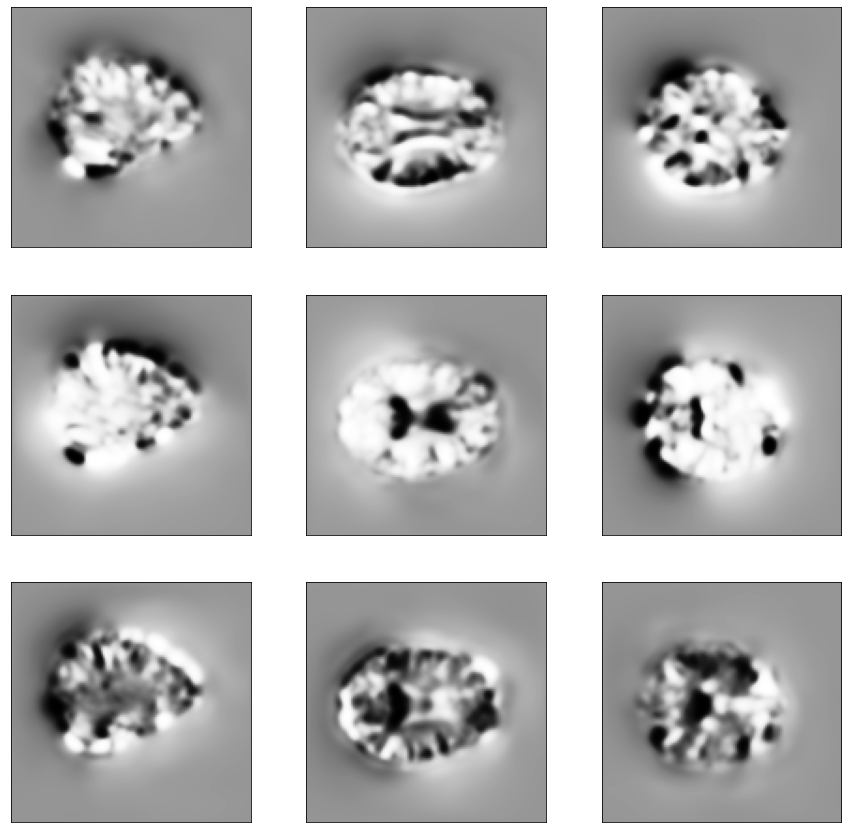

In [ ]:
plt.figure(figsize=(15,15))
j = 0
for i in range(0, 9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  if (i  == 0 or i == 3 or i == 6):
    plt.imshow(dvf_field_np[j, 50, :, :], cmap="Greys_r")
  
  elif (i  == 1 or i == 4 or i == 7):
    plt.imshow(dvf_field_np[j, :, 50, :], cmap="Greys_r")

  elif (i  == 2 or i == 5 or i == 8):
    plt.imshow(dvf_field_np[j, :, :, 50], cmap="Greys_r")

  if ( i == 2):
    j = j+1
  elif ( i == 5):
    j = j + 1


plt.show()

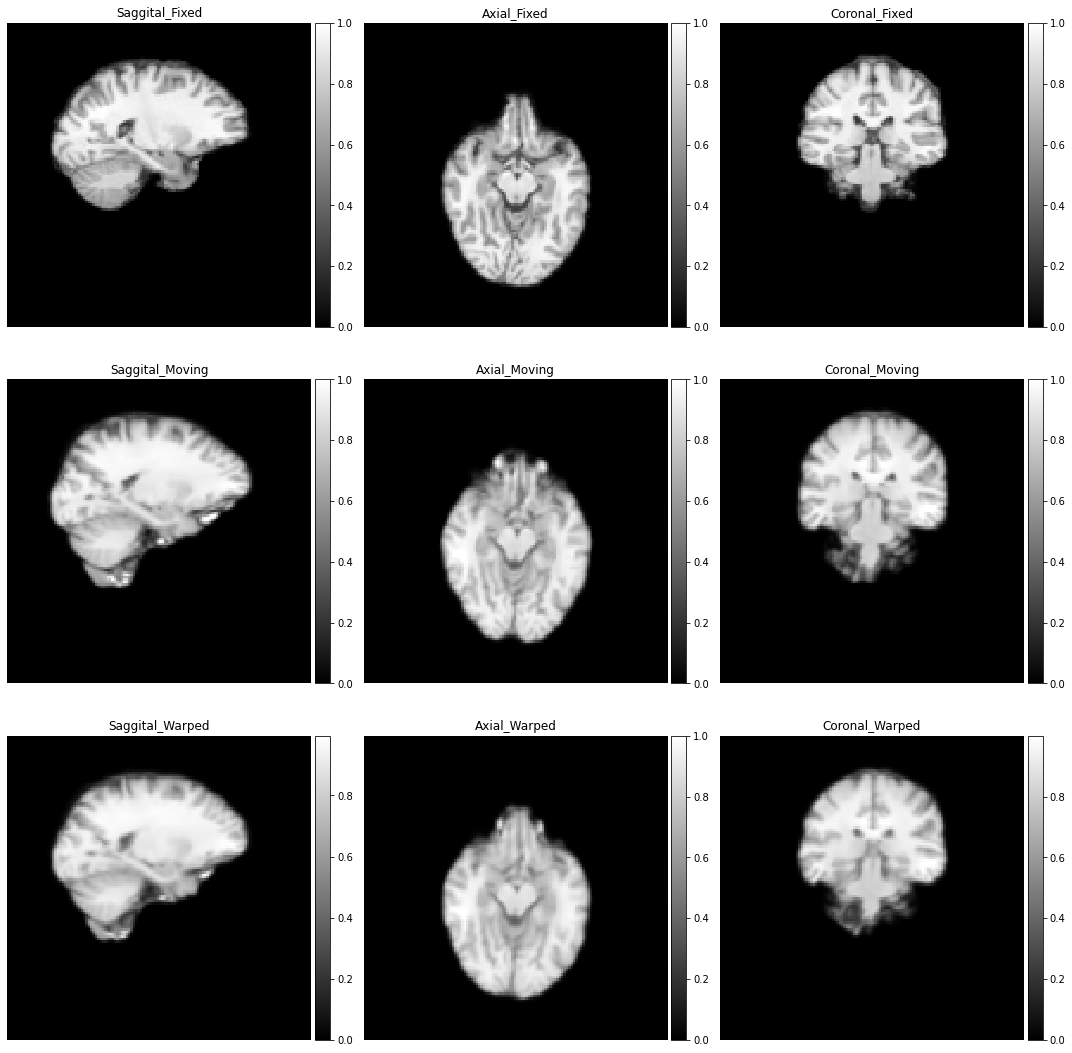

(<Figure size 1080x1080 with 18 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd223b7b50>,
       dtype=object))

In [ ]:
mid_slices_fixed = [np.take(mynb_np1, 54, axis=d) for d in range(3)]
mid_slices_fixed[1] = np.rot90(mid_slices_fixed[1], 1)
mid_slices_fixed[2] = np.rot90(mid_slices_fixed[2], -1)

mid_slices_moving = [np.take(mynb_np2, 54, axis=d) for d in range(3)]
mid_slices_moving[1] = np.rot90(mid_slices_moving[1], 1)
mid_slices_moving[2] = np.rot90(mid_slices_moving[2], -1)

mid_slices_pred = [np.take(warped_img_np, 54, axis=d) for d in range(3)]
mid_slices_pred[1] = np.rot90(mid_slices_pred[1], 1)
mid_slices_pred[2] = np.rot90(mid_slices_pred[2], -1)
ne.plot.slices(mid_slices_fixed + mid_slices_moving + mid_slices_pred, cmaps=['gray'], do_colorbars=True, grid=[3,3], titles=["Saggital_Fixed", "Axial_Fixed", "Coronal_Fixed", "Saggital_Moving", "Axial_Moving", "Coronal_Moving", "Saggital_Warped", "Axial_Warped", "Coronal_Warped"])

# SCG Training SURAJ - run this

In [ ]:
feature_extractor_training = Feature_Extractor3(2,3,16).to("cuda")

# -----------------------------------

scg_training = SCG_block(in_ch=32, hidden_ch=9, node_size=(4, 4, 4)).to("cuda")

# -----------------------------------

upsampler1_training = Upsampler_net6(9, 32, 32).to("cuda")

upsampler2_training = Upsampler_net6(32, 32, 32).to("cuda")

upsampler3_training = Upsampler_net6(32, 32, 32).to("cuda")

upsampler4_training = Upsampler_net6(32, 32, 32).to("cuda")

upsampler5_training = Upsampler_net6(16, 32, 32).to("cuda")


# ------------------------------------

conv_decoder1_training = Upsampler_net4(33, 16).to("cuda")

conv_decoder2_training = Upsampler_net4(16, 16).to("cuda")

conv_decoder3_training = Upsampler_net4(16, 3).to("cuda")

# ------------------------------------

conv_decoder4_training = Upsampler_net4(32, 16).to("cuda")

conv_decoder5_training = Upsampler_net4(16, 16).to("cuda")

conv_decoder6_training = Upsampler_net4(16, 3).to("cuda")

# -----------------------------------

graph_layers1_training = GCN_Layer(32, 16, bnorm=True, activation=nn.LeakyReLU(0.2), dropout=0.1).to("cuda")

graph_layers2_training = GCN_Layer(16, 9, bnorm=True, activation=nn.LeakyReLU(0.2), dropout=0.1).to("cuda")

# -----------------------------------

stn_deformable = SpatialTransformer(size=(128, 128, 128), is_affine=False).to("cuda")

stn_deformable_64 = SpatialTransformer(size=(64, 64, 64), is_affine=False).to("cuda")

weight_xavier_init(graph_layers1_training, graph_layers2_training, scg_training)

# -----------------------------------
for param in stn_deformable.parameters():
  param.requires_grad = False
  param.volatile=True

# -----------------------------------
for param in stn_deformable_64.parameters():
  param.requires_grad = False
  param.volatile=True


# Suraj adding vector integrion code, this enforces diffeomorphic transform
dim = 3
int_downsize = 2
down_shape = [int(dim / int_downsize) for dim in (128, 128, 128)]
resize = ResizeTransform(2, 3).to("cuda")
fullsize = ResizeTransform(0.5, 3).to("cuda")
integrate = VecInt(down_shape, 7).to("cuda")\

# Suraj adding vector integrion code, this enforces diffeomorphic transform
dim_64 = 3
int_downsize_64 = 2
down_shape_64 = [int(dim_64 / int_downsize_64) for dim_64 in (64, 64, 64)]
resize_64 = ResizeTransform(2, 3).to("cuda")
fullsize_64 = ResizeTransform(0.5, 3).to("cuda")
integrate_64 = VecInt(down_shape_64, 7).to("cuda")

In [ ]:
# graph_layers1_training((gx.reshape(B, -1, C), A))
l1, a1 = graph_layers1_training((torch.randn(5, 64, 32).to("cuda"), torch.randn(5, 64, 64).to("cuda")))
l2, a2 = graph_layers2_training((l1, a1))

In [ ]:

checkpoint = torch.load('/content/drive/MyDrive/Idl/DATASET_FINAL/scgnet_changed/trial/scgnet_upsampling_concat_deconv_new_335.pth', map_location=torch.device('cuda'))

feature_extractor_training.load_state_dict(checkpoint['feature_extractor_training'])
scg_training.load_state_dict(checkpoint['scg_training'])

graph_layers1_training.load_state_dict(checkpoint['graph_layers1_training'])
graph_layers2_training.load_state_dict(checkpoint['graph_layers2_training'])

upsampler1_training.load_state_dict(checkpoint["upsampler1_training"])
upsampler2_training.load_state_dict(checkpoint["upsampler2_training"])
upsampler3_training.load_state_dict(checkpoint["upsampler3_training"])
upsampler4_training.load_state_dict(checkpoint["upsampler4_training"])
upsampler5_training.load_state_dict(checkpoint["upsampler5_training"])


conv_decoder1_training.load_state_dict(checkpoint["conv_decoder1_training"])
conv_decoder2_training.load_state_dict(checkpoint["conv_decoder2_training"])
conv_decoder3_training.load_state_dict(checkpoint["conv_decoder3_training"])

<All keys matched successfully>

In [ ]:
# for k,v in checkpoint.items():
#   print(k)
#   if(k == 'conv_decoder1_training'):
#     print(v)

In [ ]:
wandb.config = dict(
    epochs=51,    
    batch_size=3,
    learning_rate=3e-4,
    hyperparam1 = -1.0,
    hyperparam2 = 1.0,
    hyperparam3 = 1.0,
    dataset="IXI-T1,IXI-T2",
    architecture="SCG-NET")

config = wandb.config

In [ ]:
hyperparam1 = config["hyperparam1"]
hyperparam2 = config["hyperparam2"]
hyperparam3 = config["hyperparam3"]

In [ ]:
num_bins = 10
bin_centers = np.linspace(0, 0.9, num_bins*2+1)[1::2]
bin_centers

array([0.045, 0.135, 0.225, 0.315, 0.405, 0.495, 0.585, 0.675, 0.765,
       0.855])

In [ ]:
# similarity_loss = NormalizedCrossCorrelation().to("cuda")
# # similarity_loss = NMI( bin_centers = bin_centers, vol_size = (64, 64, 64))
similarity_loss = MutualInformation(num_bins=10)
smoothness_loss = Grad(penalty='l2')
#smoothness_loss = Smoothnessloss().to("cuda")
lr=config["learning_rate"]

In [ ]:
#similarity_loss = NCC()
# similarity_loss = NMI( bin_centers = bin_centers, vol_size = (64, 64, 64))
#smoothness_loss = Grad(penalty='l2')
#lr=config["learning_rate"]

In [ ]:
# similarity_loss = NCC()
# # similarity_loss = NMI( bin_centers = bin_centers, vol_size = (64, 64, 64))
# smoothness_loss = Grad(penalty='l2')
# lr=config["learning_rate"]

In [ ]:
optimizer = torch.optim.Adam( list( feature_extractor_training.parameters()) + list( scg_training.parameters() ) + 
                             
                             list(upsampler1_training.parameters()) + list(upsampler2_training.parameters()) + 
                             list(upsampler3_training.parameters()) + list(upsampler4_training.parameters()) + 
                             list(upsampler5_training.parameters()) +  

                             list( graph_layers1_training.parameters()) + list(graph_layers2_training.parameters()) +

                             list(conv_decoder1_training.parameters()) + list(conv_decoder2_training.parameters()) + 
                             list(conv_decoder3_training.parameters()) , 
                             lr=lr ) 

# optimizer = torch.optim.Adam( list( feature_extractor_training.parameters()) +
                             
#                              list(upsampler1_training.parameters()) + list(upsampler2_training.parameters()) + 
#                              list(upsampler3_training.parameters()) + list(upsampler4_training.parameters()) + 
#                              list(upsampler5_training.parameters()) +  

#                              list(conv_decoder1_training.parameters()) + list(conv_decoder2_training.parameters()) + 
#                              list(conv_decoder3_training.parameters()), 
                             
#                              lr=lr ) 

model_dir = '/content/drive/MyDrive/DATASET_FINAL/scgnet_changed/trial/'

if not os.path.isdir(model_dir):
  os.mkdir(model_dir)

In [ ]:
def fullmodel_one_epoch_run(epoch=1):
  example_number = 0
  cc_loss_lst = []
  smoothness_loss_lst = []
  scg_loss_lst = []
  total_loss_lst = []
  for X,Y in training_generator:

    X = X.float().to("cuda")
    Y = Y.float().to("cuda")

    X_64 = F.interpolate(X, (64, 64, 64), mode='trilinear', align_corners=False)
    Y_64 = F.interpolate(Y, (64, 64, 64), mode='trilinear', align_corners=False)

    x_size = X.size()

    enc_1, enc_2, enc_3, enc_4, enc_5, enc_6 = feature_extractor_training(X, Y)

    A, gx, scg_loss, z_hat = scg_training(enc_6)
    
    B, C, H, W, D = enc_6.size()

    gop_layers1, A_layers1 = graph_layers1_training((gx.reshape(B, -1, C), A))
    
    gop_layers2, A_layers2 = graph_layers2_training((gop_layers1, A_layers1))

    # Suraj - Comment the below one line out if you see that registration is not happening after 50 epochs
    gop_layers2 = torch.bmm(A_layers2,gop_layers2)

    # ----------------------
    gop_layers2 = gop_layers2 + z_hat

    # Upward trajectory

    gx = gop_layers2.reshape(B, 9, 4, 4, 4)

    gx = F.interpolate(gx, (H, W, D), mode='trilinear', align_corners=False)

    # Adding information from feature extractor directly to latent space info, this could provide a path for gradients to move faster
    gx = upsampler1_training(gx, enc_5) #8
    gx = upsampler2_training(gx, enc_4) #16
    gx = upsampler3_training(gx, enc_3) #32
    gx_64 = upsampler4_training(gx, enc_2) #64
    gx = upsampler5_training(gx_64, enc_1) #128, 32

    # Concat fixed image to final field before smoothening
    gx=torch.cat((X, gx), 1) 

    # Conv decoder last three layers from voxel morph
    gx = conv_decoder1_training(gx) #128, 33 --> 16
    gx = conv_decoder2_training(gx) #128,16
    dvf = conv_decoder3_training(gx) #128,3

    # Conv decoder last three layers from voxel morph
    gx_64 = conv_decoder4_training(gx_64) #64, 2 --> 16
    gx_64 = conv_decoder5_training(gx_64) #64,16
    dvf_64 = conv_decoder6_training(gx_64) #64,3

    #stn_deformable_64

    # Suraj adding vector integration for diffeomorphic field

    pos_flow = resize(dvf)
    integrated_pos_flow = integrate(pos_flow)
    full_flow = fullsize(integrated_pos_flow)

    # pos_flow_64 = resize(dvf_64)
    # integrated_pos_flow_64 = integrate(pos_flow_64)
    # full_flow_64 = fullsize(integrated_pos_flow_64)

    fully_warped_image =  stn_deformable(Y, full_flow)
    fully_warped_image_64 =  stn_deformable_64(Y_64, dvf_64)

    cc_loss = similarity_loss(X, fully_warped_image)
    sm_loss = smoothness_loss.loss("",full_flow)

    cc_loss = torch.mean(cc_loss)

    cc_loss_64 = similarity_loss(X_64, fully_warped_image_64)
    sm_loss_64 = smoothness_loss.loss("",dvf_64)
    cc_loss_64 = torch.mean(cc_loss_64)

    #print('sm_loss {}'.format(sm_loss))
    total_loss = hyperparam1 * cc_loss + hyperparam3 * sm_loss + hyperparam2 * scg_loss + cc_loss_64 * -0.5 + sm_loss_64 * 0.5

    optimizer.zero_grad()          
    total_loss.backward() 
    optimizer.step()

    cc_loss_lst.append(cc_loss.detach().cpu().numpy().item())
    smoothness_loss_lst.append(sm_loss.detach().cpu().numpy().item())
    scg_loss_lst.append(scg_loss.detach().cpu().numpy().item())
    total_loss_lst.append(total_loss.detach().cpu().numpy().item())

    del X, Y, enc_1, enc_2, enc_3, enc_4, enc_5, enc_6, dvf, fully_warped_image, full_flow, integrated_pos_flow, pos_flow
    del A, gx, z_hat, gop_layers1, A_layers1, gop_layers2, A_layers2
    del X_64, Y_64, dvf_64
    torch.cuda.empty_cache() 
   
    example_number = example_number + 1
    


  if (epoch%5 == 0):
    modelname = model_dir + '/' + "scgnet_upsampling_concat_deconv_intermodal_new_" + str(epoch) + '.pth'
    torch.save({"feature_extractor_training": feature_extractor_training.state_dict(), "scg_training": scg_training.state_dict(), 
                "upsampler1_training": upsampler1_training.state_dict(), "upsampler2_training": upsampler2_training.state_dict(),
                "upsampler3_training": upsampler3_training.state_dict(), "upsampler4_training": upsampler4_training.state_dict(), 
                "upsampler5_training": upsampler5_training.state_dict(), 
                "graph_layers1_training": graph_layers1_training.state_dict(), "graph_layers2_training": graph_layers2_training.state_dict(),
                "conv_decoder1_training": conv_decoder1_training.state_dict(), "conv_decoder2_training": conv_decoder2_training.state_dict(),
                "conv_decoder3_training": conv_decoder3_training.state_dict(), "conv_decoder4_training": conv_decoder4_training.state_dict(), 
                "conv_decoder5_training": conv_decoder5_training.state_dict(),
                "conv_decoder6_training": conv_decoder6_training.state_dict()}, modelname)
    # sum(abs(x) for x in scg_loss_lst)/len(scg_loss_lst),

    # torch.save({"feature_extractor_training": feature_extractor_training.state_dict(),
    #             "upsampler1_training": upsampler1_training.state_dict(), "upsampler2_training": upsampler2_training.state_dict(),
    #             "upsampler3_training": upsampler3_training.state_dict(), "upsampler4_training": upsampler4_training.state_dict(), 
    #             "upsampler5_training": upsampler5_training.state_dict(), 
    #             "conv_decoder1_training": conv_decoder1_training.state_dict(), "conv_decoder2_training": conv_decoder2_training.state_dict(),
    #             "conv_decoder3_training": conv_decoder3_training.state_dict()}, modelname)
    print("epoch: {}".format(epoch+0))
    print("Losses: {}, {}  and {}".format(cc_loss * hyperparam1, hyperparam3 * sm_loss, total_loss))
    print("Average Losses: {}, {} ,{}, {}".format(sum(cc_loss_lst)/len(cc_loss_lst), sum(abs(x) for x in smoothness_loss_lst)/len(smoothness_loss_lst) , 
                                                  sum(abs(x) for x in scg_loss_lst)/len(scg_loss_lst), sum(total_loss_lst)/len(total_loss_lst) ) )
    print("Saving model checkpoints")
    print("======= =============== ===========")
    print()
  
  elif (epoch%2 == 0):
    print("epoch: {}".format(epoch))
    print("Losses: {}, {}  and {}".format(cc_loss * hyperparam1, hyperparam3 * sm_loss, total_loss))
    print("Average Losses: {}, {} ,{}, {}".format(sum(cc_loss_lst)/len(cc_loss_lst), sum(abs(x) for x in smoothness_loss_lst)/len(smoothness_loss_lst) , 
                                                sum(abs(x) for x in scg_loss_lst)/len(scg_loss_lst), sum(total_loss_lst)/len(total_loss_lst) ) )
    print("======= =============== ===========")
    print()

  
  wandb.log({"epoch": epoch, "total_loss": sum(total_loss_lst)/len(total_loss_lst), "cross_corelation_loss": sum(cc_loss_lst)/len(cc_loss_lst), 
             "scg_loss":sum(abs(x) for x in scg_loss_lst)/len(scg_loss_lst),"smoothness_loss": sum(smoothness_loss_lst)/len(smoothness_loss_lst) })
  
  
  return cc_loss_lst, smoothness_loss_lst, scg_loss_lst

In [ ]:
with wandb.init(project="Image_Registration", config=config):
 
  epochs = 1
  a = []
  b = []
  c = []
  start_time = time.time()
  # wandb.watch(complete_model, criterion=NormalizedCrossCorrelation(), log="all", log_freq=10)
  for e in range(epochs):
    m,n,o = fullmodel_one_epoch_run(epoch=e+1000)
    a.append(m)
    b.append(n)
    c.append(o)
 
  end_time = time.time()
  print("Total time taken: {} minutes".format((end_time-start_time)/60.0))

epoch: 1000
Losses: -1.8271088600158691, 3.4430258892825805e-06  and -2.7581706047058105
Average Losses: 1.8716739463806151, 1.644529510826942e-06 ,0.0019241472752764821, -2.820468740463257
Saving model checkpoints
======= =============== ===========

Total time taken: 5.403506775697072 minutes


cross_corelation_loss,▁
epoch,▁
scg_loss,▁
smoothness_loss,▁
total_loss,▁
cross_corelation_loss,1.87167
epoch,1000
scg_loss,0.00192
smoothness_loss,0.0
total_loss,-2.82047


# SCG Validation SURAJ - run this

In [ ]:
feature_extractor_inference = Feature_Extractor3(2,3,16).to("cuda")

# -----------------------------------

scg_inference = SCG_block(in_ch=32, hidden_ch=9, node_size=(4, 4, 4)).to("cuda")

upsampler1_inference = Upsampler_net6(9, 32, 32).to("cuda")

upsampler2_inference  = Upsampler_net6(32, 32, 32).to("cuda")

upsampler3_inference  = Upsampler_net6(32, 32, 32).to("cuda")

upsampler4_inference  = Upsampler_net6(32, 32, 32).to("cuda")

upsampler5_inference  = Upsampler_net6(16, 32, 32).to("cuda")

# ------------------------------------

conv_decoder1_inference  = Upsampler_net4(33, 16).to("cuda")

conv_decoder2_inference  = Upsampler_net4(16, 16).to("cuda")

conv_decoder3_inference  = Upsampler_net4(16, 3).to("cuda")



graph_layers1_inference = GCN_Layer(32, 16, bnorm=True, activation=nn.LeakyReLU(0.2), dropout=0.1).to("cuda")

graph_layers2_inference = GCN_Layer(16, 9, bnorm=True, activation=nn.LeakyReLU(0.2), dropout=0.1).to("cuda")

stn_deformable_inference = SpatialTransformer(size=(128, 128, 128), is_affine=False).to("cuda")

weight_xavier_init(graph_layers1_inference, graph_layers2_inference, scg_inference)

deformation_output_inference = DeformationField(3, 3).to("cuda")

for param in stn_deformable_inference.parameters():
  param.requires_grad = False
  param.volatile=True


dim = 3
int_downsize = 2
down_shape = [int(dim / int_downsize) for dim in (128, 128, 128)]
resize = ResizeTransform(2, 3).to("cuda")
fullsize = ResizeTransform(0.5, 3).to("cuda")
integrate = VecInt(down_shape, 7).to("cuda")

In [ ]:
# upsampler1_inference = Upsampler_net2(32).to("cuda")

# upsampler2_inference = Upsampler_net2(8).to("cuda")

# upsampler1_inference = Upsampler_net3(8, 4, 9, 9).to("cuda")

# upsampler2_inference = Upsampler_net3(8, 3, 9, 3).to("cuda")

# upsampler3_inference = Upsampler_net3(8, 2, 9, 9).to("cuda")

# upsampler4_inference = Upsampler_net3(8, 1, 9, 3).to("cuda")

# upsampler1_inference = Upsampler_net5(8, 4, 9, 32).to("cuda")

# upsampler2_inference = Upsampler_net5(8, 3, 32, 16).to("cuda")

# upsampler3_inference = Upsampler_net5(8, 2, 16, 8).to("cuda")

# upsampler4_inference = Upsampler_net5(8, 1, 8, 3).to("cuda")

# conv_decoder1_inference = Upsampler_net4(32, 32).to("cuda")

# conv_decoder2_inference = Upsampler_net4(16, 16).to("cuda")

# conv_decoder3_inference = Upsampler_net4(8, 8).to("cuda")

# conv_decoder4_inference = Upsampler_net4(8, 3).to("cuda")

# conv_decoder5_inference = Upsampler_net4(11, 3).to("cuda")

# conv_decoder6_inference = Upsampler_net4(3, 3).to("cuda")

In [ ]:
model_dir = '/content/drive/MyDrive/Idl/DATASET_FINAL/scgnet_changed/scgnet_icnet_vss_batch/'

if not os.path.isdir(model_dir):
  os.mkdir(model_dir)
  print("made directort")

In [ ]:
!mkdir '/content/drive/MyDrive/Idl/DATASET_FINAL/scgnet_changed/scgnet_icnet_vss_batch/'
model_dir


'/content/drive/MyDrive/DATASET_FINAL/scgnet_changed/lr_.0003_h1_1_h2_1_h3_1/'

In [ ]:
!chmod 777 '/content/drive/MyDrive/DATASET_FINAL/scgnet_changed/lr_.0003_h1_1_h2_1_h3_1'

In [ ]:
!ls -ltr '/content/drive/MyDrive/DATASET_FINAL/scgnet_changed/lr_.0003_h1_1_h2_1_h3_1/output'

total 0


In [ ]:
!ls -ltr '/content/drive/MyDrive/DATASET_FINAL/scgnet_changed/lr_.0003_h1_1_h2_1_h3_1'

total 17291
-rw------- 1 root root 1608773 Sep 30 08:43 scgnet_upsampling_concat_deconv_new_0.pth
-rw------- 1 root root 1608773 Sep 30 09:02 scgnet_upsampling_concat_deconv_new_5.pth
-rw------- 1 root root 1608773 Sep 30 09:21 scgnet_upsampling_concat_deconv_new_10.pth
-rw------- 1 root root 1608773 Sep 30 09:39 scgnet_upsampling_concat_deconv_new_15.pth
-rw------- 1 root root 1608773 Sep 30 09:58 scgnet_upsampling_concat_deconv_new_20.pth
-rw------- 1 root root 1608773 Sep 30 10:17 scgnet_upsampling_concat_deconv_new_25.pth
-rw------- 1 root root 1608773 Sep 30 10:35 scgnet_upsampling_concat_deconv_new_30.pth
-rw------- 1 root root 1608773 Sep 30 10:54 scgnet_upsampling_concat_deconv_new_35.pth
-rw------- 1 root root 1608773 Sep 30 11:13 scgnet_upsampling_concat_deconv_new_40.pth
-rw------- 1 root root 1608773 Sep 30 11:31 scgnet_upsampling_concat_deconv_new_45.pth
-rw------- 1 root root 1608773 Sep 30 11:50 scgnet_upsampling_concat_deconv_new_50.pth
drwx------ 2 root root    4096 Se

In [ ]:
# Suraj - Please change the path of checkpoint to latest checkpoint
checkpoint = torch.load(os.path.join(model_dir, 'scgnet_upsampling_concat_deconv_new_600.pth'), map_location=torch.device('cuda'))

feature_extractor_inference.load_state_dict(checkpoint['feature_extractor_training'])
scg_inference.load_state_dict(checkpoint['scg_training'])

graph_layers1_inference.load_state_dict(checkpoint['graph_layers1_training'])
graph_layers2_inference.load_state_dict(checkpoint['graph_layers2_training'])

upsampler1_inference.load_state_dict(checkpoint["upsampler1_training"])
upsampler2_inference.load_state_dict(checkpoint["upsampler2_training"])
upsampler3_inference.load_state_dict(checkpoint["upsampler3_training"])
upsampler4_inference.load_state_dict(checkpoint["upsampler4_training"])
upsampler5_inference.load_state_dict(checkpoint["upsampler5_training"])


conv_decoder1_inference.load_state_dict(checkpoint["conv_decoder1_training"])
conv_decoder2_inference.load_state_dict(checkpoint["conv_decoder2_training"])
conv_decoder3_inference.load_state_dict(checkpoint["conv_decoder3_training"])


<All keys matched successfully>

In [ ]:
stn_deformable_inference.eval()
scg_inference.eval()
upsampler1_inference.eval()
upsampler2_inference.eval()
upsampler3_inference.eval()
upsampler4_inference.eval()
upsampler5_inference.eval()
conv_decoder1_inference.eval()
conv_decoder2_inference.eval()
conv_decoder3_inference.eval()
graph_layers1_inference.eval()
graph_layers2_inference.eval()
deformation_output_inference.eval()

DeformationField(
  (deform_output): Sequential(
    (0): Conv3d(3, 3, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
    (1): Tanh()
  )
)

In [ ]:
def fullmodel_inference_loop(epoch=1):
  example_number = 0
  counter = 0
  for X,Y in validation_generator:

    X = X.float().to("cuda")
    Y = Y.float().to("cuda")

    X_64 = F.interpolate(X, (64, 64, 64), mode='trilinear', align_corners=False)
    Y_64 = F.interpolate(Y, (64, 64, 64), mode='trilinear', align_corners=False)

    x_size = X.size()

    enc_1, enc_2, enc_3, enc_4, enc_5, enc_6 = feature_extractor_inference(X, Y)
    #print(feature_extractor_op.shape)
    #print()

    A, gx, scg_loss, z_hat = scg_inference(enc_6)
    
    B, C, H, W, D = enc_6.size()
    #print(A.shape, gx.shape, loss.shape, z_hat.shape, gx.reshape(B, -1, C).shape)
    #print(loss)
    #print()

    gop_layers1, A_layers1 = graph_layers1_inference((gx.reshape(B, -1, C), A))
    # #print(gop_layers1.shape, A_layers1.shape)
    # #print()
    
    gop_layers2, A_layers2 = graph_layers2_inference((gop_layers1, A_layers1))
    # #print(gop_layers2.shape, A_layers2.shape)

    # #gop_layers3, A_layers3 = graph_layers3_inference((gop_layers2, A_layers2))

    # #gop_layers2 = torch.bmm(A_layers2,gop_layers2)

    gop_layers2 = gop_layers2 + z_hat

    # # Upward trajectory

    gx = gop_layers2.reshape(B, 9, 4, 4, 4)

    gx = F.interpolate(gx, (H, W, D), mode='trilinear', align_corners=False)

    # Adding information from feature extractor directly to latent space info, this could provide a path for gradients to move faster
    gx = upsampler1_inference(gx, enc_5) #8
    gx = upsampler2_inference(gx, enc_4) #16
    gx = upsampler3_inference(gx, enc_3) #32
    gx = upsampler4_inference(gx, enc_2) #64
    gx = upsampler5_inference(gx, enc_1) #128, 32

    # Concat fixed image to final field before smoothening
    gx=torch.cat((X, gx), 1) 

    gx = conv_decoder1_inference(gx) #128,16
    gx = conv_decoder2_inference(gx) #128,16
    dvf = conv_decoder3_inference(gx) #128,3

    # Suraj adding vector integration for diffeomorphic field

    pos_flow = resize(dvf)
    integrated_pos_flow = integrate(pos_flow)
    full_flow = fullsize(integrated_pos_flow)

    # ===============

    fully_warped_image =  stn_deformable_inference(Y, full_flow)

    full_warped_np = fully_warped_image.detach().to("cpu").numpy()
    full_warped_nb = nb.Nifti1Image(full_warped_np[0,0,:,:,:], np.eye(4)) #'/content/drive/MyDrive/DATASET_FINAL/scgnet_changed/lr_.0001_h1_-1_h2_100_h3_1/'
    nb.save(full_warped_nb, '/content/drive/MyDrive/Idl/DATASET_FINAL/eval/output/' +  os.path.basename(file_names_t1[counter])[:-7]+"_F_"+os.path.basename(file_names_t2[counter])[:-7]+"_M.nii.gz")

    #dvf_np = dvf.detach().to("cpu").numpy()
    #dvf_nb = nb.Nifti1Image(dvf_np[0,:,:,:,:], np.eye(4)) 
    #nb.save(dvf_nb, '/content/drive/MyDrive/Idl/DATASET_FINAL/scgnet_changed/inverse_scg/output/' +  'dvf_nb_' + str(counter) + '.nii.gz')

    counter = counter + 1
    print(counter)
    del X, Y, enc_1, enc_2, enc_3, enc_4, enc_5, enc_6, dvf, fully_warped_image, pos_flow, integrated_pos_flow, full_flow
    # del A, gx, z_hat, gop_layers1, A_layers1, gop_layers2, A_layers2
    torch.cuda.empty_cache() 
   
    example_number = example_number + 1
   
    #if(counter > 19):
    #  break;
    

In [ ]:
fullmodel_inference_loop()

/content/drive/MyDrive/Idl/DATASET_FINAL/eval/Batch_1_bet_subset/IXI044-Guys-0712-T1.nii.gz
/content/drive/MyDrive/Idl/DATASET_FINAL/eval/Batch_2_bet_subset_affine/IXI197-Guys-0811-T1.nii.gz
1
/content/drive/MyDrive/Idl/DATASET_FINAL/eval/Batch_1_bet_subset/IXI054-Guys-0707-T1.nii.gz
/content/drive/MyDrive/Idl/DATASET_FINAL/eval/Batch_2_bet_subset_affine/IXI202-HH-1526-T1.nii.gz
2
/content/drive/MyDrive/Idl/DATASET_FINAL/eval/Batch_1_bet_subset/IXI061-Guys-0715-T1.nii.gz
/content/drive/MyDrive/Idl/DATASET_FINAL/eval/Batch_2_bet_subset_affine/IXI204-HH-1651-T1.nii.gz
3
/content/drive/MyDrive/Idl/DATASET_FINAL/eval/Batch_1_bet_subset/IXI070-Guys-0767-T1.nii.gz
/content/drive/MyDrive/Idl/DATASET_FINAL/eval/Batch_2_bet_subset_affine/IXI206-HH-1650-T1.nii.gz
4
/content/drive/MyDrive/Idl/DATASET_FINAL/eval/Batch_1_bet_subset/IXI073-Guys-0755-T1.nii.gz
/content/drive/MyDrive/Idl/DATASET_FINAL/eval/Batch_2_bet_subset_affine/IXI207-Guys-0809-T1.nii.gz
5


In [ ]:
fully_warped_img = nb.load("/content/drive/MyDrive/Idl/DATASET_FINAL/scgnet_changed/scgnet_intermodal/IXI042-Guys-0725-T1_F_T2_M.nii.gz")
warped_img_np = fully_warped_img.dataobj

mynb_np1 = imgnorm(load_4D_200(file_names_t1[0]))
mynb_np1 = mynb_np1[0,:,:,:]
mynb_np2 = imgnorm(load_4D_200(file_names_t2[0]))
mynb_np2 = imgnorm(mynb_np2[0,:,:,:])
vol_shape = (128, 128, 128)
print(file_names_t1[0])
print(file_names_t2[0])

/content/drive/MyDrive/Idl/DATASET_FINAL/Test/intermodal/Batch_2/T1_F_T2_M/T1/IXI042-Guys-0725-T1.nii.gz
/content/drive/MyDrive/Idl/DATASET_FINAL/Test/intermodal/Batch_2/T1_F_T2_M/T2_affine/IXI042-Guys-0725-T2.nii.gz


In [ ]:
#!ls -ltr "/content/drive/MyDrive/dataset/"

In [ ]:
import nibabel as nb
dvf_field = nb.load("/content/drive/MyDrive/Idl/DATASET_FINAL/scgnet_changed/scgnet_intermodal/dvf_nb_0.nii.gz")
dvf_field_np = dvf_field.dataobj

dvf_field_np.shape

(3, 128, 128, 128)

In [ ]:
import neurite as ne

In [ ]:
sq = dvf_field_np[1].squeeze()
sq.shape

(128, 128, 128)

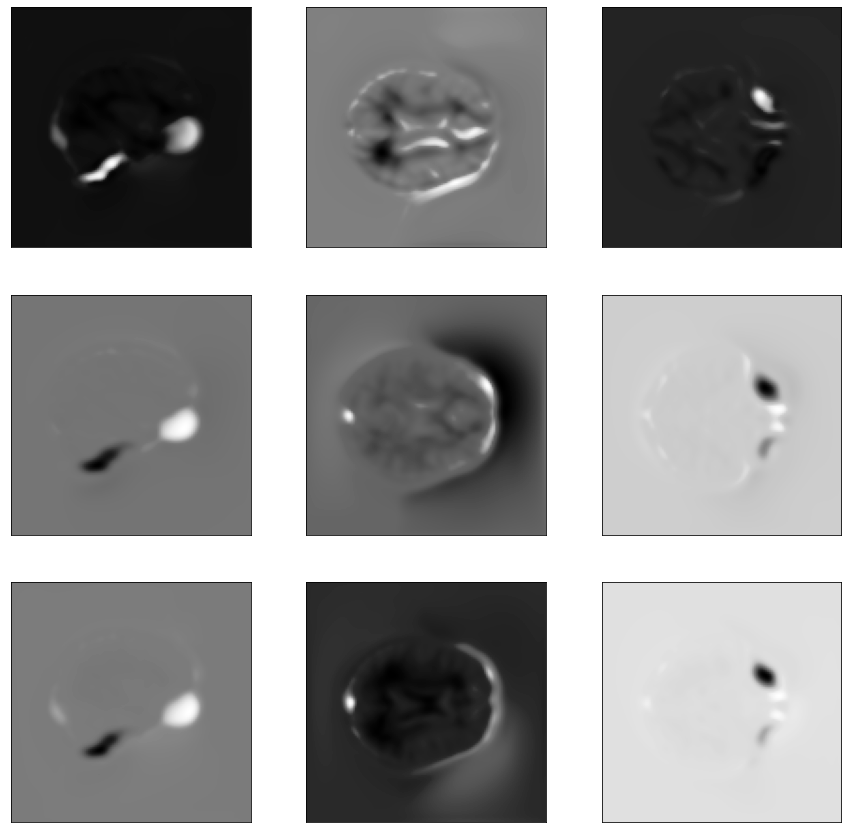

In [ ]:
plt.figure(figsize=(15,15))
j = 0
for i in range(0, 9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  if (i  == 0 or i == 3 or i == 6):
    plt.imshow(dvf_field_np[j, 50, :, :], cmap="Greys_r")
  
  elif (i  == 1 or i == 4 or i == 7):
    plt.imshow(dvf_field_np[j, :, 50, :], cmap="Greys_r")

  elif (i  == 2 or i == 5 or i == 8):
    plt.imshow(dvf_field_np[j, :, :, 50], cmap="Greys_r")

  if ( i == 2):
    j = j+1
  elif ( i == 5):
    j = j + 1


plt.show()

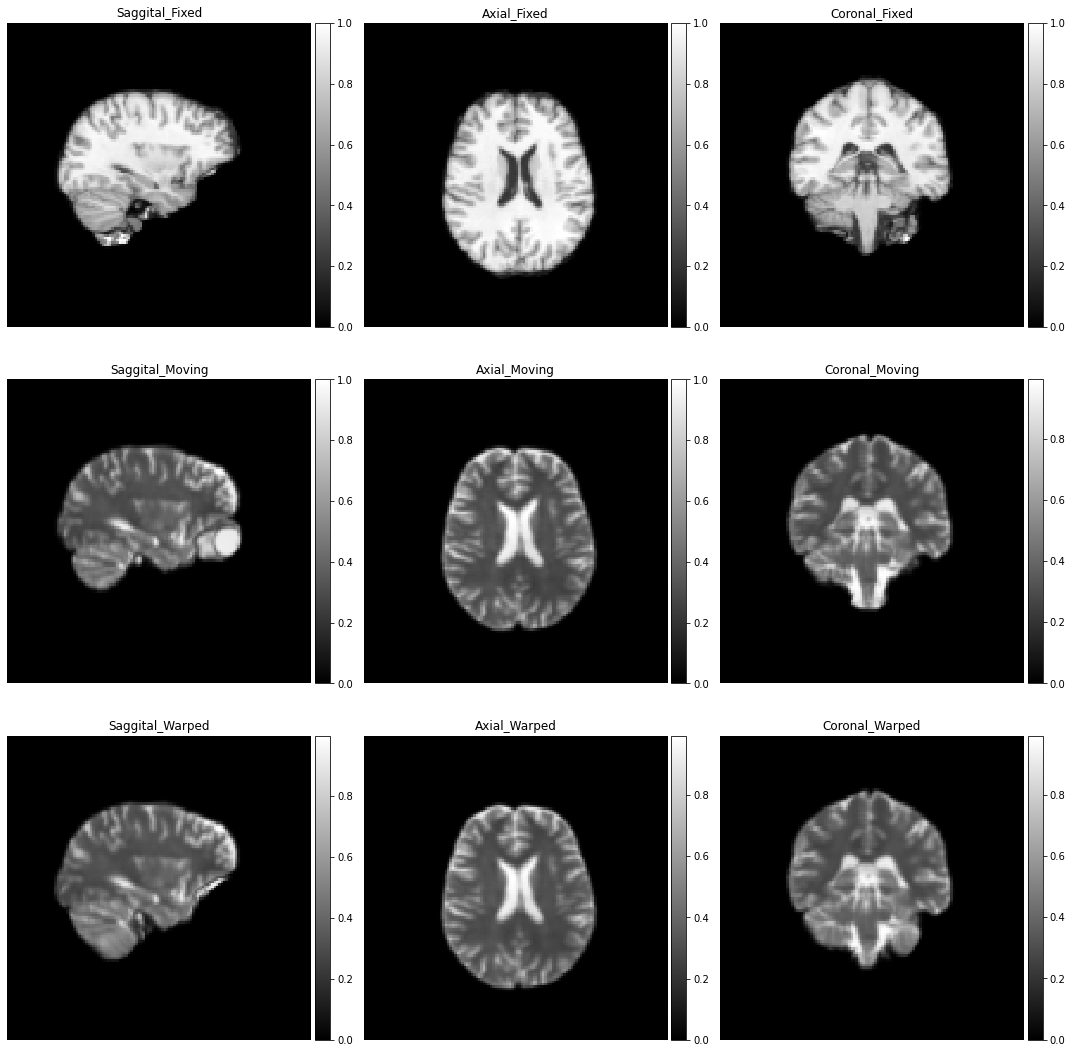

(<Figure size 1080x1080 with 18 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c2a3d8290>,
       dtype=object))

In [ ]:
mid_slices_fixed = [np.take(mynb_np1, 50, axis=d) for d in range(3)]
mid_slices_fixed[1] = np.rot90(mid_slices_fixed[1], 1)
mid_slices_fixed[2] = np.rot90(mid_slices_fixed[2], -1)

mid_slices_moving = [np.take(mynb_np2, 50, axis=d) for d in range(3)]
mid_slices_moving[1] = np.rot90(mid_slices_moving[1], 1)
mid_slices_moving[2] = np.rot90(mid_slices_moving[2], -1)

mid_slices_pred = [np.take(warped_img_np, 50, axis=d) for d in range(3)]
mid_slices_pred[1] = np.rot90(mid_slices_pred[1], 1)
mid_slices_pred[2] = np.rot90(mid_slices_pred[2], -1)
ne.plot.slices(mid_slices_fixed + mid_slices_moving + mid_slices_pred, cmaps=['gray'], do_colorbars=True, grid=[3,3], titles=["Saggital_Fixed", "Axial_Fixed", "Coronal_Fixed", "Saggital_Moving", "Axial_Moving", "Coronal_Moving", "Saggital_Warped", "Axial_Warped", "Coronal_Warped"])

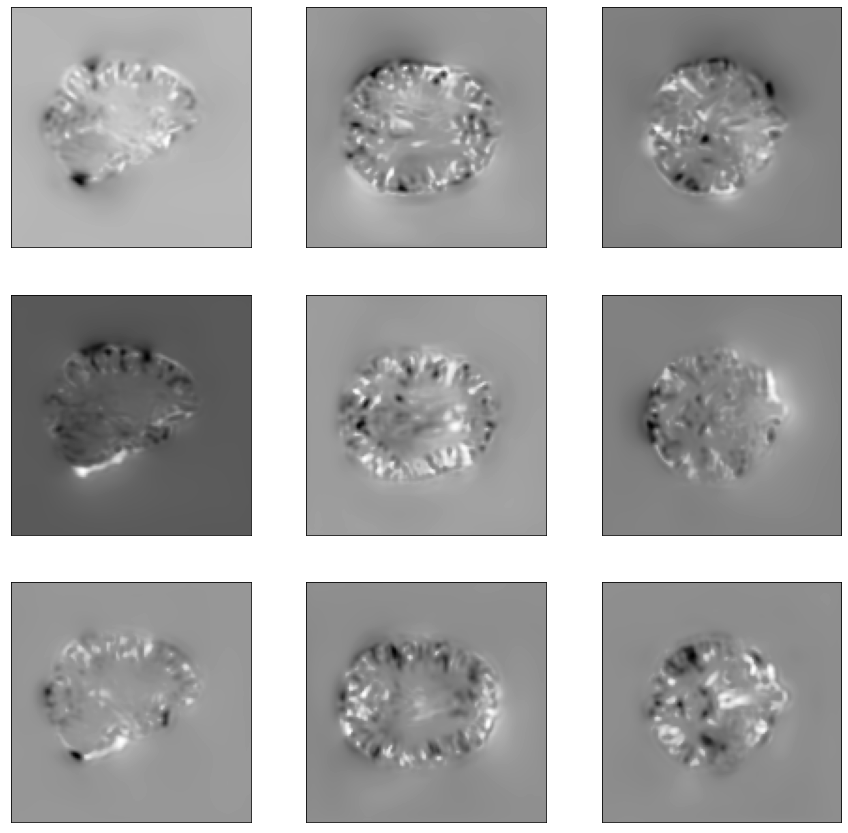

In [ ]:
plt.figure(figsize=(15,15))
j = 0
for i in range(0, 9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  if (i  == 0 or i == 3 or i == 6):
    plt.imshow(dvf_field_np[j, 50, :, :], cmap="Greys_r")
  
  elif (i  == 1 or i == 4 or i == 7):
    plt.imshow(dvf_field_np[j, :, 50, :], cmap="Greys_r")

  elif (i  == 2 or i == 5 or i == 8):
    plt.imshow(dvf_field_np[j, :, :, 50], cmap="Greys_r")

  if ( i == 2):
    j = j+1
  elif ( i == 5):
    j = j + 1


plt.show()

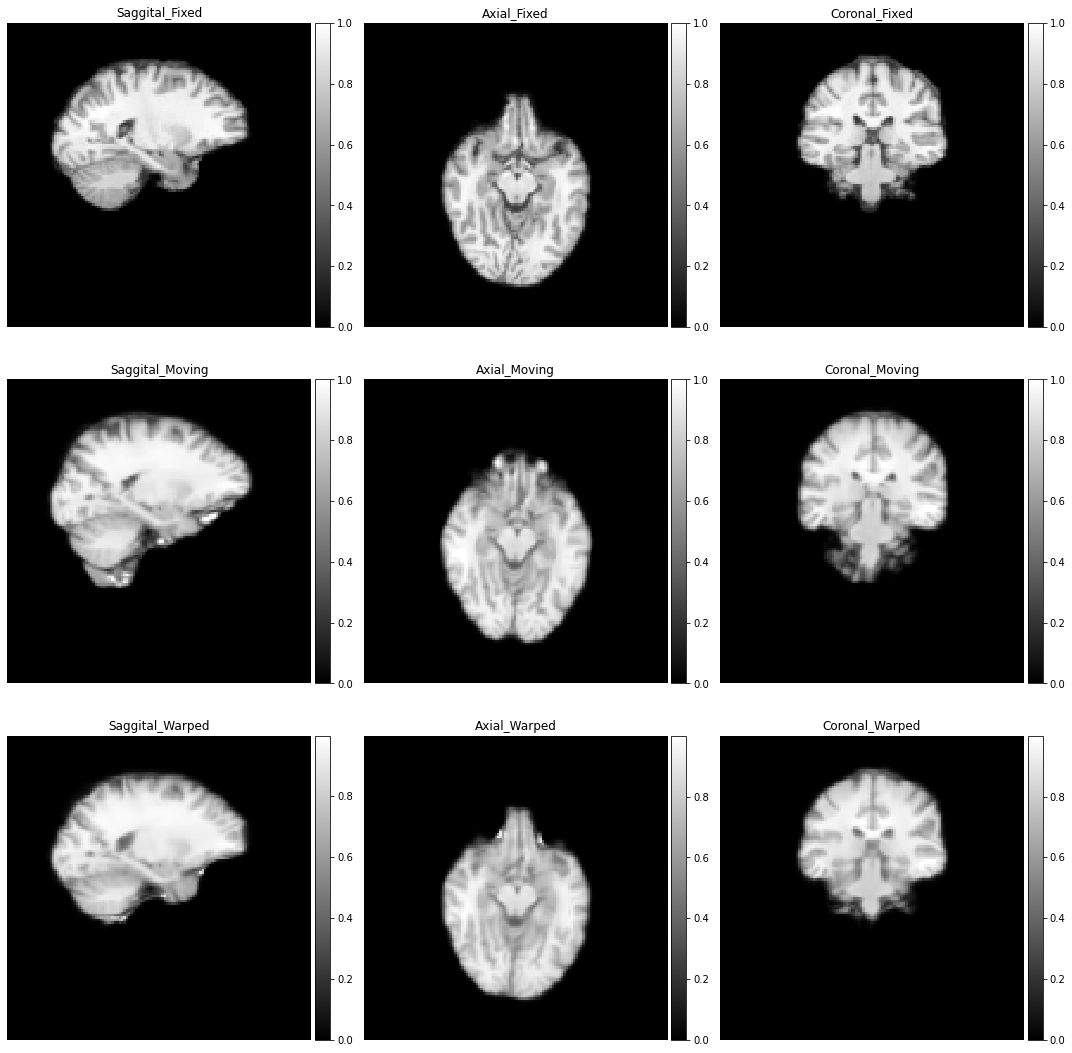

(<Figure size 1080x1080 with 18 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b454814d0>,
       dtype=object))

In [ ]:
mid_slices_fixed = [np.take(mynb_np1, 54, axis=d) for d in range(3)]
mid_slices_fixed[1] = np.rot90(mid_slices_fixed[1], 1)
mid_slices_fixed[2] = np.rot90(mid_slices_fixed[2], -1)

mid_slices_moving = [np.take(mynb_np2, 54, axis=d) for d in range(3)]
mid_slices_moving[1] = np.rot90(mid_slices_moving[1], 1)
mid_slices_moving[2] = np.rot90(mid_slices_moving[2], -1)

mid_slices_pred = [np.take(warped_img_np, 54, axis=d) for d in range(3)]
mid_slices_pred[1] = np.rot90(mid_slices_pred[1], 1)
mid_slices_pred[2] = np.rot90(mid_slices_pred[2], -1)
ne.plot.slices(mid_slices_fixed + mid_slices_moving + mid_slices_pred, cmaps=['gray'], do_colorbars=True, grid=[3,3], titles=["Saggital_Fixed", "Axial_Fixed", "Coronal_Fixed", "Saggital_Moving", "Axial_Moving", "Coronal_Moving", "Saggital_Warped", "Axial_Warped", "Coronal_Warped"])

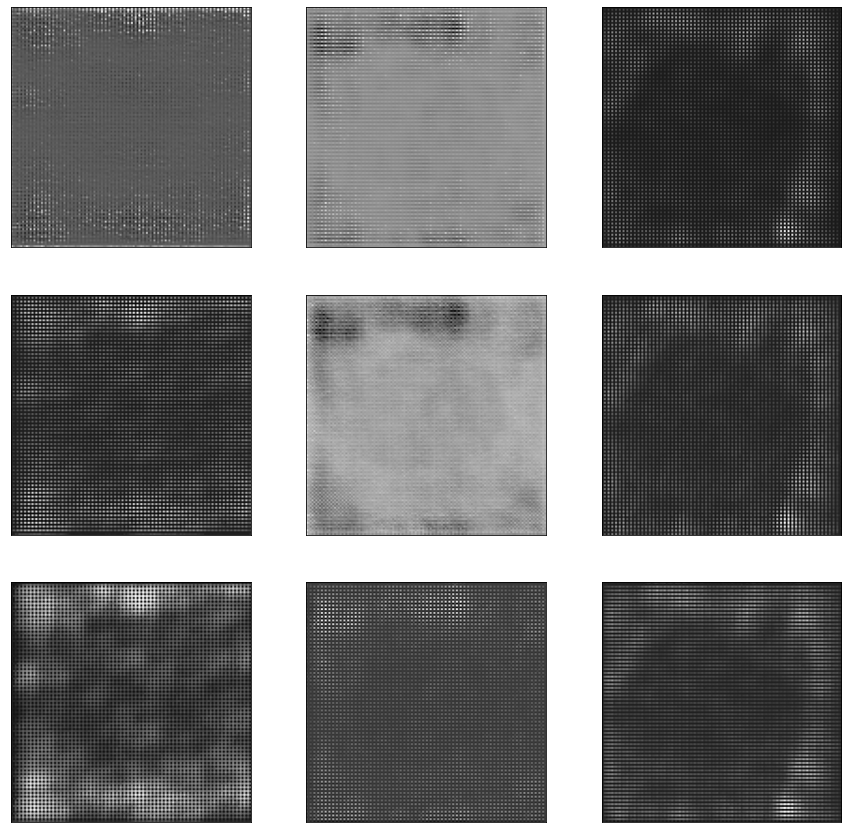

In [ ]:
plt.figure(figsize=(15,15))
j = 0
for i in range(0, 9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  if (i  == 0 or i == 3 or i == 6):
    plt.imshow(dvf_field_np[j, 50, :, :], cmap="Greys_r")
  
  elif (i  == 1 or i == 4 or i == 7):
    plt.imshow(dvf_field_np[j, :, 50, :], cmap="Greys_r")

  elif (i  == 2 or i == 5 or i == 8):
    plt.imshow(dvf_field_np[j, :, :, 50], cmap="Greys_r")

  if ( i == 2):
    j = j+1
  elif ( i == 5):
    j = j + 1


plt.show()

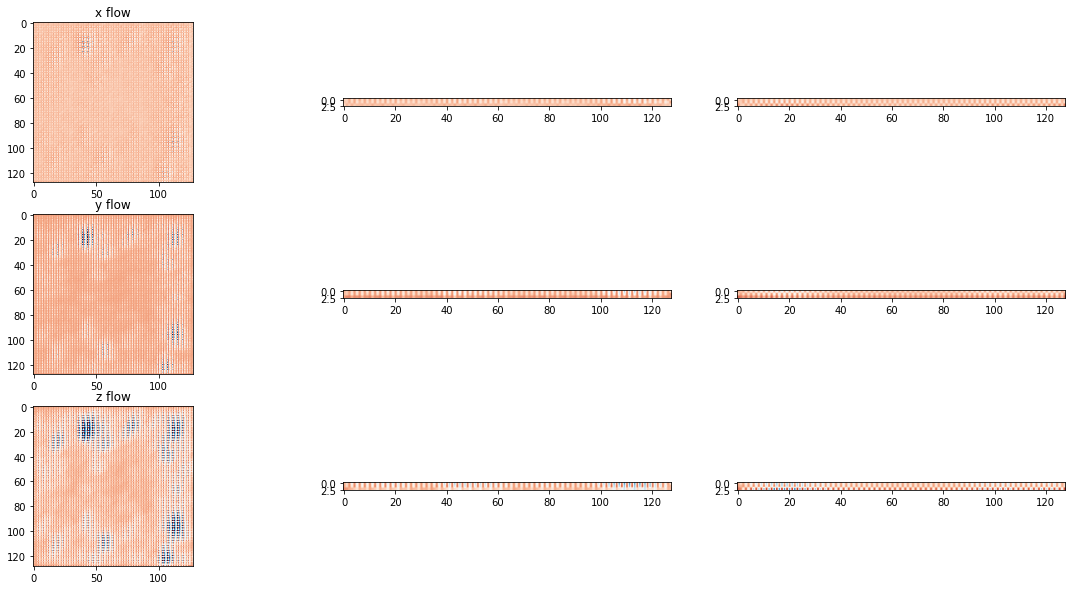

In [ ]:
flow = dvf_field_np
flow_sd = np.std(flow)
v_args = dict(cmap = 'RdBu', vmin = -flow_sd, vmax = +flow_sd)
fig, m_axs = plt.subplots(3, 3, figsize = (20, 10))
for i, (ax1, ax2, ax3) in enumerate(m_axs):
    ax1.imshow(np.mean(flow[:, :, :, i], 0), **v_args)
    ax1.set_title('xyz'[i]+' flow')
    ax2.imshow(np.mean(flow[:, :, :, i], 1), **v_args)
    ax3.imshow(np.mean(flow[:, :, :, i], 2), **v_args)

In [ ]:
flow.shape

(3, 128, 128, 128)

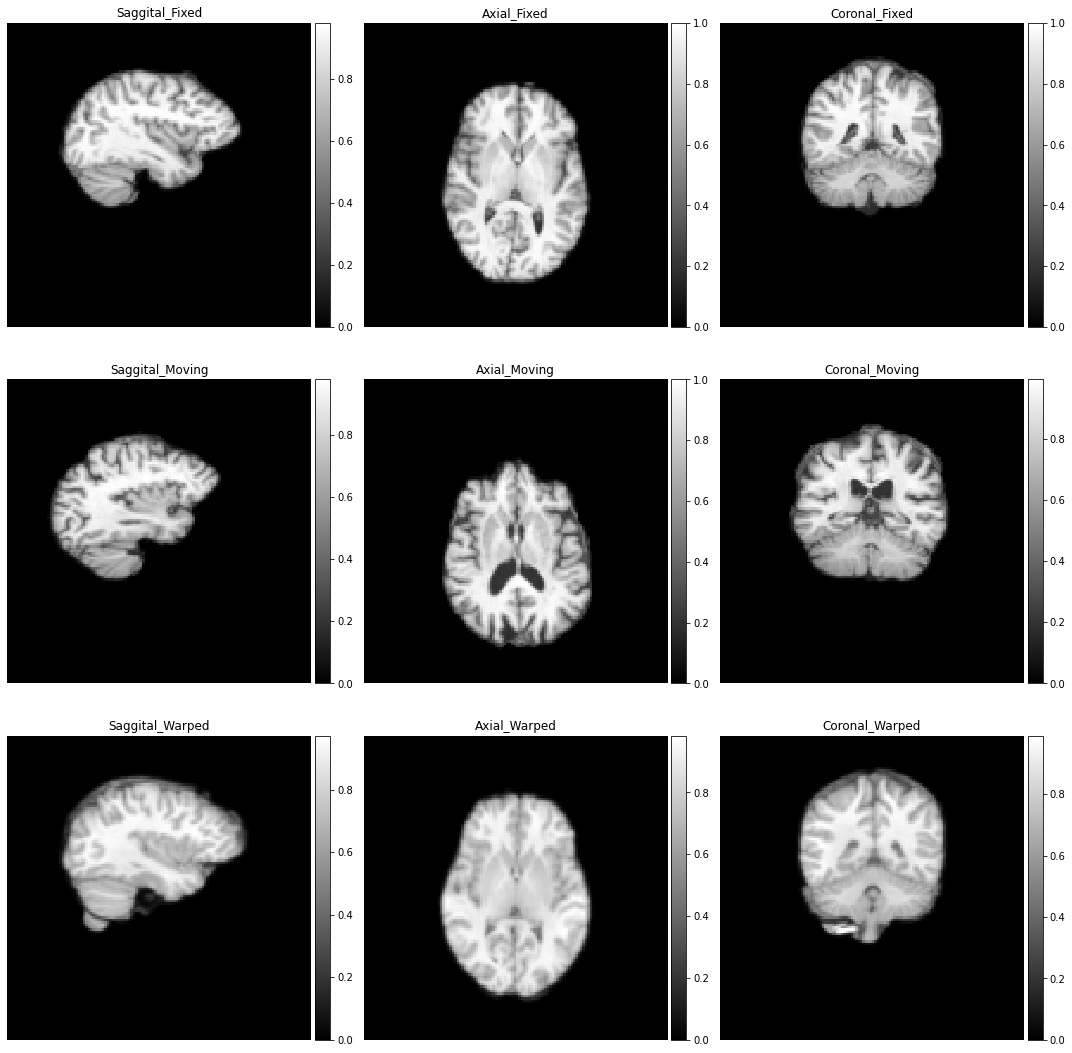

(<Figure size 1080x1080 with 18 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86311de390>,
       dtype=object))

In [ ]:
mid_slices_fixed = [np.take(mynb_np1, 47, axis=d) for d in range(3)]
mid_slices_fixed[1] = np.rot90(mid_slices_fixed[1], 1)
mid_slices_fixed[2] = np.rot90(mid_slices_fixed[2], -1)

mid_slices_moving = [np.take(mynb_np2, 47, axis=d) for d in range(3)]
mid_slices_moving[1] = np.rot90(mid_slices_moving[1], 1)
mid_slices_moving[2] = np.rot90(mid_slices_moving[2], -1)

mid_slices_pred = [np.take(warped_img_np, 47, axis=d) for d in range(3)]
mid_slices_pred[1] = np.rot90(mid_slices_pred[1], 1)
mid_slices_pred[2] = np.rot90(mid_slices_pred[2], -1)
ne.plot.slices(mid_slices_fixed + mid_slices_moving + mid_slices_pred, cmaps=['gray'], do_colorbars=True, grid=[3,3], titles=["Saggital_Fixed", "Axial_Fixed", "Coronal_Fixed", "Saggital_Moving", "Axial_Moving", "Coronal_Moving", "Saggital_Warped", "Axial_Warped", "Coronal_Warped"])

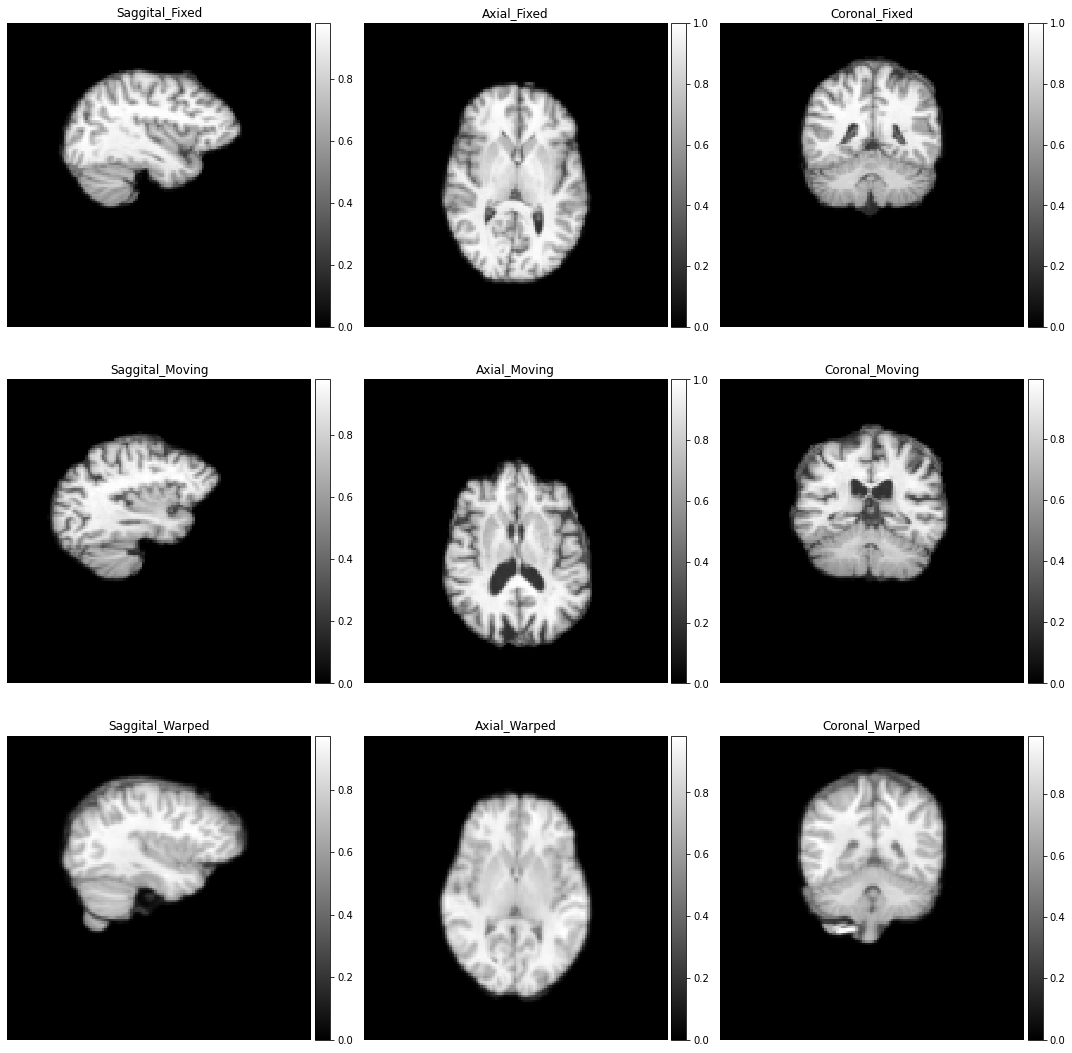

(<Figure size 1080x1080 with 18 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8632a81110>,
       dtype=object))

In [ ]:
mid_slices_fixed = [np.take(mynb_np1, 47, axis=d) for d in range(3)]
mid_slices_fixed[1] = np.rot90(mid_slices_fixed[1], 1)
mid_slices_fixed[2] = np.rot90(mid_slices_fixed[2], -1)

mid_slices_moving = [np.take(mynb_np2, 47, axis=d) for d in range(3)]
mid_slices_moving[1] = np.rot90(mid_slices_moving[1], 1)
mid_slices_moving[2] = np.rot90(mid_slices_moving[2], -1)

mid_slices_pred = [np.take(warped_img_np, 47, axis=d) for d in range(3)]
mid_slices_pred[1] = np.rot90(mid_slices_pred[1], 1)
mid_slices_pred[2] = np.rot90(mid_slices_pred[2], -1)
ne.plot.slices(mid_slices_fixed + mid_slices_moving + mid_slices_pred, cmaps=['gray'], do_colorbars=True, grid=[3,3], titles=["Saggital_Fixed", "Axial_Fixed", "Coronal_Fixed", "Saggital_Moving", "Axial_Moving", "Coronal_Moving", "Saggital_Warped", "Axial_Warped", "Coronal_Warped"])

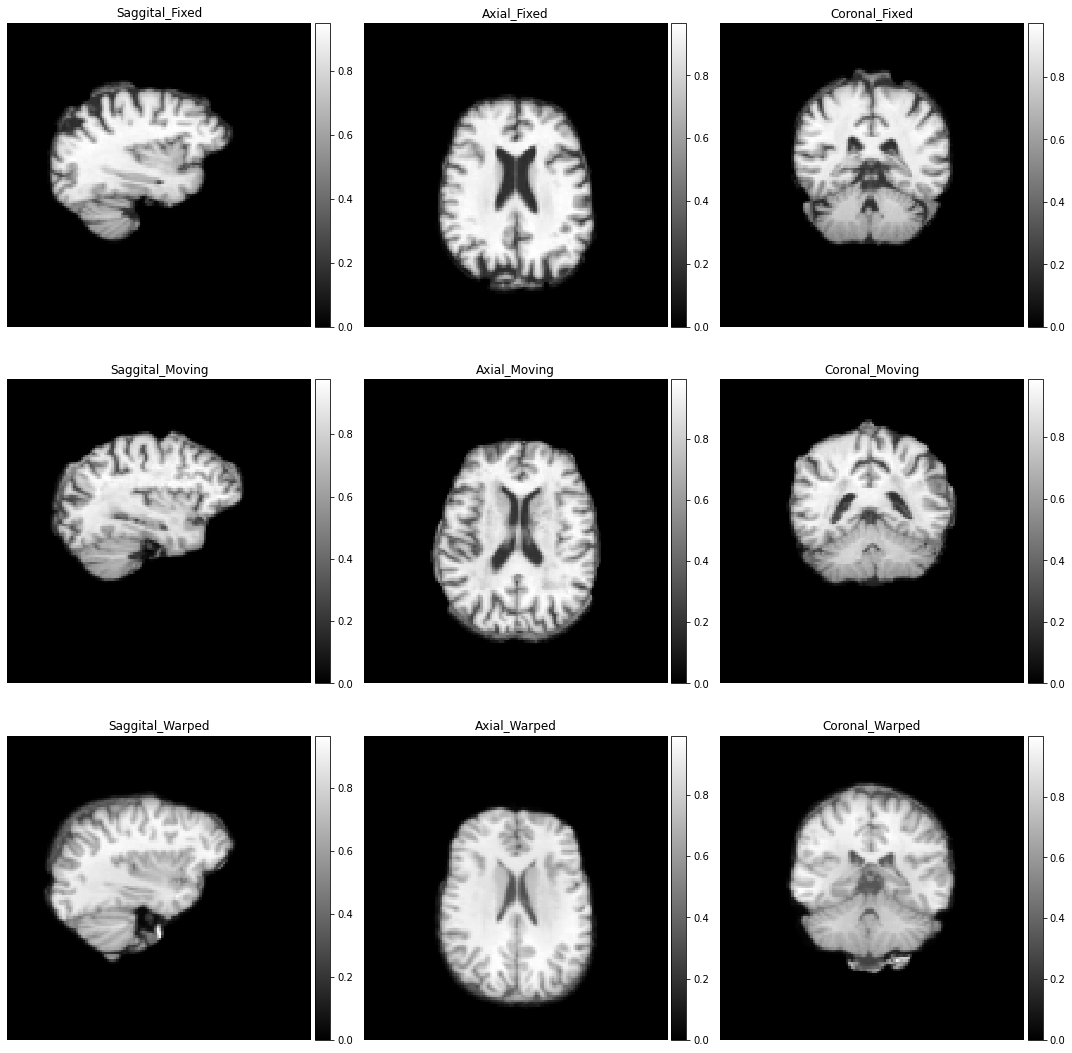

(<Figure size 1080x1080 with 18 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdad909e90>,
       dtype=object))

In [ ]:
mid_slices_fixed = [np.take(mynb_np1, 47, axis=d) for d in range(3)]
mid_slices_fixed[1] = np.rot90(mid_slices_fixed[1], 1)
mid_slices_fixed[2] = np.rot90(mid_slices_fixed[2], -1)

mid_slices_moving = [np.take(mynb_np2, 47, axis=d) for d in range(3)]
mid_slices_moving[1] = np.rot90(mid_slices_moving[1], 1)
mid_slices_moving[2] = np.rot90(mid_slices_moving[2], -1)

mid_slices_pred = [np.take(warped_img_np, 47, axis=d) for d in range(3)]
mid_slices_pred[1] = np.rot90(mid_slices_pred[1], 1)
mid_slices_pred[2] = np.rot90(mid_slices_pred[2], -1)
ne.plot.slices(mid_slices_fixed + mid_slices_moving + mid_slices_pred, cmaps=['gray'], do_colorbars=True, grid=[3,3], titles=["Saggital_Fixed", "Axial_Fixed", "Coronal_Fixed", "Saggital_Moving", "Axial_Moving", "Coronal_Moving", "Saggital_Warped", "Axial_Warped", "Coronal_Warped"])

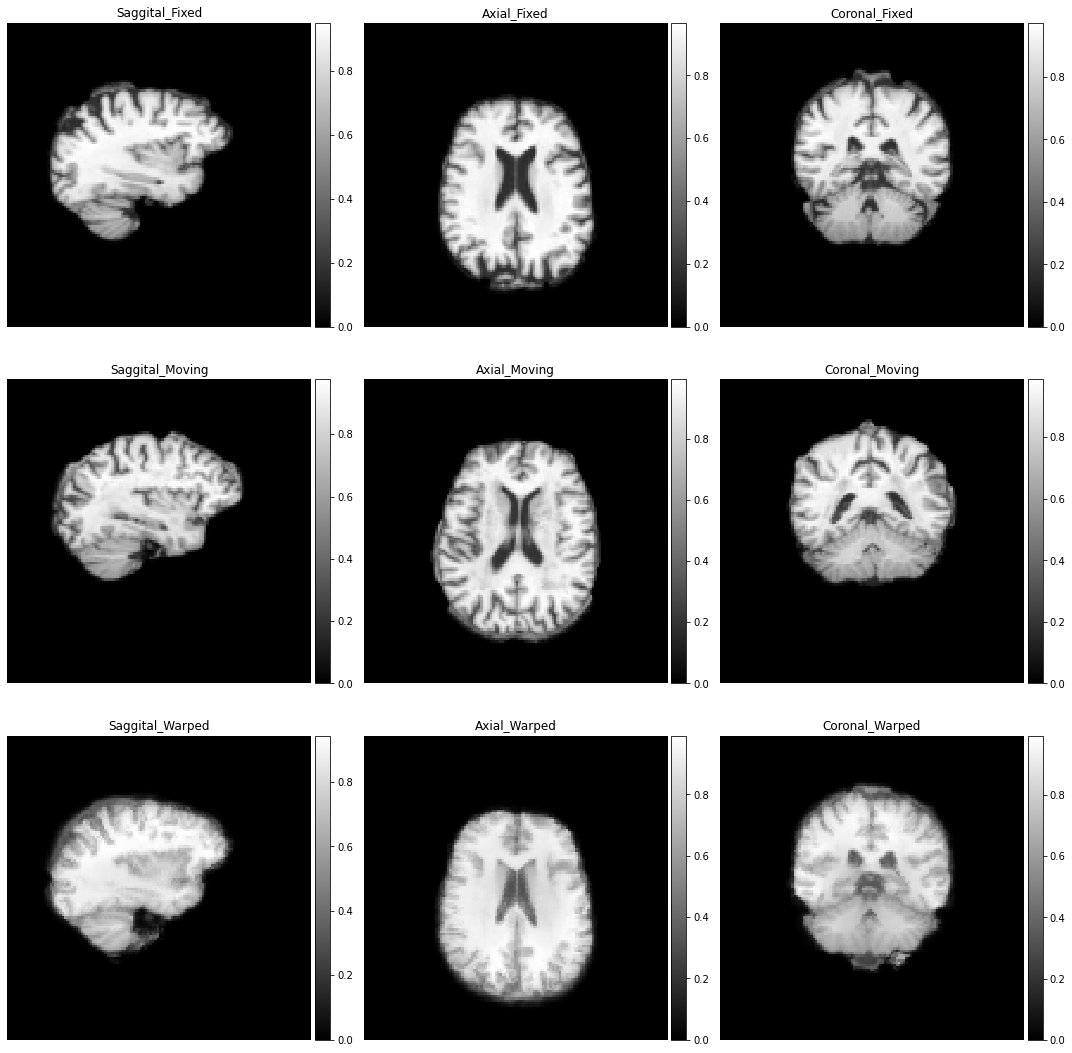

(<Figure size 1080x1080 with 18 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7096e9e490>,
       dtype=object))

In [ ]:
mid_slices_fixed = [np.take(mynb_np1, 47, axis=d) for d in range(3)]
mid_slices_fixed[1] = np.rot90(mid_slices_fixed[1], 1)
mid_slices_fixed[2] = np.rot90(mid_slices_fixed[2], -1)

mid_slices_moving = [np.take(mynb_np2, 47, axis=d) for d in range(3)]
mid_slices_moving[1] = np.rot90(mid_slices_moving[1], 1)
mid_slices_moving[2] = np.rot90(mid_slices_moving[2], -1)

mid_slices_pred = [np.take(warped_img_np, 47, axis=d) for d in range(3)]
mid_slices_pred[1] = np.rot90(mid_slices_pred[1], 1)
mid_slices_pred[2] = np.rot90(mid_slices_pred[2], -1)
ne.plot.slices(mid_slices_fixed + mid_slices_moving + mid_slices_pred, cmaps=['gray'], do_colorbars=True, grid=[3,3], titles=["Saggital_Fixed", "Axial_Fixed", "Coronal_Fixed", "Saggital_Moving", "Axial_Moving", "Coronal_Moving", "Saggital_Warped", "Axial_Warped", "Coronal_Warped"])

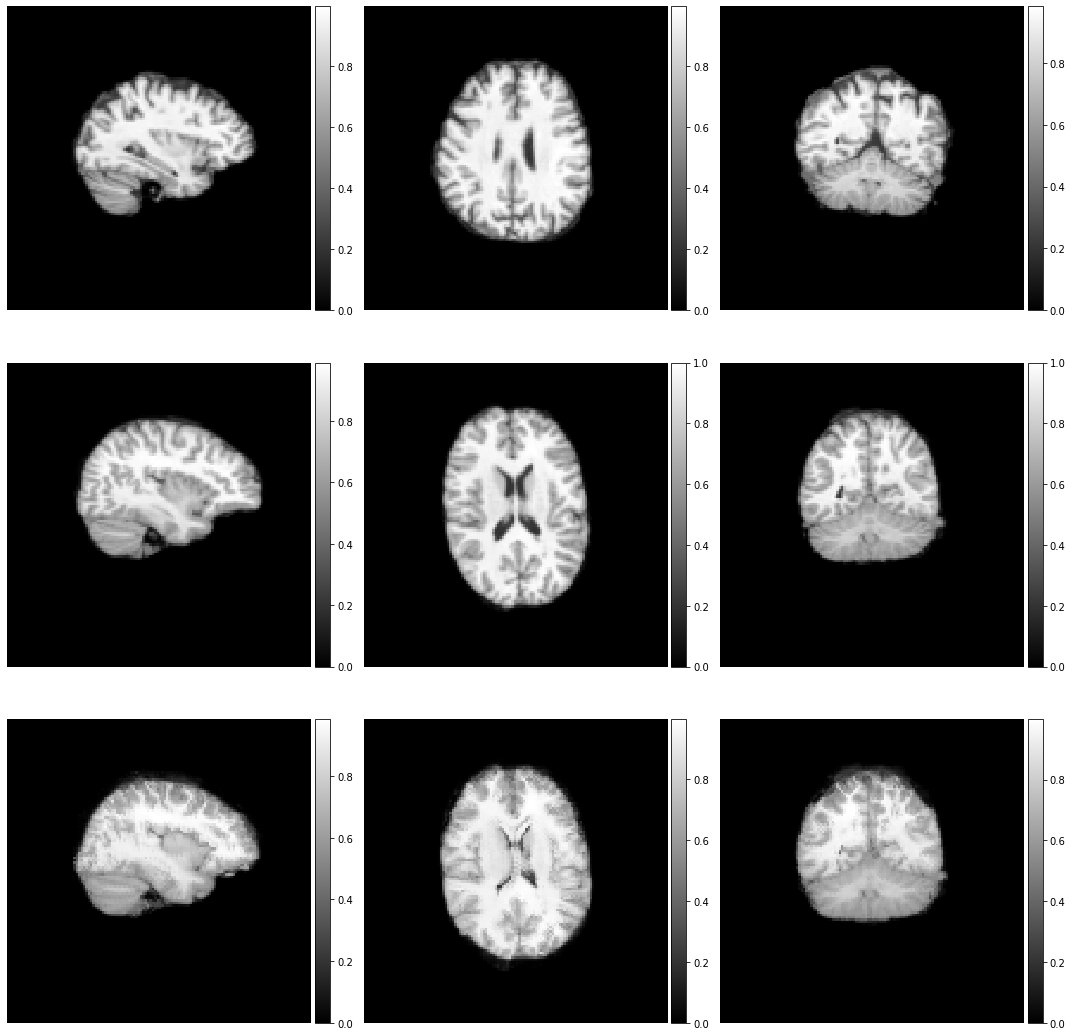

In [ ]:
mid_slices_fixed = [np.take(mynb_np1, 47, axis=d) for d in range(3)]
mid_slices_fixed[1] = np.rot90(mid_slices_fixed[1], 1)
mid_slices_fixed[2] = np.rot90(mid_slices_fixed[2], -1)

mid_slices_moving = [np.take(mynb_np2, 47, axis=d) for d in range(3)]
mid_slices_moving[1] = np.rot90(mid_slices_moving[1], 1)
mid_slices_moving[2] = np.rot90(mid_slices_moving[2], -1)

mid_slices_pred = [np.take(warped_img_np, 47, axis=d) for d in range(3)]
mid_slices_pred[1] = np.rot90(mid_slices_pred[1], 1)
mid_slices_pred[2] = np.rot90(mid_slices_pred[2], -1)
ne.plot.slices(mid_slices_fixed + mid_slices_moving + mid_slices_pred, cmaps=['gray'], do_colorbars=True, grid=[3,3]);

# New Section - don't run this

In [ ]:
# with wandb.init(project="Image_Registration", config=config):

#   epochs = 151
#   a = []
#   b = []
#   c = []
#   start_time = time.time()
#   # wandb.watch(complete_model, criterion=NormalizedCrossCorrelation(), log="all", log_freq=10)
#   for e in range(epochs):
#     m,n,o = fullmodel_one_epoch_run(epoch=e+5)
#     a.append(m)
#     b.append(n)
#     c.append(o)

#   end_time = time.time()
#   print("Total time taken: {} minutes".format((end_time-start_time)/60.0))

In [ ]:
# feature_extractor_training = Feature_Extractor3(2,3,16).to("cuda")

# scg_training = SCG_block(in_ch=32, hidden_ch=9, node_size=(4, 4, 4)).to("cuda")

# #upsampler1_training = Upsampler_net2(32).to("cuda")

# #upsampler2_training = Upsampler_net2(8).to("cuda")

# # upsampler1_training = Upsampler_net3(8, 4, 9, 9).to("cuda")

# # upsampler2_training = Upsampler_net3(8, 3, 9, 3).to("cuda")

# # upsampler3_training = Upsampler_net3(8, 2, 9, 9).to("cuda")

# # upsampler4_training = Upsampler_net3(8, 1, 9, 3).to("cuda")

# # upsampler1_training = Upsampler_net5(8, 4, 9, 32).to("cuda")

# # upsampler2_training = Upsampler_net5(8, 3, 32, 16).to("cuda")

# # upsampler3_training = Upsampler_net5(8, 2, 16, 8).to("cuda")

# # upsampler4_training = Upsampler_net5(8, 1, 8, 3).to("cuda")

# upsampler1_training = Upsampler_net6(32, 32, 32).to("cuda")

# upsampler2_training = Upsampler_net6(32, 32, 32).to("cuda")

# upsampler3_training = Upsampler_net6(32, 32, 32).to("cuda")

# upsampler4_training = Upsampler_net6(32, 32, 32).to("cuda")

# upsampler5_training = Upsampler_net6(32, 32, 32).to("cuda")

# upsampler6_training = Upsampler_net6(16, 32, 32).to("cuda")

# # ------------------------------------

# conv_decoder1_training = Upsampler_net4(32, 16).to("cuda")

# conv_decoder2_training = Upsampler_net4(16, 16).to("cuda")

# conv_decoder3_training = Upsampler_net4(16, 3).to("cuda")

# # conv_decoder4_training = Upsampler_net4(32, 32).to("cuda")

# # conv_decoder5_training = Upsampler_net4(32, 32).to("cuda")

# # conv_decoder6_training = Upsampler_net4(32, 32).to("cuda")

# graph_layers1_training = GCN_Layer(32, 16, bnorm=True, activation=nn.LeakyReLU(0.2), dropout=0.1).to("cuda")

# graph_layers2_training = GCN_Layer(16, 9, bnorm=True, activation=nn.LeakyReLU(0.2), dropout=0.1).to("cuda")

# # graph_gcn_model_training = GCN()

# stn_deformable = SpatialTransformer(size=(128, 128, 128), is_affine=False).to("cuda")

# weight_xavier_init(graph_layers1_training, graph_layers2_training, scg_training)

# # deformation_output_training = DeformationField(3, 3).to("cuda")

# # complete_model = (feature_extractor_training, scg_training, upsampler1_training, conv_decoder1_training, upsampler2_training, conv_decoder2_training ,
# #                   upsampler3_training, conv_decoder3_training, graph_layers1_training, graph_layers2_training)


# for param in stn_deformable.parameters():
#   param.requires_grad = False
#   param.volatile=True


# # Suraj adding vector integrion code, this enforces diffeomorphic transform
# resize = ResizeTransform(2, 3).to("cuda")
# fullsize = ResizeTransform(0.5, 3).to("cuda")
# integrate = VecInt(down_shape, 7).to("cuda")
# down_shape = [int(3 / 2) for dim in (128, 128, 128)]

In [ ]:
# def fullmodel_one_epoch_run(epoch=1):
#   example_number = 0
#   cc_loss_lst = []
#   smoothness_loss_lst = []
#   scg_loss_lst = []
#   total_loss_lst = []
#   for X,Y in training_generator:

#     X = X.float().to("cuda")
#     Y = Y.float().to("cuda")

#     x_size = X.size()

#     enc_1, enc_2, enc_3, enc_4 = feature_extractor_training(X, Y)
#     #print(feature_extractor_op.shape)
#     #print()

#     A, gx, scg_loss, z_hat = scg_training(enc_4)
    
#     B, C, H, W, D = enc_4.size()
#     #print(A.shape, gx.shape, loss.shape, z_hat.shape, gx.reshape(B, -1, C).shape)
#     #print(loss)
#     #print()

#     gop_layers1, A_layers1 = graph_layers1_training((gx.reshape(B, -1, C), A))
#     #print(gop_layers1.shape, A_layers1.shape)
#     #print()
    
#     gop_layers2, A_layers2 = graph_layers2_training((gop_layers1, A_layers1))
#     #print(gop_layers2.shape, A_layers2.shape)

#     #gop_layers3, A_layers3 = graph_layers3_training((gop_layers2, A_layers2))

#     gop_layers2 = torch.bmm(A_layers2,gop_layers2)

#     gop_layers2 = gop_layers2 + z_hat


#     # # Suraj added the gaph neural network part

#     # x0 = torch.randn(size=( 4096, 1))
#     # x1 = torch.randn(size=( 4096, 1))
#     # x2 = torch.randn(size=( 4096, 1))
#     # x3 = torch.randn(size=( 4096, 1))
#     # x4 = torch.randn(size=( 4096, 1))


#     # topk_mat, topk_ind = torch.topk(A, k = 10, dim = -1)

#     # interim1 = torch.repeat_interleave(topk_ind, 2, dim=2)
#     # interim2 = torch.repeat_interleave(topk_ind, 2, dim=2)
#     # nodetnsr = torch.unsqueeze(torch.from_numpy(np.arange(start=0, stop=4096)), 1)
#     # nodetnsr_interim = torch.repeat_interleave(nodetnsr, 10, dim=1)


#     # interim3 = torch.unsqueeze( torch.flatten(interim1, start_dim=1, end_dim=-1), 1)
#     # interim4 = torch.unsqueeze( torch.flatten(interim2, start_dim=1, end_dim=-1), 1)
#     # edge_index = torch.cat([interim3, interim4], dim=1)

    
#     # edge_index0 = edge_index[0, :, :]
#     # edge_index1 = edge_index[1, :, :]
#     # edge_index2 = edge_index[2, :, :]
#     # edge_index3 = edge_index[3, :, :]
#     # edge_index4 = edge_index[4, :, :]

#     # data0 = Data(x=x0, edge_index=edge_index0)
#     # data1 = Data(x=x1, edge_index=edge_index1)
#     # data2 = Data(x=x2, edge_index=edge_index2)
#     # data3 = Data(x=x3, edge_index=edge_index3)
#     # data4 = Data(x=x4, edge_index=edge_index4)

#     # _, h0 = model(data0.x, data0.edge_index)
#     # _, h1 = model(data1.x, data1.edge_index)
#     # _, h2 = model(data2.x, data2.edge_index)
#     # _, h3 = model(data3.x, data3.edge_index)
#     # _, h4 = model(data4.x, data4.edge_index)

#     # graph_model_op = torch.cat([torch.unsqueeze(h0, dim=0), torch.unsqueeze(h1, dim=0), torch.unsqueeze(h2, dim=0), torch.unsqueeze(h3, dim=0), torch.unsqueeze(h4, dim=0)], dim=0)


#     # Upward trajectory

#     gx = gop_layers2.reshape(B, 9, 16, 16, 16)

#     gx = F.interpolate(gx, (H, W, D), mode='trilinear', align_corners=False)
#     #print(gx.shape)

#     # Adding information from feature extractor directly to latent space info, this could provide a path for gradients to move faster
#     gx = upsampler1_training(gx, enc_4)
#     gx = conv_decoder1_training(gx)
#     #print(gx.shape)

#     #gx = F.interpolate(gx, (64, 64, 64), mode='trilinear', align_corners=False)

#     gx = upsampler2_training(gx, enc_3)
#     gx = conv_decoder2_training(gx)

#     gx = upsampler3_training(gx, enc_2)
#     gx = conv_decoder3_training(gx)
#     gx = conv_decoder4_training(gx)


#     # Suraj Added two extra layers
#     gx = conv_decoder5_training(torch.cat((enc_1, gx), dim=1))
#     dvf = conv_decoder6_training(gx)

#     #print(gx.shape)

#     ## Suraj newly added last layer

#     # dvf = deformation_output_training(dvf)

#     #gx = F.interpolate(gx, x_size[2:], mode='trilinear', align_corners=False)

#     #dvf = upsampler4_training(gx, enc_1)
#     #print(dvf.shape)

#     # Suraj adding vector integration for diffeomorphic field

#     pos_flow = resize(dvf)
#     integrated_pos_flow = integrate(pos_flow)
#     full_flow = fullsize(integrated_pos_flow)



#     # ===============

#     fully_warped_image =  stn_deformable(Y, full_flow)

#     # X1 = X[:,:,0:64, 0:64, 0:64].clone()
#     # FP1 = fully_warped_image[:, :,0:64, 0:64, 0:64 ].clone()

#     # X2 = X[:,:,0:64, 0:64, 64:128].clone()
#     # FP2 = fully_warped_image[:, :,0:64, 0:64, 64:128 ].clone()

#     # X3 = X[:,:,0:64, 64:128, 0:64].clone()
#     # FP3 = fully_warped_image[:, :,0:64, 64:128, 0:64 ].clone()

#     # X4 = X[:,:, 0:64, 64:128, 64:128].clone()
#     # FP4 = fully_warped_image[:, :, 0:64, 64:128, 64:128 ].clone()

#     # X5 = X[:,:,64:128, 0:64, 0:64].clone()
#     # FP5 = fully_warped_image[:, :,64:128, 0:64, 0:64 ].clone()

#     # X6 = X[:,:,64:128, 0:64, 64:128].clone()
#     # FP6 = fully_warped_image[:, :,64:128, 0:64, 64:128 ].clone()

#     # X7 = X[:,:,64:128, 64:128, 0:64].clone()
#     # FP7 = fully_warped_image[:, :,64:128, 64:128, 0:64 ].clone()

#     # X8 = X[:,:,64:128, 64:128, 64:128].clone()
#     # FP8 = fully_warped_image[:, :,64:128, 64:128, 64:128 ].clone()

#     # cc_loss1 = torch.mean(similarity_loss.loss(X1, FP1))
#     # cc_loss2 = torch.mean(similarity_loss.loss(X2, FP2))
#     # cc_loss3 = torch.mean(similarity_loss.loss(X3, FP3))
#     # cc_loss4 = torch.mean(similarity_loss.loss(X4, FP4))
#     # cc_loss5 = torch.mean(similarity_loss.loss(X5, FP5))
#     # cc_loss6 = torch.mean(similarity_loss.loss(X6, FP6))
#     # cc_loss7 = torch.mean(similarity_loss.loss(X7, FP7))
#     # cc_loss8 = torch.mean(similarity_loss.loss(X8, FP8))
    
#     # cc_loss = cc_loss1 + cc_loss2 + cc_loss3 + cc_loss4 + cc_loss5 + cc_loss6 + cc_loss7 + cc_loss8
#     # print(cc_loss)
#     # cc_loss = torch.from_numpy(cc_loss_tf.numpy()).mean().to("cuda")

#     cc_loss = similarity_loss(X, fully_warped_image)
#     sm_loss = smoothness_loss(full_flow)
#     # print(sm_loss)

#     total_loss = hyperparam1 * cc_loss + hyperparam2 * scg_loss + hyperparam3 * sm_loss

#     optimizer.zero_grad()          
#     total_loss.backward() 
#     optimizer.step()

#     cc_loss_lst.append(cc_loss.detach().cpu().numpy().item())
#     smoothness_loss_lst.append(sm_loss.detach().cpu().numpy().item())
#     scg_loss_lst.append(scg_loss.detach().cpu().numpy().item())
#     total_loss_lst.append(total_loss.detach().cpu().numpy().item())
#     #print("============= =============== ===========")

#     del X, Y, enc_1, enc_2, enc_3, enc_4, A, gx, z_hat, gop_layers1, A_layers1, gop_layers2, A_layers2, dvf, fully_warped_image, full_flow, integrated_pos_flow, pos_flow
#     # del X1, X2, X3, X4, X5, X6, X7, X8, FP1, FP2, FP3, FP4, FP5, FP6, FP7, FP8
#     torch.cuda.empty_cache() 
   
#     example_number = example_number + 1
    


#   if (epoch%5 == 0):
#     modelname = model_dir + '/' + "scgnet_upsampling_concat_deconv_new3_" + str(epoch) + '.pth'
#     torch.save({"feature_extractor_training": feature_extractor_training.state_dict(), "scg_training": scg_training.state_dict(), 
#                 "upsampler1_training": upsampler1_training.state_dict(), "upsampler2_training": upsampler2_training.state_dict(),
#                 "upsampler3_training": upsampler3_training.state_dict(), "upsampler4_training": upsampler4_training.state_dict(), 
#                 "graph_layers1_training": graph_layers1_training.state_dict(), "graph_layers2_training": graph_layers2_training.state_dict(),
#                 "conv_decoder1_training": conv_decoder1_training.state_dict(), "conv_decoder2_training": conv_decoder2_training.state_dict(),
#                 "conv_decoder3_training": conv_decoder3_training.state_dict(), "conv_decoder4_training": conv_decoder4_training.state_dict(),
#                 "conv_decoder5_training": conv_decoder5_training.state_dict(), "conv_decoder6_training": conv_decoder6_training.state_dict()}, modelname)
#     print("epoch: {}".format(epoch+0))
#     print("Losses: {}, {} {} and {}".format(cc_loss * hyperparam1, scg_loss * hyperparam2, hyperparam3 * sm_loss, total_loss))
#     print("Average Losses: {}, {} {}, {}".format(sum(cc_loss_lst)/len(cc_loss_lst), sum(abs(x) for x in smoothness_loss_lst)/len(smoothness_loss_lst) , 
#                                                  sum(abs(x) for x in scg_loss_lst)/len(scg_loss_lst), sum(total_loss_lst)/len(total_loss_lst) ) )
#     print("Saving model checkpoints")
#     print("======= =============== ===========")
#     print()
  
#   elif (epoch%2 == 0):
#     print("epoch: {}".format(epoch))
#     print("Losses: {}, {} {} and {}".format(cc_loss * hyperparam1, scg_loss * hyperparam2, hyperparam3 * sm_loss, total_loss))
#     print("Average Losses: {}, {} {}, {}".format(sum(cc_loss_lst)/len(cc_loss_lst), sum(abs(x) for x in smoothness_loss_lst)/len(smoothness_loss_lst) , 
#                                                  sum(abs(x) for x in scg_loss_lst)/len(scg_loss_lst), sum(total_loss_lst)/len(total_loss_lst) ) )
#     print("======= =============== ===========")
#     print()

  
#   wandb.log({"epoch": epoch, "total_loss": sum(total_loss_lst)/len(total_loss_lst), "cross_corelation_loss": sum(cc_loss_lst)/len(cc_loss_lst), 
#              "smoothness_loss": sum(smoothness_loss_lst)/len(smoothness_loss_lst), "scg_loss": sum(scg_loss_lst)/len(scg_loss_lst)  })
  
  
#   return cc_loss_lst, smoothness_loss_lst, scg_loss_lst

# New Section - dont run this

In [ ]:
with wandb.init(project="Image_Registration", config=config):

  epochs = 1
  a = []
  b = []
  c = []
  start_time = time.time()
  # wandb.watch(complete_model, criterion=NormalizedCrossCorrelation(), log="all", log_freq=10)
  for e in range(epochs):
    m,n,o = fullmodel_one_epoch_run(epoch=e+80)
    a.append(m)
    b.append(n)
    c.append(o)


  end_time = time.time()
  print("Total time taken: {} minutes".format((end_time-start_time)/60.0))

epoch: 80
Losses: -1.6142075061798096, 0.0019702573772519827 0.03358715400099754 and -1.5786501169204712
Average Losses: 0.818850343877619, 70.88795817982067 2.891106208835481e-05, -1.599365613677285
Saving model checkpoints
======= =============== ===========

epoch: 82
Losses: -1.6165268421173096, 0.00018635619198903441 0.03596433624625206 and -1.580376148223877
Average Losses: 0.8190513415770098, 70.5373965176669 2.8480076356241955e-06, -1.6025491844524036
======= =============== ===========

epoch: 84
Losses: -1.615259051322937, 7.264032319653779e-05 0.03417884185910225 and -1.5810075998306274
Average Losses: 0.8191303014755249, 70.53943980823864 8.214464731860393e-07, -1.6029087196696887
======= =============== ===========

epoch: 86
Losses: -1.615785002708435, 5.636968489852734e-05 0.034553155303001404 and -1.581175446510315
Average Losses: 0.8193759322166443, 70.97511638294567 5.561601390333883e-07, -1.6032086610794067
======= =============== ===========

epoch: 88
Losses: -1.61

In [ ]:
with wandb.init(project="Image_Registration", config=config):

  epochs = 101
  a = []
  b = []
  c = []
  start_time = time.time()
  # wandb.watch(complete_model, criterion=NormalizedCrossCorrelation(), log="all", log_freq=10)
  for e in range(epochs):
    m,n,o = fullmodel_one_epoch_run(epoch=e+0)
    a.append(m)
    b.append(n)
    c.append(o)


  end_time = time.time()
  print("Total time taken: {} minutes".format((end_time-start_time)/60.0))

epoch: 0
Losses: -1.6465455293655396, 0.016104958951473236 0.009137487038969994 and -1.6213030815124512
Average Losses: 0.7999833027521769, 22.852266947428387 0.00025480391923338175, -1.5630600651105244
Saving model checkpoints
======= =============== ===========

epoch: 2
Losses: -1.5678448677062988, 0.004449463915079832 0.007652986329048872 and -1.5557423830032349
Average Losses: 0.807553360859553, 19.545079390207928 5.8402481348214984e-05, -1.599493940671285
======= =============== ===========

epoch: 4
Losses: -1.5255324840545654, 0.0012316819047555327 0.005318650975823402 and -1.518982172012329
Average Losses: 0.8092117806275686, 14.628658294677734 1.5676823598672247e-05, -1.6095415552457173
======= =============== ===========

epoch: 6
Losses: -1.6701395511627197, 0.0006314391503110528 0.002643761457875371 and -1.6668643951416016
Average Losses: 0.82070920864741, 6.412708838780721 6.948269250036295e-06, -1.637517253557841
======= =============== ===========

epoch: 8
Losses: -1.6

epoch,100
total_loss,-1.58099
cross_corelation_loss,0.7915
smoothness_loss,3.94166
scg_loss,0.0
_runtime,4613
_timestamp,1628591341
_step,100


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
total_loss,▇▆▆▆▄▇▁▃▃▄▆▅▇▃▅▅▆▅▅█▅▆▅▅▅▄▄▃▄▅▄▅▅▄▂▆▅█▅▇
cross_corelation_loss,▃▄▃▃▅▂█▆▆▅▃▄▂▆▄▄▃▄▄▁▄▃▄▄▄▅▅▆▅▄▅▄▄▅▇▃▄▁▄▃
smoothness_loss,█▇▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂
scg_loss,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


In [ ]:
with wandb.init(project="Image_Registration", config=config):

  epochs = 61
  a = []
  b = []
  c = []
  start_time = time.time()
  # wandb.watch(complete_model, criterion=NormalizedCrossCorrelation(), log="all", log_freq=10)
  for e in range(epochs):
    m,n,o = fullmodel_one_epoch_run(epoch=e+120)
    a.append(m)
    b.append(n)
    c.append(o)


  end_time = time.time()
  print("Total time taken: {} minutes".format((end_time-start_time)/60.0))

epoch: 120
Losses: -1.747101068496704, 0.0001405335933668539 0.04756568372249603 and -1.6993948221206665
Average Losses: 0.8689960738023123, 116.94094721476237 3.1811902185078602e-06, -1.6792035698890686
Saving model checkpoints
======= =============== ===========

epoch: 122
Losses: -1.5394281148910522, 9.657778718974441e-05 0.05001956969499588 and -1.489311933517456
Average Losses: 0.8725109497706095, 116.86839803059895 1.249961542271194e-06, -1.686462660630544
======= =============== ===========

epoch: 124
Losses: -1.6433000564575195, 6.925979687366635e-05 0.046988412737846375 and -1.5962424278259277
Average Losses: 0.881778359413147, 116.76393254597981 6.864167498103294e-07, -1.7051060795783997
======= =============== ===========

epoch: 126
Losses: -1.835864782333374, 5.206822606851347e-05 0.04794580861926079 and -1.7878668308258057
Average Losses: 0.8944761256376902, 117.87158838907878 4.809217747000124e-07, -1.7299683491388957
======= =============== ===========

epoch: 128
Los

epoch,180
total_loss,-1.66444
cross_corelation_loss,0.86242
smoothness_loss,120.68408
scg_loss,0.0
_runtime,1782
_timestamp,1624260098
_step,60


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
total_loss,▇▄▃▅▄▃▄▂▃▇▁▅▄▄▅▇▅▇▃▄▆▅▃▄▅█▁▆▄▅▇▅▇▃▅▇▇▂▄█
cross_corelation_loss,▂▅▆▃▅▆▅▇▆▂█▄▅▅▄▂▄▁▆▅▃▄▆▅▄▁█▃▅▄▂▄▂▆▄▂▂▇▅▁
smoothness_loss,▃▃▄▃▄▂▃▂▁▄▁▂▂▃▂▂▄▄▃▂▂▅▅▃▂▄▂▃▅▃▃▆▆▅▆▄██▇▇
scg_loss,█▅▂▂▁▁▁▁▁▁▁▁▁▁▂▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███


In [ ]:
with wandb.init(project="Image_Registration", config=config):

  epochs = 61
  a = []
  b = []
  c = []
  start_time = time.time()
  # wandb.watch(complete_model, criterion=NormalizedCrossCorrelation(), log="all", log_freq=10)
  for e in range(epochs):
    m,n,o = fullmodel_one_epoch_run(epoch=e)
    a.append(m)
    b.append(n)
    c.append(o)


  end_time = time.time()
  print("Total time taken: {}".format(end_time-start_time))

In [ ]:
with wandb.init(project="Image_Registration", config=config):

  epochs = 61
  a = []
  b = []
  c = []
  start_time = time.time()
  # wandb.watch(complete_model, criterion=NormalizedCrossCorrelation(), log="all", log_freq=10)
  for e in range(epochs):
    m,n,o = fullmodel_one_epoch_run(epoch=e+60)
    a.append(m)
    b.append(n)
    c.append(o)


  end_time = time.time()
  print("Total time taken: {}".format(end_time-start_time))

epoch: 60
Losses: -1.790085792541504, 6.264969852054492e-05 0.05216081812977791 and -1.737862229347229
Average Losses: 0.8873660683631897, 113.59989807128906 6.571385006282071e-07, -1.7178664779663086
Saving model checkpoints
======= =============== ===========

epoch: 62
Losses: -1.6545863151550293, 6.816694076405838e-05 0.05448164418339729 and -1.6000365018844604
Average Losses: 0.8855120730400086, 113.41572601318359 7.118962571439625e-07, -1.7142450904846191
======= =============== ===========

epoch: 64
Losses: -1.702443242073059, 5.916224836255424e-05 0.05251898244023323 and -1.6498651504516602
Average Losses: 0.8905419850349426, 113.60488067626953 6.38052144950052e-07, -1.7242177295684815
======= =============== ===========

epoch: 66
Losses: -1.7507612705230713, 6.0379614296834916e-05 0.053180526942014694 and -1.6975202560424805
Average Losses: 0.8783359026908875, 115.87291229248046 6.488268240900652e-07, -1.6986704540252686
======= =============== ===========

epoch: 68
Losses:

epoch,120
total_loss,-1.72977
cross_corelation_loss,0.89379
smoothness_loss,115.47291
scg_loss,0.0
_runtime,7663
_timestamp,1624191778
_step,60


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
total_loss,▅▆▅▄█▆▂█▅▄▅▄▅▄▄▆▄▅▇▆▃▅▄▆▄▃▅▅▄▂▅▃▃▅▃▂▁▅▅▄
cross_corelation_loss,▄▃▄▄▁▂▇▁▄▅▄▅▄▅▅▃▅▄▂▃▆▅▅▃▅▆▄▄▅▇▄▅▆▃▆▇█▄▄▅
smoothness_loss,▂▁▂▂▆▂▄▅▄▃▃▄▄▄▃▅▅▆▅▇▅▇▅▆▅▄▅▅▆▅█▄▅▅▆▄▄▄▇▅
scg_loss,▆▆▆▅▅▅▅▄▄▄▆▆▅▄▄▆▅▆▆▄▃▅▄▄▃█▃▂▁▂▄▃▂▁▁▂▄▂▃▆
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███


# SCG with Graph Concatenation - Training

Dont run this

In [ ]:
print "this"

In [ ]:
print "this"
feature_extractor_training = Feature_Extractor2(1, 8).to("cuda")

scg_training = SCG_block(in_ch=64, hidden_ch=9, node_size=(16, 16, 16)).to("cuda")

#upsampler1_training = Upsampler_net2(32).to("cuda")

#upsampler2_training = Upsampler_net2(8).to("cuda")

upsampler1_training = Upsampler_net4(9, 6).to("cuda")

upsampler2_training = Upsampler_net4(6, 3).to("cuda")

graph_layers1_training = GCN_Layer(64, 16, bnorm=True, activation=nn.LeakyReLU(0.2), dropout=0.1).to("cuda")

graph_layers2_training = GCN_Layer(16, 9, bnorm=True, activation=nn.LeakyReLU(0.2), dropout=0.1).to("cuda")

stn_deformable = SpatialTransformer(size=(128, 128, 128), is_affine=False).to("cuda")

weight_xavier_init(graph_layers1_training, graph_layers2_training, scg_training)

for param in stn_deformable.parameters():
  param.requires_grad = False
  param.volatile=True

In [ ]:
similarity_loss = NormalizedCrossCorrelation().to("cuda")
smoothness_loss = Smoothnessloss().to("cuda")
lr=1e-4

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-80-7dd3ff7c4616>", line 1, in <module>
    similarity_loss = NormalizedCrossCorrelation().to("cuda")
NameError: name 'NormalizedCrossCorrelation' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/loc

NameError: ignored

In [ ]:
optimizer = torch.optim.Adam( list( feature_extractor_training.parameters()) + list( scg_training.parameters() ) + 
                             list(upsampler1_training.parameters()) + list(upsampler2_training.parameters()) + 
                             list( graph_layers1_training.parameters()) + list( graph_layers2_training.parameters()), lr=lr ) 
model_dir = '/content/drive/MyDrive/Idl/scgnet_changed/'

if not os.path.isdir(model_dir):
  os.mkdir(model_dir)

In [ ]:
def fullmodel_one_epoch_run(epoch=1):
  example_number = 0
  cc_loss_lst = []
  smoothness_loss_lst = []
  scg_loss_lst = []
  for X,Y in training_generator:

    X = X.float().to("cuda")
    Y = Y.float().to("cuda")

    x_size = X.size()

    feature_extractor_op_fixed= feature_extractor_training(X)
    #print(feature_extractor_op_fixed.shape) #torch.Size([5, 32, 16, 16, 16]) -> batch_size, nr_channels, dimensions of image
    feature_extractor_op_moving = feature_extractor_training(Y)
    feature_extractor_op = torch.cat((feature_extractor_op_fixed, feature_extractor_op_moving), dim=1)
    #print(feature_extractor_op.shape) #torch.Size([5, 64, 16, 16, 16])
   

    A, gx, scg_loss, z_hat = scg_training(feature_extractor_op)
    #print(A.shape, gx.shape, scg_loss.shape, z_hat.shape) #torch.Size([5, 4096, 4096]) torch.Size([5, 64, 16, 16, 16]) torch.Size([]) torch.Size([5, 4096, 9])

    #gx  = torch.matmul(feature_extractor_op.reshape(5, 64, -1),A)

    
    B, C, H, W, D = feature_extractor_op.size()
    #print(A.shape, gx.shape, scg_loss.shape, z_hat.shape, gx.reshape(B, -1, C).shape)
    #print(loss)
    #print()
    #torch.Size([5, 4096, 4096]) torch.Size([5, 64, 16, 16, 16]) torch.Size([]) torch.Size([5, 4096, 9]) torch.Size([5, 4096, 64])

    gx = torch.bmm(A,feature_extractor_op.reshape(B, -1, C))
    

    gop_layers1, A_layers1 = graph_layers1_training((gx.reshape(B, -1, C), A))
    #print(gop_layers1.shape, A_layers1.shape)
    #print()
    
    gop_layers2, A_layers2 = graph_layers2_training((gop_layers1, A_layers1))
    #print(gop_layers2.shape, A_layers2.shape) #torch.Size([5, 4096, 9]) torch.Size([5, 4096, 4096])

    #gop_layers2 = torch.bmm(A_layers2,gop_layers2)
    

    #gop_layers2 = gop_layers2.reshape(5,4096,-1)


    #gop_layers3, A_layers3 = graph_layers3_training((gop_layers2, A_layers2))

    gop_layers2 = gop_layers2 + z_hat

    

    gx = gop_layers2.reshape(B, 9, 16, 16, 16)

    gx = F.interpolate(gx, (H, W, D), mode='trilinear', align_corners=False)
    #print(gx.shape)

    # Adding information from feature extractor directly to latent space info, this could provide a path for gradients to move faster
    gx = upsampler1_training(gx)

    gx = F.interpolate(gx, x_size[2:], mode='trilinear', align_corners=False)

    dvf = upsampler2_training(gx)


    #print(gx.shape)

    fully_warped_image =  stn_deformable(Y, dvf)

    cc_loss = similarity_loss(X, fully_warped_image)
    sm_loss = smoothness_loss(dvf)

    total_loss = -20.0 * cc_loss + 10.0 * scg_loss + 0.001 * sm_loss

    optimizer.zero_grad()          
    total_loss.backward() 
    optimizer.step()

    cc_loss_lst.append(cc_loss.detach().cpu().numpy().item())
    smoothness_loss_lst.append(sm_loss.detach().cpu().numpy().item())
    scg_loss_lst.append(scg_loss.detach().cpu().numpy().item())
    #print("============= =============== ===========")

    del X, Y, feature_extractor_op, feature_extractor_op_fixed, feature_extractor_op_moving, A, gx, z_hat, gop_layers1, A_layers1, A_layers2, gop_layers2,  dvf, fully_warped_image
    torch.cuda.empty_cache() 
   
    example_number = example_number + 1
    


  if (epoch%5 == 0):
    modelname = model_dir + '/' + "scgnet_concat_without_upsampling_v2_" + str(epoch+20) + '.pth'
    torch.save({"feature_extractor_training": feature_extractor_training.state_dict(), "scg_training": scg_training.state_dict(), "upsampler1_training": upsampler1_training.state_dict(),
                "upsampler2_training": upsampler2_training.state_dict(), "graph_layers1_training": graph_layers1_training.state_dict(), 
                "graph_layers2_training": graph_layers2_training.state_dict()}, modelname)
    print("epoch: {}".format(epoch+0))
    print("Losses: {}, {} {} and {}".format(cc_loss * -1.0, scg_loss * 10.0, 0.001 * sm_loss, total_loss))
    print("Average Losses: {}, {} {}".format(sum(cc_loss_lst)/len(cc_loss_lst), sum(abs(x) for x in scg_loss_lst)/len(scg_loss_lst), 
                                             sum(abs(x) for x in smoothness_loss_lst)/len(smoothness_loss_lst) ) )
    print("Saving model checkpoints")
    print("======= =============== ===========")
    print()
  elif (epoch%2 == 0):
    print("epoch: {}".format(epoch+0))
    print("Losses: {}, {} {} and {}".format(cc_loss * -1.0, scg_loss * 10.0, 0.001 * sm_loss, total_loss))
    print("Average Losses: {}, {} {}".format(sum(cc_loss_lst)/len(cc_loss_lst), sum(abs(x) for x in scg_loss_lst)/len(scg_loss_lst) ,
                                             sum(abs(x) for x in smoothness_loss_lst)/len(smoothness_loss_lst) ) )
    print("======= =============== ===========")
    print()
  
  return cc_loss_lst, smoothness_loss_lst, scg_loss_lst

In [ ]:
epochs = 21
a = []
b = []
c = []

for e in range(epochs):
  m,n,o = fullmodel_one_epoch_run(epoch=e)
  a.append(m)
  b.append(n)
  c.append(o)



In [ ]:
epochs =1
a = []
b = []
c = []
d = []
for e in range(epochs):
  m,n,o = fullmodel_one_epoch_run(epoch=e)
  a.append(m)
  b.append(n)
  c.append(o)
  #d.append(p)

In [ ]:
print(d[0][0].min(),d[0][0].max(),d[0][0].mean())

In [ ]:
feature_extractor_training = Feature_Extractor3(2,3,16).to("cuda")

# -----------------------------------

scg_training = SCG_block(in_ch=32, hidden_ch=9, node_size=(4, 4, 4)).to("cuda")

# -----------------------------------

upsampler1_training = Upsampler_net6(9, 32, 32).to("cuda")

upsampler2_training = Upsampler_net6(32, 32, 32).to("cuda")

upsampler3_training = Upsampler_net6(32, 32, 32).to("cuda")

upsampler4_training = Upsampler_net6(32, 32, 32).to("cuda")

upsampler5_training = Upsampler_net6(16, 32, 32).to("cuda")


# ------------------------------------

conv_decoder1_training = Upsampler_net4(32, 16).to("cuda")

conv_decoder2_training = Upsampler_net4(16, 16).to("cuda")

conv_decoder3_training = Upsampler_net4(16, 3).to("cuda")

# -----------------------------------

graph_layers1_training = GCN_Layer(32, 16, bnorm=True, activation=nn.LeakyReLU(0.2), dropout=0.1).to("cuda")

graph_layers2_training = GCN_Layer(16, 9, bnorm=True, activation=nn.LeakyReLU(0.2), dropout=0.1).to("cuda")

# -----------------------------------

stn_deformable = SpatialTransformer(size=(128, 128, 128), is_affine=False).to("cuda")

weight_xavier_init(graph_layers1_training, graph_layers2_training, scg_training)

# -----------------------------------
for param in stn_deformable.parameters():
  param.requires_grad = False
  param.volatile=True


# Suraj adding vector integrion code, this enforces diffeomorphic transform
resize = ResizeTransform(2, 3).to("cuda")
fullsize = ResizeTransform(0.5, 3).to("cuda")
integrate = VecInt(down_shape, 7).to("cuda")
down_shape = [int(3 / 2) for dim in (128, 128, 128)]

In [ ]:
# graph_layers1_training((gx.reshape(B, -1, C), A))
l1, a1 = graph_layers1_training((torch.randn(5, 64, 32).to("cuda"), torch.randn(5, 64, 64).to("cuda")))
l2, a2 = graph_layers2_training((l1, a1))

In [ ]:

checkpoint = torch.load('/content/drive/MyDrive/Idl/DATASET_FINAL/scgnet_changed/scgnet_upsampling_concat_deconv_new6_0.pth', map_location=torch.device('cuda'))

feature_extractor_training.load_state_dict(checkpoint['feature_extractor_training'])
scg_training.load_state_dict(checkpoint['scg_training'])

graph_layers1_training.load_state_dict(checkpoint['graph_layers1_training'])
graph_layers2_training.load_state_dict(checkpoint['graph_layers2_training'])

upsampler1_training.load_state_dict(checkpoint["upsampler1_training"])
upsampler2_training.load_state_dict(checkpoint["upsampler2_training"])
upsampler3_training.load_state_dict(checkpoint["upsampler3_training"])
upsampler4_training.load_state_dict(checkpoint["upsampler4_training"])
upsampler5_training.load_state_dict(checkpoint["upsampler5_training"])


conv_decoder1_training.load_state_dict(checkpoint["conv_decoder1_training"])
conv_decoder2_training.load_state_dict(checkpoint["conv_decoder2_training"])
conv_decoder3_training.load_state_dict(checkpoint["conv_decoder3_training"])

<All keys matched successfully>

In [ ]:
# for k,v in checkpoint.items():
#   print(k)
#   if(k == 'conv_decoder1_training'):
#     print(v)

In [ ]:
wandb.config = dict(
    epochs=51,    
    batch_size=5,
    learning_rate=0.0003,
    hyperparam1 = -1.0,
    hyperparam2 = 10.0,
    hyperparam3 = 0.0005,
    dataset="IXI-T1,IXI-T2",
    architecture="SCG-NET")

config = wandb.config

In [ ]:
hyperparam1 = config["hyperparam1"]
hyperparam2 = config["hyperparam2"]
hyperparam3 = config["hyperparam3"]

In [ ]:
num_bins = 10
bin_centers = np.linspace(0, 0.9, num_bins*2+1)[1::2]
bin_centers

array([0.045, 0.135, 0.225, 0.315, 0.405, 0.495, 0.585, 0.675, 0.765,
       0.855])

In [ ]:
similarity_loss = NormalizedCrossCorrelation().to("cuda")
# similarity_loss = NMI( bin_centers = bin_centers, vol_size = (64, 64, 64))
smoothness_loss = Smoothnessloss().to("cuda")
lr=config["learning_rate"]

In [ ]:
optimizer = torch.optim.Adam( list( feature_extractor_training.parameters()) + list( scg_training.parameters() ) + 
                             
                             list(upsampler1_training.parameters()) + list(upsampler2_training.parameters()) + 
                             list(upsampler3_training.parameters()) + list(upsampler4_training.parameters()) + 
                             list(upsampler5_training.parameters()) +  

                             list( graph_layers1_training.parameters()) + list(graph_layers2_training.parameters()) +

                             list(conv_decoder1_training.parameters()) + list(conv_decoder2_training.parameters()) + 
                             list(conv_decoder3_training.parameters()), 
                             
                             lr=lr ) 
model_dir = '/content/drive/MyDrive/Idl/DATASET_FINAL/scgnet_changed/'

if not os.path.isdir(model_dir):
  os.mkdir(model_dir)

In [ ]:
def fullmodel_one_epoch_run(epoch=1):
  example_number = 0
  cc_loss_lst = []
  smoothness_loss_lst = []
  scg_loss_lst = []
  total_loss_lst = []
  for X,Y in training_generator:

    X = X.float().to("cuda")
    Y = Y.float().to("cuda")

    x_size = X.size()

    enc_1, enc_2, enc_3, enc_4, enc_5, enc_6 = feature_extractor_training(X, Y)

    A, gx, scg_loss, z_hat = scg_training(enc_6)
    
    B, C, H, W, D = enc_6.size()

    gop_layers1, A_layers1 = graph_layers1_training((gx.reshape(B, -1, C), A))
    
    gop_layers2, A_layers2 = graph_layers2_training((gop_layers1, A_layers1))

    # Suraj - Comment the below one line out if you see that registration is not happening after 50 epochs
    #gop_layers2 = torch.bmm(A_layers2,gop_layers2)

    # ----------------------
    gop_layers2 = gop_layers2 + z_hat

    # Upward trajectory

    gx = gop_layers2.reshape(B, 9, 4, 4, 4)

    gx = F.interpolate(gx, (H, W, D), mode='trilinear', align_corners=False)

    # Adding information from feature extractor directly to latent space info, this could provide a path for gradients to move faster
    gx = upsampler1_training(gx, enc_5) #8
    gx = upsampler2_training(gx, enc_4) #16
    gx = upsampler3_training(gx, enc_3) #32
    gx = upsampler4_training(gx, enc_2) #64
    gx = upsampler5_training(gx, enc_1) #128, 32

    # Conv decoder last three layers from voxel morph
    gx = conv_decoder1_training(gx) #128,16
    gx = conv_decoder2_training(gx) #128,16
    dvf = conv_decoder3_training(gx) #128,3

    # Suraj adding vector integration for diffeomorphic field

    pos_flow = resize(dvf)
    integrated_pos_flow = integrate(pos_flow)
    full_flow = fullsize(integrated_pos_flow)

    fully_warped_image =  stn_deformable(Y, full_flow)

    cc_loss = similarity_loss(X, fully_warped_image)
    sm_loss = smoothness_loss(full_flow)

    total_loss = hyperparam1 * cc_loss + hyperparam2 * scg_loss + hyperparam3 * sm_loss

    optimizer.zero_grad()          
    total_loss.backward() 
    optimizer.step()

    cc_loss_lst.append(cc_loss.detach().cpu().numpy().item())
    smoothness_loss_lst.append(sm_loss.detach().cpu().numpy().item())
    scg_loss_lst.append(scg_loss.detach().cpu().numpy().item())
    total_loss_lst.append(total_loss.detach().cpu().numpy().item())
    #print("============= =============== ===========")

    del X, Y, enc_1, enc_2, enc_3, enc_4, enc_5, enc_6, A, gx, z_hat, gop_layers1, A_layers1, gop_layers2, A_layers2, dvf, fully_warped_image, full_flow, integrated_pos_flow, pos_flow
    torch.cuda.empty_cache() 
   
    example_number = example_number + 1
    


  if (epoch%5 == 0):
    modelname = model_dir + '/' + "scgnet_upsampling_concat_deconv_new6_" + str(epoch) + '.pth'
    torch.save({"feature_extractor_training": feature_extractor_training.state_dict(), "scg_training": scg_training.state_dict(), 
                "upsampler1_training": upsampler1_training.state_dict(), "upsampler2_training": upsampler2_training.state_dict(),
                "upsampler3_training": upsampler3_training.state_dict(), "upsampler4_training": upsampler4_training.state_dict(), 
                "upsampler5_training": upsampler5_training.state_dict(), 
                "graph_layers1_training": graph_layers1_training.state_dict(), "graph_layers2_training": graph_layers2_training.state_dict(),
                "conv_decoder1_training": conv_decoder1_training.state_dict(), "conv_decoder2_training": conv_decoder2_training.state_dict(),
                "conv_decoder3_training": conv_decoder3_training.state_dict()}, modelname)
    print("epoch: {}".format(epoch+0))
    print("Losses: {}, {} {} and {}".format(cc_loss * hyperparam1, scg_loss * hyperparam2, hyperparam3 * sm_loss, total_loss))
    print("Average Losses: {}, {} {}, {}".format(sum(cc_loss_lst)/len(cc_loss_lst), sum(abs(x) for x in smoothness_loss_lst)/len(smoothness_loss_lst) , 
                                                 sum(abs(x) for x in scg_loss_lst)/len(scg_loss_lst), sum(total_loss_lst)/len(total_loss_lst) ) )
    print("Saving model checkpoints")
    print("======= =============== ===========")
    print()
  
  elif (epoch%2 == 0):
    print("epoch: {}".format(epoch))
    print("Losses: {}, {} {} and {}".format(cc_loss * hyperparam1, scg_loss * hyperparam2, hyperparam3 * sm_loss, total_loss))
    print("Average Losses: {}, {} {}, {}".format(sum(cc_loss_lst)/len(cc_loss_lst), sum(abs(x) for x in smoothness_loss_lst)/len(smoothness_loss_lst) , 
                                                 sum(abs(x) for x in scg_loss_lst)/len(scg_loss_lst), sum(total_loss_lst)/len(total_loss_lst) ) )
    print("======= =============== ===========")
    print()

  
  wandb.log({"epoch": epoch, "total_loss": sum(total_loss_lst)/len(total_loss_lst), "cross_corelation_loss": sum(cc_loss_lst)/len(cc_loss_lst), 
             "smoothness_loss": sum(smoothness_loss_lst)/len(smoothness_loss_lst), "scg_loss": sum(scg_loss_lst)/len(scg_loss_lst)  })
  
  
  return cc_loss_lst, smoothness_loss_lst, scg_loss_lst

In [ ]:
with wandb.init(project="Image_Registration", config=config):
 
  epochs = 51
  a = []
  b = []
  c = []
  start_time = time.time()
  # wandb.watch(complete_model, criterion=NormalizedCrossCorrelation(), log="all", log_freq=10)
  for e in range(epochs):
    m,n,o = fullmodel_one_epoch_run(epoch=e)
    a.append(m)
    b.append(n)
    c.append(o)
 
  end_time = time.time()
  print("Total time taken: {} minutes".format((end_time-start_time)/60.0))

epoch: 0
Losses: -0.7744312286376953, 0.010624341666698456 5.7545410527382046e-05 and -0.763749361038208
Average Losses: 0.8077590635844639, 0.20680994646889822 0.0011712590930983424, -0.7959430728639875
Saving model checkpoints
======= =============== ===========

epoch: 2
Losses: -0.8521686792373657, 0.0076939016580581665 3.0890703783370554e-05 and -0.8444439172744751
Average Losses: 0.8501794423375811, 0.07747574363436018 0.0008174774952099792, -0.8419659393174308
======= =============== ===========

epoch: 4
Losses: -0.8292958736419678, 0.005935859400779009 2.5171746528940275e-05 and -0.8233348727226257
Average Losses: 0.8382092203412738, 0.05383510195783207 0.000666639584648822, -0.8315159167562213
======= =============== ===========

epoch: 5
Losses: -0.8436138033866882, 0.005006211809813976 2.1339463273761794e-05 and -0.8385862708091736
Average Losses: 0.8009261999811444, 0.04781166410871914 0.000542473081233246, -0.795477569103241
Saving model checkpoints
======= ==============

epoch,50
total_loss,-0.83737
cross_corelation_loss,0.83806
smoothness_loss,0.01245
scg_loss,7e-05
_runtime,3798
_timestamp,1631411310
_step,50


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
total_loss,▇▅▂▆▇▁▆█▃▇▃▂▅▅▄▅▅▃▇▄▃▂▅▄▄▄▁▇▆▂▂▂▃▆▄▁▄▆▆▂
cross_corelation_loss,▃▅█▄▂█▃▁▆▂▆▇▄▄▅▄▄▆▂▄▆▇▄▅▄▅█▂▃▇▇▇▆▃▅▇▅▂▃▆
smoothness_loss,█▄▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▂▂▁▁▁▁▁▁▁▁▁
scg_loss,█▇▆▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███


# SCG with Graph Concatenation - Validation

In [ ]:
feature_extractor_inference = Feature_Extractor2(1, 8).to("cuda")

scg_inference = SCG_block(in_ch=64, hidden_ch=9, node_size=(16, 16, 16)).to("cuda")

graph_layers1_inference = GCN_Layer(64, 16, bnorm=True, activation=nn.LeakyReLU(0.2), dropout=0.0).to("cuda")

graph_layers2_inference = GCN_Layer(16, 9, bnorm=True, activation=nn.LeakyReLU(0.2), dropout=0.0).to("cuda")

graph_layers3_inference= GCN_Layer(8, 3, bnorm=False, activation=None).to("cuda")

# upsampler1_inference = Upsampler_net2(32).to("cuda")

# upsampler2_inference = Upsampler_net2(8).to("cuda")

upsampler1_inference = Upsampler_net4(9, 6).to("cuda")

upsampler2_inference = Upsampler_net4(6, 3).to("cuda")

stn_deformable_inference = SpatialTransformer(size=(128, 128, 128), is_affine=False).to("cuda")

for param in stn_deformable_inference.parameters():
  param.requires_grad = False
  param.volatile=True

In [ ]:
checkpoint = torch.load('/content/drive/MyDrive/Idl/scgnet_changed/scgnet_concat_without_upsampling_v2_40.pth', map_location=torch.device('cuda'))

feature_extractor_inference.load_state_dict(checkpoint['feature_extractor_training'])
scg_inference.load_state_dict(checkpoint['scg_training'])
graph_layers1_inference.load_state_dict(checkpoint['graph_layers1_training'])
graph_layers2_inference.load_state_dict(checkpoint['graph_layers2_training'])

upsampler1_inference.load_state_dict(checkpoint["upsampler1_training"])
upsampler2_inference.load_state_dict(checkpoint["upsampler2_training"])

feature_extractor_inference.eval()
upsampler1_inference.eval()
upsampler2_inference.eval()
scg_inference.eval()
graph_layers1_inference.eval()
graph_layers2_inference.eval()

GCN_Layer(
  (fc): Sequential(
    (0): Linear(in_features=16, out_features=9, bias=True)
    (1): BatchNorm_GCN(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): Dropout(p=0.0, inplace=False)
  )
)

In [ ]:
def fullmodel_inference_loop(epoch=1):
  example_number = 0
  counter = 0
  for X,Y in validation_generator:
    X = X.float().to("cuda")
    Y = Y.float().to("cuda")

    # X = X.float()
    # Y = Y.float()

    x_size = X.size()

    feature_extractor_op_fixed = feature_extractor_inference(X)
    feature_extractor_op_moving = feature_extractor_inference(Y)
    feature_extractor_op = torch.cat((feature_extractor_op_fixed, feature_extractor_op_moving), dim=1)
    

    A, gx, scg_loss, z_hat = scg_inference(feature_extractor_op)

    #gx = torch.bmm(A,feature_extractor_op.reshape(B, -1, C)))
    
    B, C, H, W, D = feature_extractor_op.size()

    gop_layers1, A_layers1 = graph_layers1_inference((gx.reshape(B, -1, C), A))

    gop_layers2, A_layers2 = graph_layers2_inference((gop_layers1, A_layers1))

    #gop_layers3, A_layers3 = graph_layers3_inference((gop_layers2, A_layers2))

    gop_layers2 = gop_layers2 + z_hat

    

    gx = gop_layers2.reshape(B, 9, 16, 16, 16)

    gx = F.interpolate(gx, (H, W, D), mode='trilinear', align_corners=False)

    # Adding information from feature extractor directly to latent space info, this could provide a path for gradients to move faster
    gx = upsampler1_inference(gx)

    gx = F.interpolate(gx, x_size[2:], mode='trilinear', align_corners=False)

    dvf = upsampler2_inference(gx)

    #dvf = F.interpolate(gx, x_size[2:], mode='trilinear', align_corners=False)

    fully_warped_image =  stn_deformable_inference(Y, dvf)

    full_warped_np = fully_warped_image.detach().to("cpu").numpy()
    full_warped_nb = nb.Nifti1Image(full_warped_np[0,0,:,:,:], np.eye(4)) 
    nb.save(full_warped_nb, '/content/drive/MyDrive/Idl/' +  'scgnet_16_full_warped_nb_' + str(counter) + '.nii.gz')

    counter = counter + 1
    print(counter)
    del feature_extractor_op, feature_extractor_op_fixed, feature_extractor_op_moving, A, gx, z_hat, gop_layers1, A_layers1, gop_layers2, A_layers2, fully_warped_image, dvf
   
    if(counter > 3):
      break;
    

In [ ]:
fullmodel_inference_loop()

1
2
3
4


In [ ]:
fully_warped_img = nb.load("/content/drive/MyDrive/Idl/scgnet_16_full_warped_nb_1.nii.gz")
warped_img_np = fully_warped_img.dataobj

mynb_np1 = imgnorm(load_4D_200(file_names_t1[0]))
mynb_np1 = mynb_np1[0,:,:,:]
mynb_np2 = imgnorm(load_4D_200(file_names_t1[4]))
mynb_np2 = imgnorm(mynb_np2[0,:,:,:])
vol_shape = (128, 128, 128)

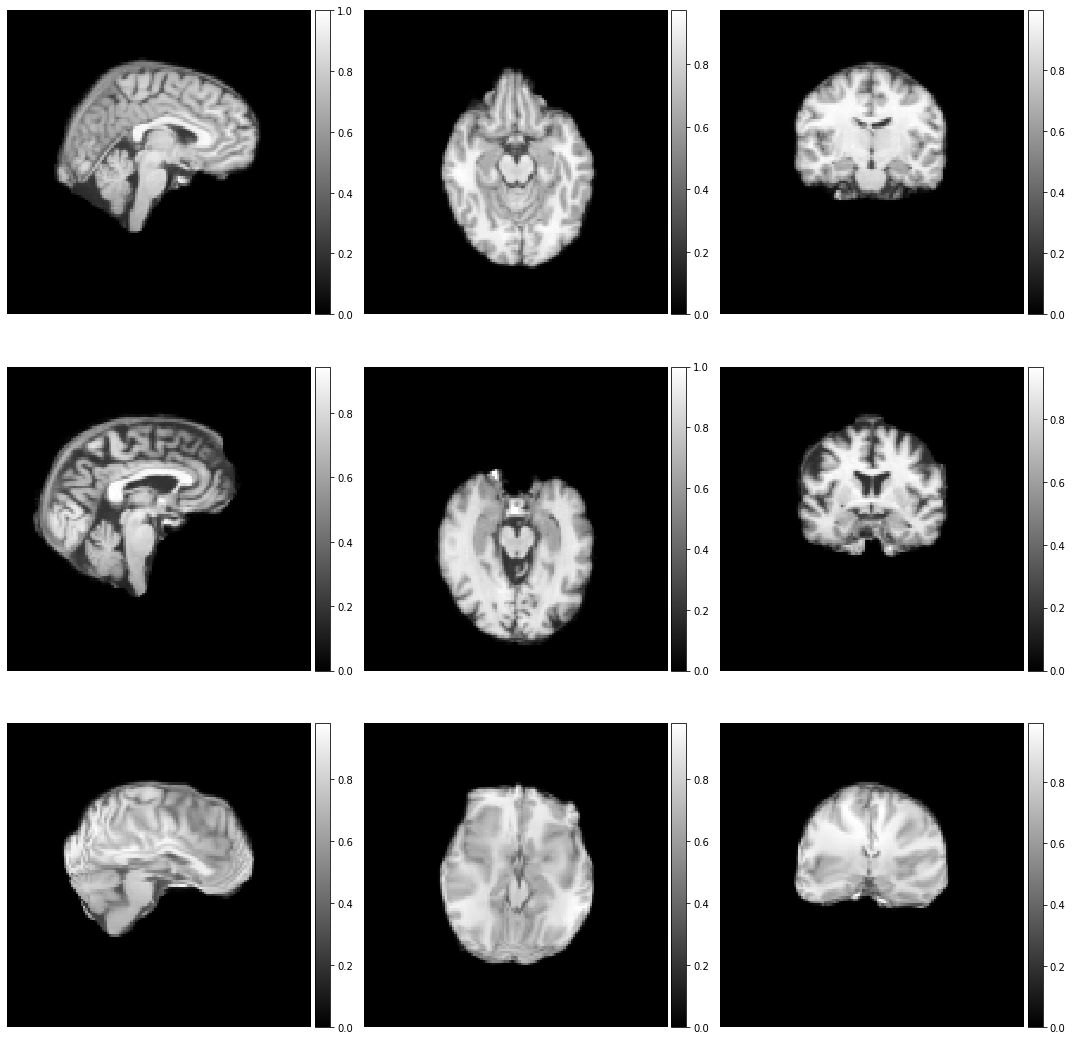

In [ ]:
mid_slices_fixed = [np.take(mynb_np1, 65, axis=d) for d in range(3)]
mid_slices_fixed[1] = np.rot90(mid_slices_fixed[1], 1)
mid_slices_fixed[2] = np.rot90(mid_slices_fixed[2], -1)

mid_slices_moving = [np.take(mynb_np2, 65, axis=d) for d in range(3)]
mid_slices_moving[1] = np.rot90(mid_slices_moving[1], 1)
mid_slices_moving[2] = np.rot90(mid_slices_moving[2], -1)

mid_slices_pred = [np.take(warped_img_np, 65, axis=d) for d in range(3)]
mid_slices_pred[1] = np.rot90(mid_slices_pred[1], 1)
mid_slices_pred[2] = np.rot90(mid_slices_pred[2], -1)
ne.plot.slices(mid_slices_fixed + mid_slices_moving + mid_slices_pred, cmaps=['gray'], do_colorbars=True, grid=[3,3]);

# SCG Concat Training

In [ ]:
feature_extractor_training = Feature_Extractor3(2,3,8).to("cuda")

scg_training = SCG_block(in_ch=32, hidden_ch=9, node_size=(16, 16, 16)).to("cuda")

#upsampler1_training = Upsampler_net2(32).to("cuda")

#upsampler2_training = Upsampler_net2(8).to("cuda")

# upsampler1_training = Upsampler_net3(8, 4, 9, 9).to("cuda")

# upsampler2_training = Upsampler_net3(8, 3, 9, 3).to("cuda")

# upsampler3_training = Upsampler_net3(8, 2, 9, 9).to("cuda")

# upsampler4_training = Upsampler_net3(8, 1, 9, 3).to("cuda")

upsampler1_training = Upsampler_net5(8, 4, 9, 32).to("cuda")

upsampler2_training = Upsampler_net5(8, 3, 32, 16).to("cuda")

upsampler3_training = Upsampler_net5(8, 2, 16, 8).to("cuda")

upsampler4_training = Upsampler_net5(8, 1, 8, 3).to("cuda")

conv_decoder1_training = Upsampler_net4(32, 32).to("cuda")

conv_decoder2_training = Upsampler_net4(16, 16).to("cuda")

conv_decoder3_training = Upsampler_net4(8, 8).to("cuda")

conv_decoder4_training = Upsampler_net4(8, 3).to("cuda")

graph_layers1_training = GCN_Layer(32, 16, bnorm=True, activation=nn.LeakyReLU(0.2), dropout=0.1).to("cuda")

graph_layers2_training = GCN_Layer(16, 9, bnorm=True, activation=nn.LeakyReLU(0.2), dropout=0.1).to("cuda")

stn_deformable = SpatialTransformer(size=(128, 128, 128), is_affine=False).to("cuda")

weight_xavier_init(graph_layers1_training, graph_layers2_training, scg_training)

for param in stn_deformable.parameters():
  param.requires_grad = False
  param.volatile=True

In [ ]:
similarity_loss = NormalizedCrossCorrelation().to("cuda")
smoothness_loss = Smoothnessloss().to("cuda")
lr=1e-4

In [ ]:
optimizer = torch.optim.Adam( list( feature_extractor_training.parameters()) + list( scg_training.parameters() ) + 
                             list(upsampler1_training.parameters()) + list(upsampler2_training.parameters()) + 
                             list(upsampler3_training.parameters()) + list(upsampler4_training.parameters()) + 
                             list( graph_layers1_training.parameters()) + list( graph_layers2_training.parameters()) +
                             list(conv_decoder1_training.parameters()) + list(conv_decoder2_training.parameters()) + 
                             list(conv_decoder3_training.parameters()) + list(conv_decoder4_training.parameters()), lr=lr ) 
model_dir = '/content/drive/MyDrive/Idl/scgnet_Changed/'

if not os.path.isdir(model_dir):
  os.mkdir(model_dir)

FileNotFoundError: ignored

In [ ]:
mylst = [-0.3, 0.3, -0.2, 0.2]
sum(abs(x) for x in mylst)

In [ ]:
def fullmodel_one_epoch_run(epoch=1):
  example_number = 0
  cc_loss_lst = []
  smoothness_loss_lst = []
  scg_loss_lst = []
  total_loss_lst = []
  for X,Y in training_generator:

    X = X.float().to("cuda")
    Y = Y.float().to("cuda")

    x_size = X.size()

    enc_1, enc_2, enc_3, enc_4 = feature_extractor_training(X, Y)
    #print(feature_extractor_op.shape)
    #print()

    A, gx, scg_loss, z_hat = scg_training(enc_4)
    
    B, C, H, W, D = enc_4.size()
    #print(A.shape, gx.shape, loss.shape, z_hat.shape, gx.reshape(B, -1, C).shape)
    #print(loss)
    #print()

    gop_layers1, A_layers1 = graph_layers1_training((gx.reshape(B, -1, C), A))
    #print(gop_layers1.shape, A_layers1.shape)
    #print()
    
    gop_layers2, A_layers2 = graph_layers2_training((gop_layers1, A_layers1))
    #print(gop_layers2.shape, A_layers2.shape)

    #gop_layers3, A_layers3 = graph_layers3_training((gop_layers2, A_layers2))

    gop_layers2 = torch.bmm(A_layers2,gop_layers2)

    gop_layers2 = gop_layers2 + z_hat

    gx = gop_layers2.reshape(B, 9, 16, 16, 16)

    gx = F.interpolate(gx, (H, W, D), mode='trilinear', align_corners=False)
    #print(gx.shape)

    # Adding information from feature extractor directly to latent space info, this could provide a path for gradients to move faster
    gx = upsampler1_training(gx, enc_4)
    gx = conv_decoder1_training(gx)
    #print(gx.shape)

    #gx = F.interpolate(gx, (64, 64, 64), mode='trilinear', align_corners=False)

    gx = upsampler2_training(gx, enc_3)
    gx = conv_decoder2_training(gx)

    dvf = upsampler3_training(gx, enc_2)
    dvf = conv_decoder3_training(dvf)
    dvf = conv_decoder4_training(dvf)
    #print(gx.shape)

    #gx = F.interpolate(gx, x_size[2:], mode='trilinear', align_corners=False)

    #dvf = upsampler4_training(gx, enc_1)
    #print(dvf.shape)

    fully_warped_image =  stn_deformable(Y, dvf)

    cc_loss = similarity_loss(X, fully_warped_image)
    sm_loss = smoothness_loss(dvf)

    total_loss = -1.0 * cc_loss + 1000.0 * scg_loss + 0.0005 * sm_loss

    optimizer.zero_grad()          
    total_loss.backward() 
    optimizer.step()

    cc_loss_lst.append(cc_loss.detach().cpu().numpy().item())
    smoothness_loss_lst.append(sm_loss.detach().cpu().numpy().item())
    scg_loss_lst.append(scg_loss.detach().cpu().numpy().item())
    total_loss_lst.append(total_loss.detach().cpu().numpy().item())
    #print("============= =============== ===========")

    del X, Y, enc_1, enc_2, enc_3, enc_4, A, gx, z_hat, gop_layers1, A_layers1, gop_layers2, A_layers2, dvf, fully_warped_image
    torch.cuda.empty_cache() 
   
    example_number = example_number + 1
    


  if (epoch%2 == 0):
    modelname = model_dir + '/' + "scgnet_upsampling_concat_deconv_new1_" + str(epoch+0) + '.pth'
    torch.save({"feature_extractor_training": feature_extractor_training.state_dict(), "scg_training": scg_training.state_dict(), 
                "upsampler1_training": upsampler1_training.state_dict(), "upsampler2_training": upsampler2_training.state_dict(),
                "upsampler3_training": upsampler3_training.state_dict(), "upsampler4_training": upsampler4_training.state_dict(), 
                "graph_layers1_training": graph_layers1_training.state_dict(), "graph_layers2_training": graph_layers2_training.state_dict(),
                "conv_decoder1_training": conv_decoder1_training.state_dict(), "conv_decoder2_training": conv_decoder2_training.state_dict(),
                "conv_decoder3_training": conv_decoder3_training.state_dict(), "conv_decoder4_training": conv_decoder4_training.state_dict()}, modelname)
    print("epoch: {}".format(epoch+0))
    print("Losses: {}, {} {} and {}".format(cc_loss * -1.0, scg_loss * 1000.0, 0.0005 * sm_loss, total_loss))
    print("Average Losses: {}, {} {}, {}".format(sum(cc_loss_lst)/len(cc_loss_lst), sum(abs(x) for x in smoothness_loss_lst)/len(smoothness_loss_lst) , 
                                                 sum(abs(x) for x in scg_loss_lst)/len(scg_loss_lst), sum(total_loss_lst)/len(total_loss_lst) ) )
    print("Saving model checkpoints")
    print("======= =============== ===========")
    print()
  
  return cc_loss_lst, smoothness_loss_lst, scg_loss_lst

In [ ]:
epochs = 101
a = []
b = []
c = []
for e in range(epochs):
  m,n,o = fullmodel_one_epoch_run(epoch=e)
  a.append(m)
  b.append(n)
  c.append(o)

## SCG Concat Validation

In [ ]:
del  feature_extractor_inference, upsampler1_inference, upsampler2_inference, scg_inference, graph_layers1_inference, graph_layers2_inference, stn_deformable_inference
torch.cuda.empty_cache()

In [ ]:
feature_extractor_inference = Feature_Extractor3(2,3,8).to("cuda")

scg_inference = SCG_block(in_ch=32, hidden_ch=9, node_size=(16, 16, 16)).to("cuda")

graph_layers1_inference = GCN_Layer(32, 16, bnorm=True, activation=nn.LeakyReLU(0.2), dropout=0.0).to("cuda")

graph_layers2_inference = GCN_Layer(16, 9, bnorm=True, activation=nn.LeakyReLU(0.2), dropout=0.0).to("cuda")

graph_layers3_inference= GCN_Layer(8, 3, bnorm=False, activation=None).to("cuda")

# upsampler1_inference = Upsampler_net2(32).to("cuda")

# upsampler2_inference = Upsampler_net2(8).to("cuda")

# upsampler1_inference = Upsampler_net3(8, 4, 9, 9).to("cuda")

# upsampler2_inference = Upsampler_net3(8, 1, 9, 3).to("cuda")

# upsampler1_inference = Upsampler_net3(8, 4, 9, 9).to("cuda")

# upsampler2_inference = Upsampler_net3(8, 3, 9, 3).to("cuda")

# upsampler3_inference = Upsampler_net3(8, 2, 9, 9).to("cuda")

# upsampler4_inference = Upsampler_net3(8, 1, 9, 3).to("cuda")

# upsampler1_inference = Upsampler_net5(8, 4, 9, 32).to("cuda")

# upsampler2_inference = Upsampler_net5(8, 3, 32, 16).to("cuda")

# upsampler3_inference = Upsampler_net5(8, 2, 16, 3).to("cuda")

# upsampler4_inference = Upsampler_net5(8, 1, 8, 3).to("cuda")

upsampler1_inference = Upsampler_net5(8, 4, 9, 32).to("cuda")

upsampler2_inference = Upsampler_net5(8, 3, 32, 16).to("cuda")

upsampler3_inference = Upsampler_net5(8, 2, 16, 8).to("cuda")

upsampler4_inference = Upsampler_net5(8, 1, 8, 3).to("cuda")

conv_decoder1_inference = Upsampler_net4(32, 32).to("cuda")

conv_decoder2_inference = Upsampler_net4(16, 16).to("cuda")

conv_decoder3_inference = Upsampler_net4(8, 8).to("cuda")

conv_decoder4_inference = Upsampler_net4(8, 3).to("cuda")

stn_deformable_inference = SpatialTransformer(size=(128, 128, 128), is_affine=False).to("cuda")

for param in stn_deformable_inference.parameters():
  param.requires_grad = False
  param.volatile=True

In [ ]:
#checkpoint = torch.load('/content/drive/My Drive/Image_Registration_Project/scgnet_changed/scgnet_upsampling_concat_deconv_new1_30.pth')
checkpoint = torch.load("/content/drive/MyDrive/Idl/scgnet_Changed/scgnet_upsampling_concat_deconv_new1_100.pth")

feature_extractor_inference.load_state_dict(checkpoint['feature_extractor_training'])
scg_inference.load_state_dict(checkpoint['scg_training'])
graph_layers1_inference.load_state_dict(checkpoint['graph_layers1_training'])
graph_layers2_inference.load_state_dict(checkpoint['graph_layers2_training'])

upsampler1_inference.load_state_dict(checkpoint["upsampler1_training"])
upsampler2_inference.load_state_dict(checkpoint["upsampler2_training"])
upsampler3_inference.load_state_dict(checkpoint["upsampler3_training"])
upsampler4_inference.load_state_dict(checkpoint["upsampler4_training"])

conv_decoder1_inference.load_state_dict(checkpoint["conv_decoder1_training"])
conv_decoder2_inference.load_state_dict(checkpoint["conv_decoder2_training"])
conv_decoder3_inference.load_state_dict(checkpoint["conv_decoder3_training"])
conv_decoder4_inference.load_state_dict(checkpoint["conv_decoder4_training"])

feature_extractor_inference.eval()
upsampler1_inference.eval()
upsampler2_inference.eval()
upsampler3_inference.eval()
upsampler4_inference.eval()
conv_decoder1_inference.eval()
conv_decoder2_inference.eval()
conv_decoder3_inference.eval()
conv_decoder4_inference.eval()
scg_inference.eval()
graph_layers1_inference.eval()
graph_layers2_inference.eval()


FileNotFoundError: ignored

In [ ]:
def fullmodel_inference_loop(epoch=1):
  example_number = 0
  counter = 0
  for X,Y in validation_generator:

    X = X.float().to("cuda")
    Y = Y.float().to("cuda")

    x_size = X.size()

    enc_1, enc_2, enc_3, enc_4 = feature_extractor_inference(X, Y)

    A, gx, scg_loss, z_hat = scg_inference(enc_4)
    
    B, C, H, W, D = enc_4.size()

    gop_layers1, A_layers1 = graph_layers1_inference((gx.reshape(B, -1, C), A))

    gop_layers2, A_layers2 = graph_layers2_inference((gop_layers1, A_layers1))

    #gop_layers3, A_layers3 = graph_layers3_inference((gop_layers2, A_layers2))
    
    gop_layers2 = torch.bmm(A_layers2,gop_layers2)

    gop_layers2 = gop_layers2 + z_hat

    gx = gop_layers2.reshape(B, 9, 16, 16, 16)

    gx = F.interpolate(gx, (H, W, D), mode='trilinear', align_corners=False)

    # Adding information from feature extractor directly to latent space info, this could provide a path for gradients to move faster
    gx = upsampler1_inference(gx, enc_4)
    gx = conv_decoder1_inference(gx)
    #gx = F.interpolate(gx, (64, 64, 64), mode='trilinear', align_corners=False)
    gx = upsampler2_inference(gx, enc_3)
    gx = conv_decoder2_inference(gx)

    dvf = upsampler3_inference(gx, enc_2)
    dvf = conv_decoder3_inference(dvf)
    dvf = conv_decoder4_inference(dvf)

    #gx = F.interpolate(gx, x_size[2:], mode='trilinear', align_corners=False)

    #dvf = upsampler4_inference(gx, enc_1)

    #dvf = F.interpolate(gx, x_size[2:], mode='trilinear', align_corners=False)

    fully_warped_image =  stn_deformable_inference(Y, dvf)

    full_warped_np = fully_warped_image.detach().to("cpu").numpy()
    full_warped_nb = nb.Nifti1Image(full_warped_np[0,0,:,:,:], np.eye(4)) 
    nb.save(full_warped_nb, '/content/drive/MyDrive/Idl/deconv_bmm_output/' +  'scgnet_16_full_warped_nb_' + str(counter) + '.nii.gz')

    counter = counter + 1
    print(counter)
    del enc_1, enc_2, enc_3, enc_4, A, gx, z_hat, gop_layers1, A_layers1, gop_layers2, A_layers2, fully_warped_image, dvf
   
    if(counter > 3):
      break;
    

In [ ]:
fullmodel_inference_loop()

In [ ]:
fully_warped_img = nb.load("/content/drive/MyDrive/Idl/deconv_bmm_output/scgnet_16_full_warped_nb_0.nii.gz")
warped_img_np = fully_warped_img.dataobj

mynb_np1 = imgnorm(load_4D_200(file_names_t1[0]))
mynb_np1 = mynb_np1[0,:,:,:]
mynb_np2 = imgnorm(load_4D_200(file_names_t1[4]))
mynb_np2 = imgnorm(mynb_np2[0,:,:,:])
vol_shape = (128, 128, 128)

In [ ]:
mid_slices_fixed = [np.take(mynb_np1, 45, axis=d) for d in range(3)]
mid_slices_fixed[1] = np.rot90(mid_slices_fixed[1], 1)
mid_slices_fixed[2] = np.rot90(mid_slices_fixed[2], -1)

mid_slices_moving = [np.take(mynb_np2, 45, axis=d) for d in range(3)]
mid_slices_moving[1] = np.rot90(mid_slices_moving[1], 1)
mid_slices_moving[2] = np.rot90(mid_slices_moving[2], -1)

mid_slices_pred = [np.take(warped_img_np, 45, axis=d) for d in range(3)]
mid_slices_pred[1] = np.rot90(mid_slices_pred[1], 1)
mid_slices_pred[2] = np.rot90(mid_slices_pred[2], -1)
ne.plot.slices(mid_slices_fixed + mid_slices_moving + mid_slices_pred, cmaps=['gray'], do_colorbars=True, grid=[3,3]);